In [1]:
import pandas as pd

subsidi = pd.read_excel('Dataset Pertamini.xlsx')
subsidi = subsidi.set_index(keys='Provinsi')
subsidi

,TRANS,ROAD,AREA,DENSITY,PROVERTY,UMP,PREMIUM,BIOSOLAR
Provinsi,,,,,,,,
Aceh,2426809,23660,56834.75,95,14.75,3166460,181973,36798
Sumatera Utara,7339034,40765,72460.74,209,8.33,2522610,431005,1808209
Sumatera Barat,2656691,20999,42119.54,134,6.04,2512539,330848,414606
Riau,4230607,24206,89935.90,74,6.84,2938564,698926,77686
Jambi,2572804,13202,49026.58,74,7.70,2698774,211627,323671
Sumatera Selatan,4019095,19587,86771.68,100,11.95,3144446,239477,550981
Bengkulu,1127170,9228,20128.34,102,14.34,2238094,60149,129058
Lampung,3921375,20765,33570.26,273,11.44,2440486,347218,607444
Kepulauan Bangka Belitung,1160091,5891,16690.13,90,4.61,3264881,173105,186764


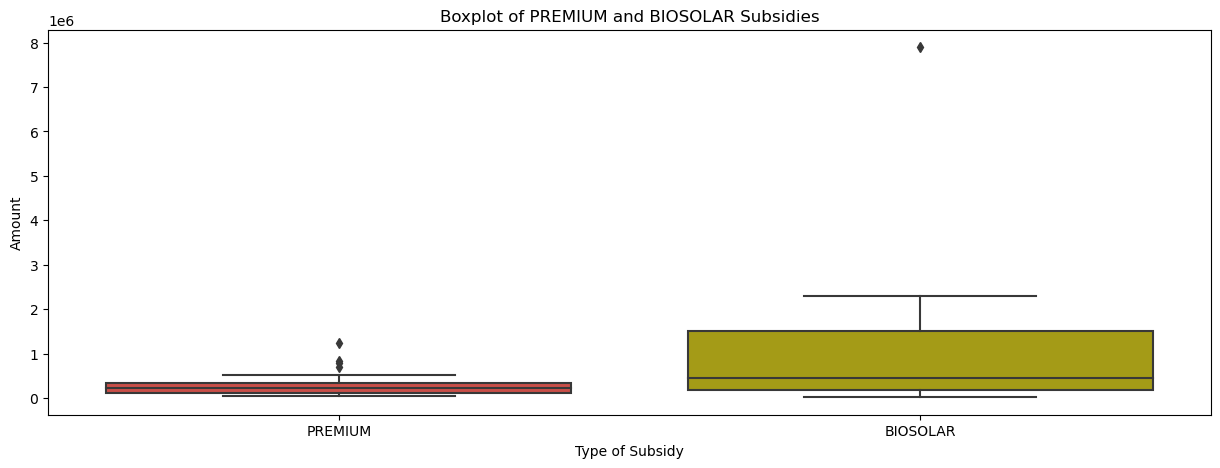

,PREMIUM,BIOSOLAR
count,3.400000e+01,3.400000e+01
mean,2.941176e+05,9.808594e+05
std,2.584587e+05,1.423907e+06
min,4.313600e+04,1.914100e+04
25%,1.244750e+05,1.841848e+05
50%,2.330445e+05,4.570345e+05
75%,3.431255e+05,1.507342e+06
max,1.228895e+06,7.896164e+06


In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_selected = subsidi[['PREMIUM', 'BIOSOLAR']]

# Membuat boxplot dengan seaborn
plt.figure(figsize=(15, 5))
sns.boxplot(data=df_selected, palette=['#de3a32', '#bbaf00'])
plt.title('Boxplot of PREMIUM and BIOSOLAR Subsidies')
plt.xlabel('Type of Subsidy')
plt.ylabel('Amount')
plt.show()

# Menampilkan summary statistics
summary_stats = df_selected.describe()
summary_stats


In [1]:
!pip install racplusplus

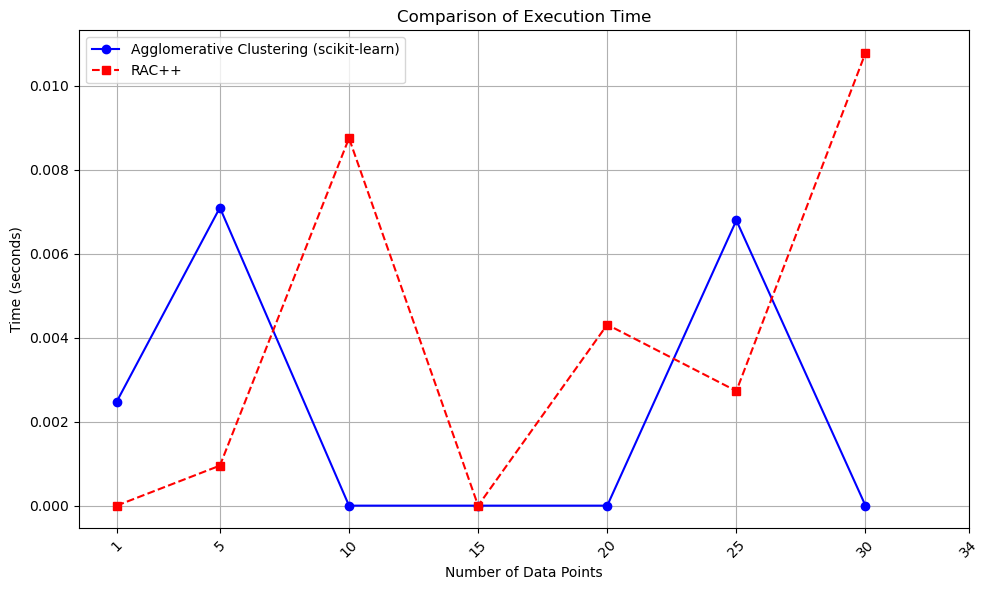

In [38]:
import pandas as pd
import numpy as np
import racplusplus
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
import time
import matplotlib.pyplot as plt

# Muat data Anda
df = pd.read_excel('Dataset Pertamini.xlsx')  # Ganti dengan path file yang benar
df = df.set_index('Provinsi')
df_selected = df[['PREMIUM', 'BIOSOLAR']]  # Pilih kolom yang relevan

# Standardisasi data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df_selected)

# Tentukan jumlah titik data
points = [1, 5, 10, 15, 20, 25, 30, 34]  # Karena dataset Anda hanya memiliki 34 baris
distance_threshold = 0.1
sklearn_times = []
rac_times = []

# Loop untuk setiap jumlah titik data
for point_no in points:
    X_subset = data_scaled[:point_no, :]  # Ambil subset data berdasarkan jumlah titik data

    # Hitung KNN dan buat matriks simetris
    n_neighbors = min(10, point_no - 1)  # Pastikan n_neighbors tidak melebihi jumlah sampel
    if n_neighbors < 1:
        continue  # Jika n_neighbors kurang dari 1, lewati iterasi ini

    knn = kneighbors_graph(X_subset, n_neighbors, include_self=False)  
    symmetric = knn + knn.T  # Pastikan matriks KNN menjadi simetris

    # Agglomerative Clustering dengan scikit-learn
    start = time.time()
    model = AgglomerativeClustering(
        linkage="average",
        n_clusters=None,
        distance_threshold=distance_threshold,
        metric='euclidean'  # Gunakan 'affinity' untuk metrik
    )
    model.fit(X_subset)
    sklearn_times.append(time.time() - start)

    # RAC++ menggunakan racplusplus
    start = time.time()
    rac_labels = racplusplus.rac(
        X_subset, distance_threshold, symmetric.toarray(),  # Pastikan symmetric adalah numpy array
        1000, 8, "euclidean"  # Perhatikan urutan parameter
    )
    rac_times.append(time.time() - start)

# Plot perbandingan waktu eksekusi
plt.figure(figsize=(10, 6))
plt.plot(points[:len(sklearn_times)], sklearn_times, marker='o', linestyle='-', color='b', label='Agglomerative Clustering (scikit-learn)')
plt.plot(points[:len(rac_times)], rac_times, marker='s', linestyle='--', color='r', label='RAC++')
plt.title('Comparison of Execution Time')
plt.xlabel('Number of Data Points')
plt.ylabel('Time (seconds)')
plt.xticks(points, rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


C:\Users\ASUS\AppData\Local\Temp\ipykernel_21520\2763595428.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['Cluster'] = rac_labels


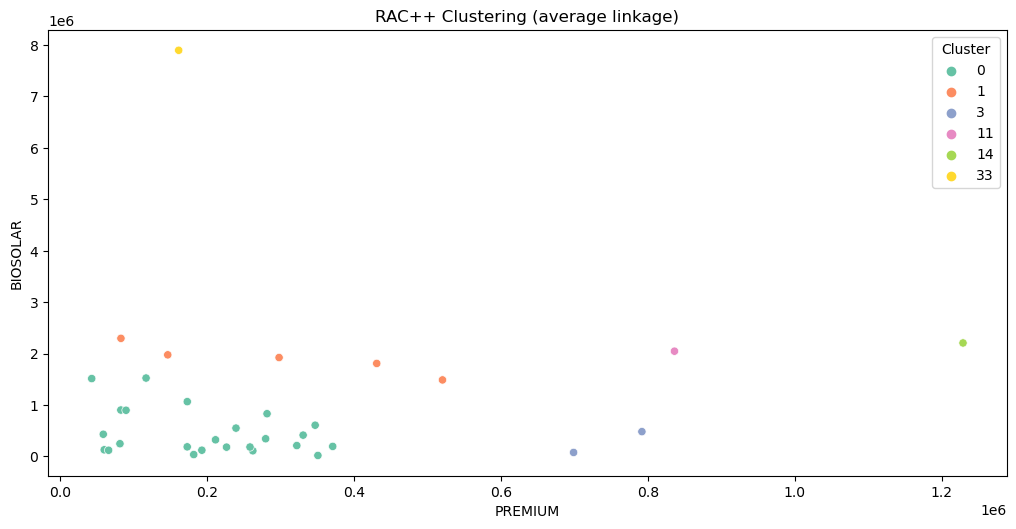

In [41]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import kneighbors_graph
import racplusplus
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage

# Muat data Anda
df = pd.read_excel('Dataset Pertamini.xlsx')  # Ganti dengan path file yang benar
df = df.set_index('Provinsi')
df_selected = df[['PREMIUM', 'BIOSOLAR']]  # Pilih kolom yang relevan

# Standardisasi data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df_selected)

# Definisikan metode linkage yang akan diuji
linkage_methods = ['average']

plt.figure(figsize=(20, 10))

for i, method in enumerate(linkage_methods):
    # Hitung KNN dan buat matriks simetris
    knn = kneighbors_graph(data_scaled, 10, mode='connectivity', include_self=False)
    symmetric_knn = knn.maximum(knn.T)  # Pastikan matriks KNN menjadi simetris
    
    # RAC++ clustering
    rac_labels = racplusplus.rac(
        data_scaled, 1, symmetric_knn.toarray(), 1000, 4, "euclidean"
    )
    
    # Tambahkan label klaster ke DataFrame asli
    df_selected['Cluster'] = rac_labels
    
    # Visualisasi hasil klastering
    plt.subplot(2, 2, i + 1)
    sns.scatterplot(data=df_selected, x='PREMIUM', y='BIOSOLAR', hue='Cluster', palette='Set2')
    plt.title(f'RAC++ Clustering ({method} linkage)')
    
plt.tight_layout()
plt.show()


C:\Users\ASUS\AppData\Local\Temp\ipykernel_27980\117173490.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['Cluster'] = rac_labels


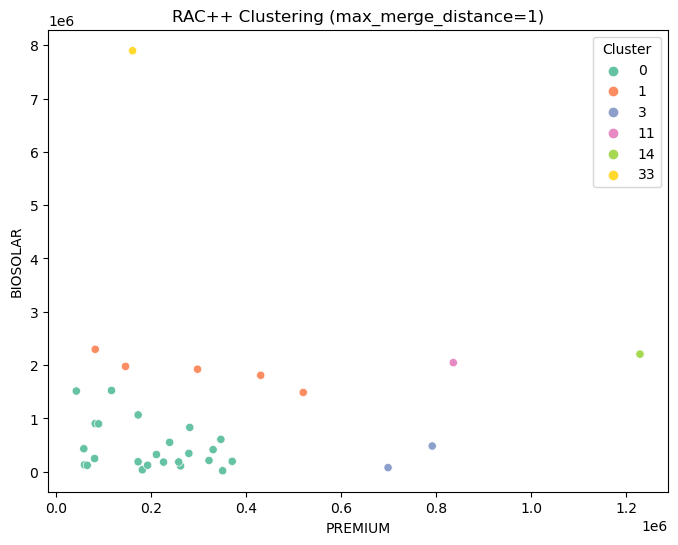

C:\Users\ASUS\AppData\Local\Temp\ipykernel_27980\117173490.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['Cluster'] = rac_labels


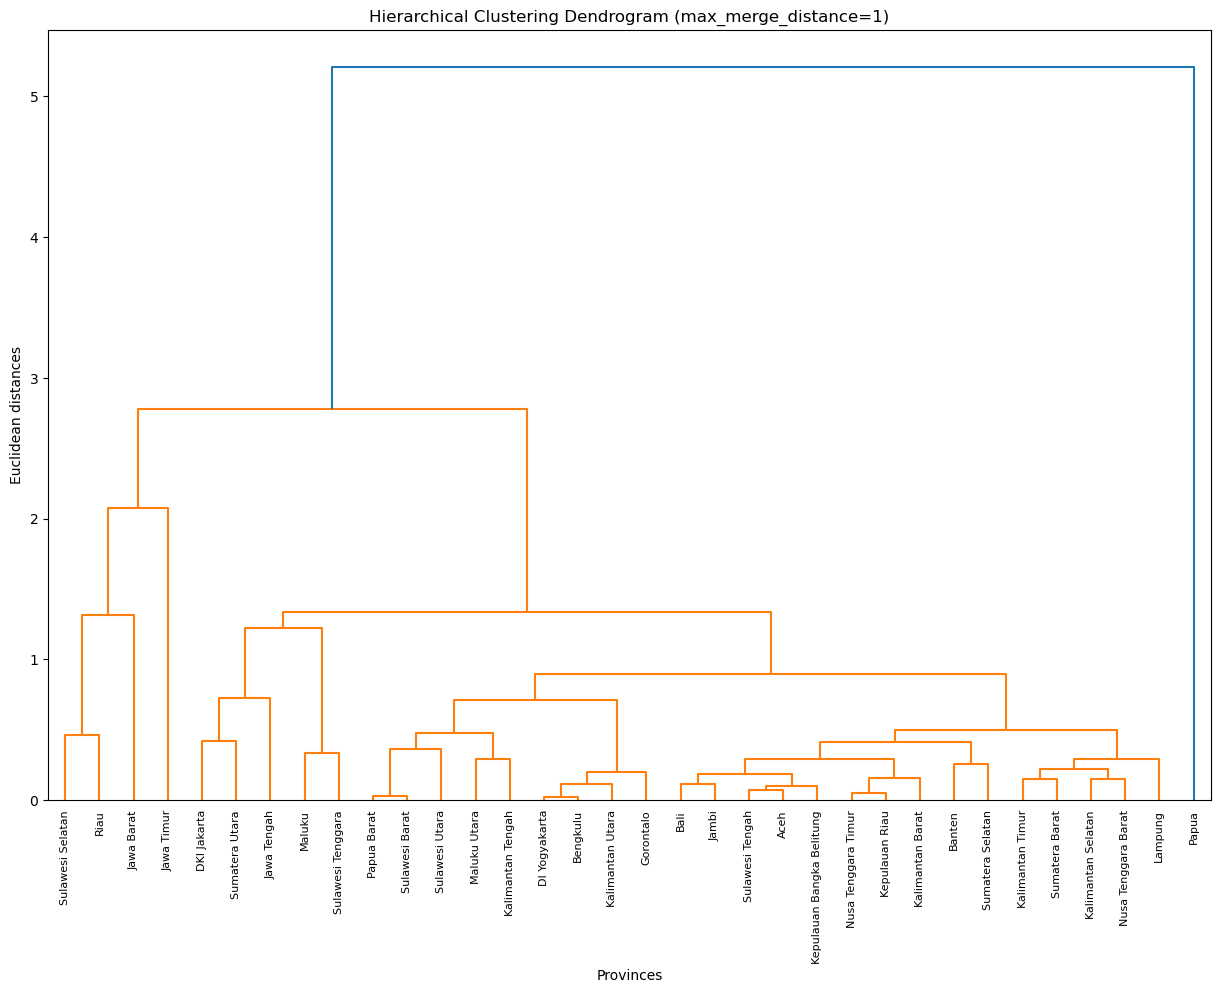

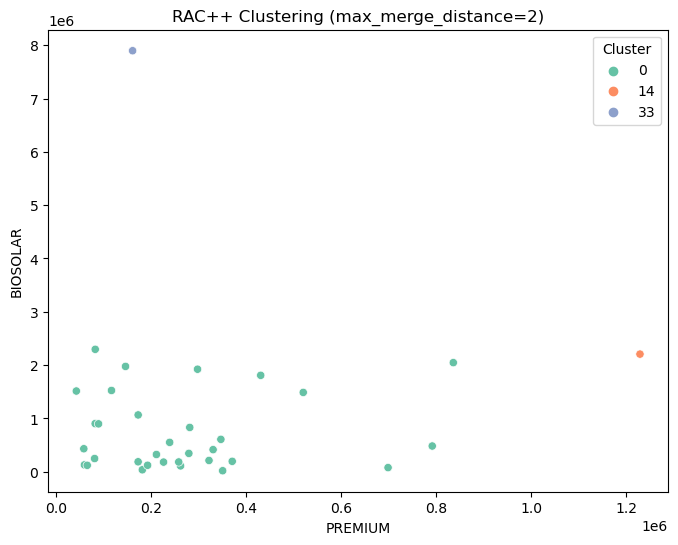

C:\Users\ASUS\AppData\Local\Temp\ipykernel_27980\117173490.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['Cluster'] = rac_labels


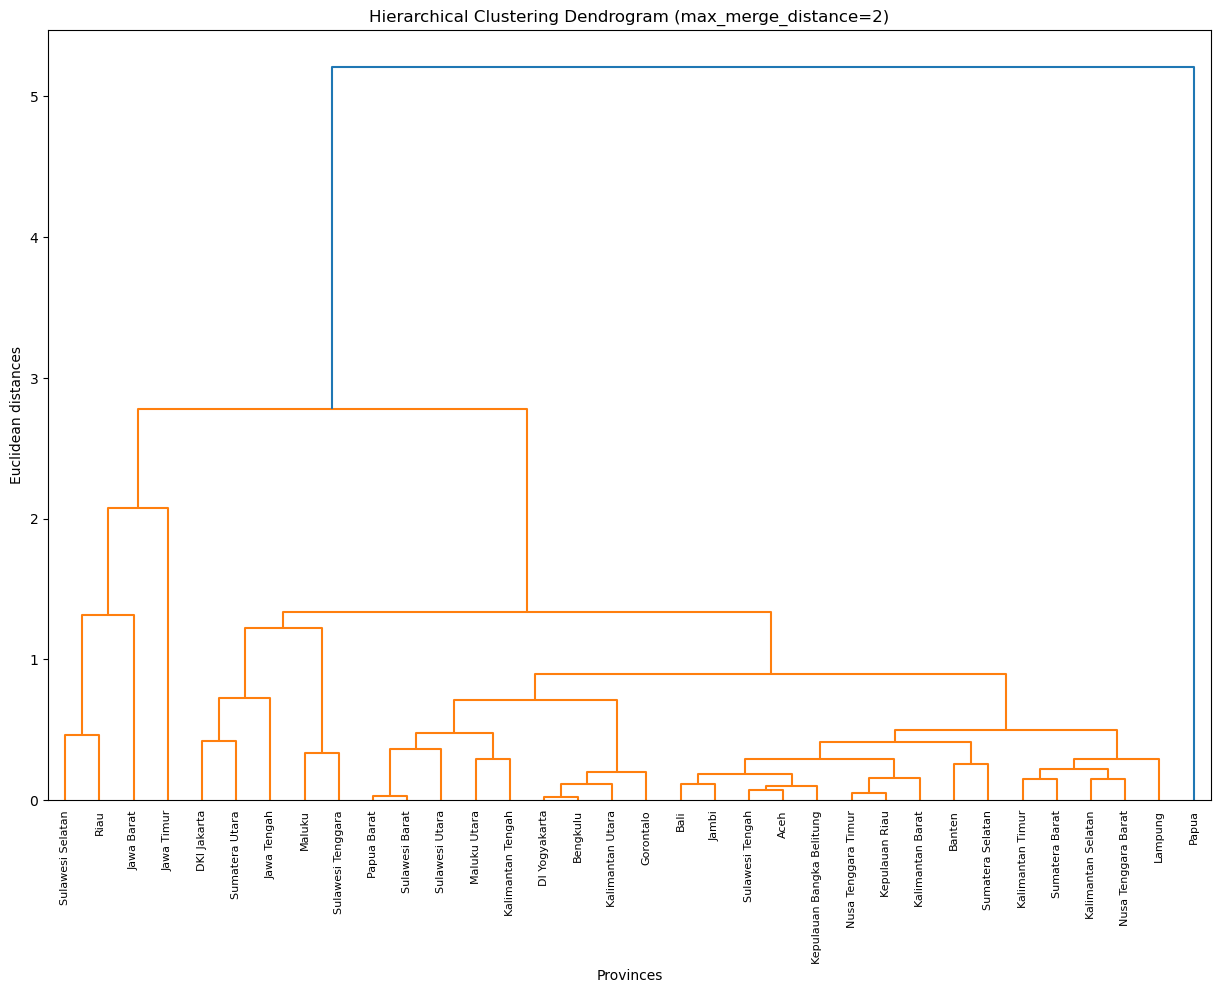

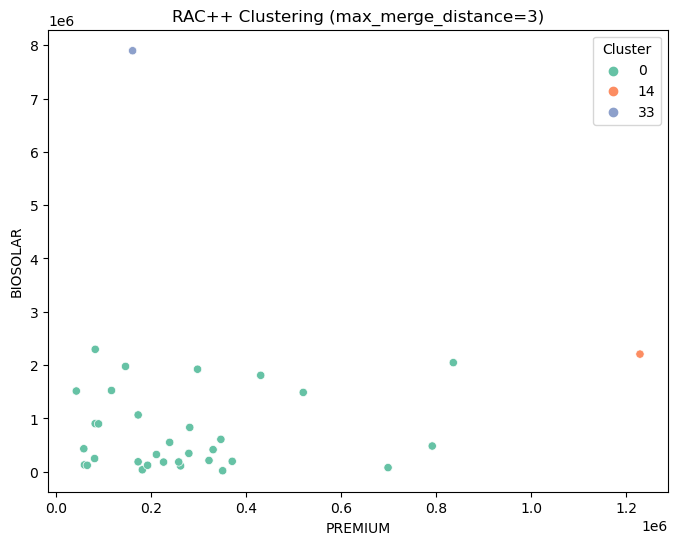

C:\Users\ASUS\AppData\Local\Temp\ipykernel_27980\117173490.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['Cluster'] = rac_labels


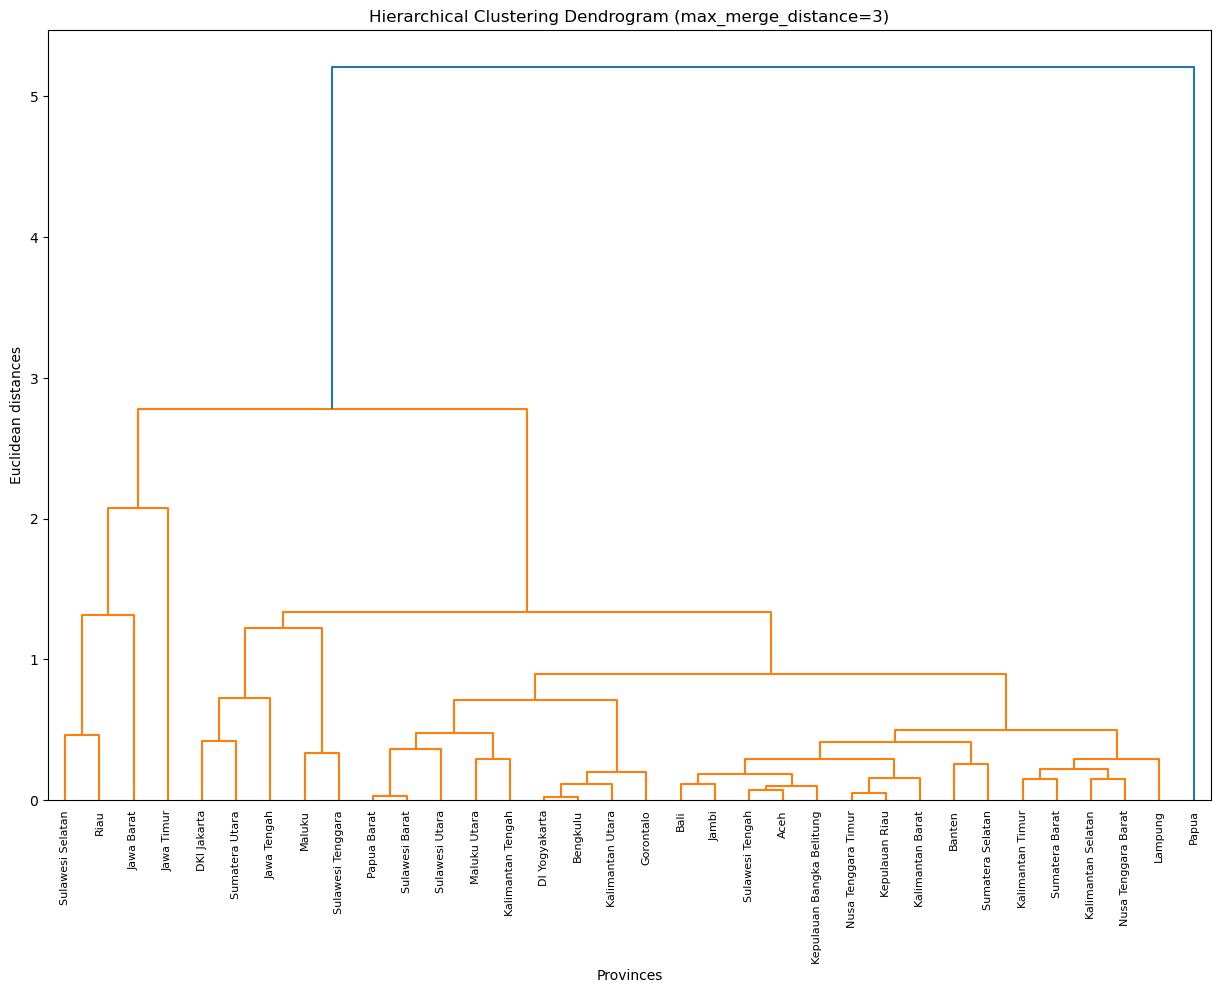

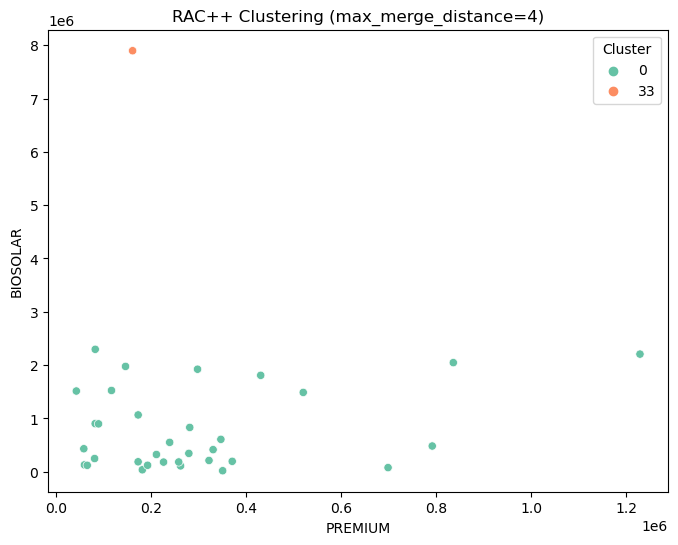

max_merge_distance=1: Davies-Bouldin Index=0.4852441162214339
max_merge_distance=2: Davies-Bouldin Index=0.18289473223576466
max_merge_distance=3: Davies-Bouldin Index=0.18289473223576466
max_merge_distance=4: Davies-Bouldin Index=0.17552709374866765


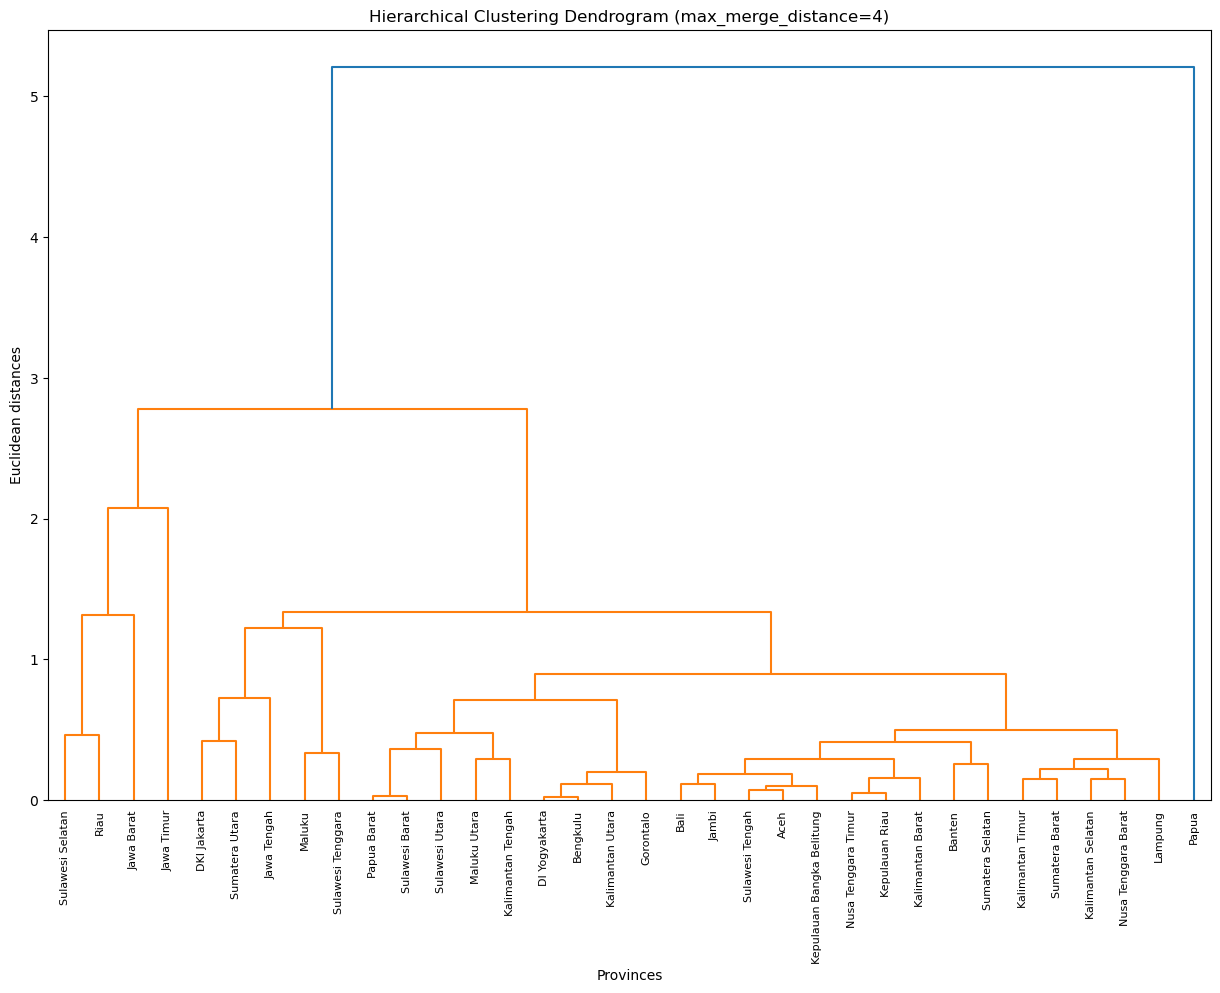

In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import kneighbors_graph
from sklearn.decomposition import PCA
import racplusplus
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import davies_bouldin_score

# Muat data Anda
df = pd.read_excel('Dataset Pertamini.xlsx')
df = df.set_index('Provinsi')
df_selected = df[['PREMIUM', 'BIOSOLAR']]

# Standardisasi data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df_selected)

# Definisikan metode linkage yang akan diuji
linkage_methods = ['average']

# Hitung KNN dan buat matriks simetris
knn = kneighbors_graph(data_scaled, 10, mode='connectivity', include_self=False)
symmetric_knn = knn.maximum(knn.T)

# Coba beberapa nilai max_merge_distance dan evaluasi
max_merge_distances = [1, 2, 3,4]
results = {}

for max_merge_distance in max_merge_distances:
    # RAC++ clustering
    rac_labels = racplusplus.rac(data_scaled, max_merge_distance, symmetric_knn.toarray(), 1000, 4, "euclidean")
    df_selected['Cluster'] = rac_labels
    
    # Evaluasi clustering dengan Davies-Bouldin Index
    davies_bouldin = davies_bouldin_score(data_scaled, rac_labels)
    results[max_merge_distance] = davies_bouldin
    
    # Visualisasi hasil klastering
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df_selected, x='PREMIUM', y='BIOSOLAR', hue='Cluster', palette='Set2')
    plt.title(f'RAC++ Clustering (max_merge_distance={max_merge_distance})')
    plt.show()

    # Visualisasi dendrogram
    linked = linkage(data_scaled, method='average')
    plt.figure(figsize=(15, 10))
    dendrogram(linked, labels=df_selected.index.tolist(), orientation='top', distance_sort='descending', show_leaf_counts=True)
    plt.title(f'Hierarchical Clustering Dendrogram (max_merge_distance={max_merge_distance})')
    plt.xticks(rotation=90)
    plt.xlabel('Provinces')
    plt.ylabel('Euclidean distances')

# Print hasil evaluasi
for max_merge_distance, davies_bouldin in results.items():
    print(f"max_merge_distance={max_merge_distance}: Davies-Bouldin Index={davies_bouldin}")

C:\Users\ASUS\AppData\Local\Temp\ipykernel_21520\212359916.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['Cluster'] = rac_labels


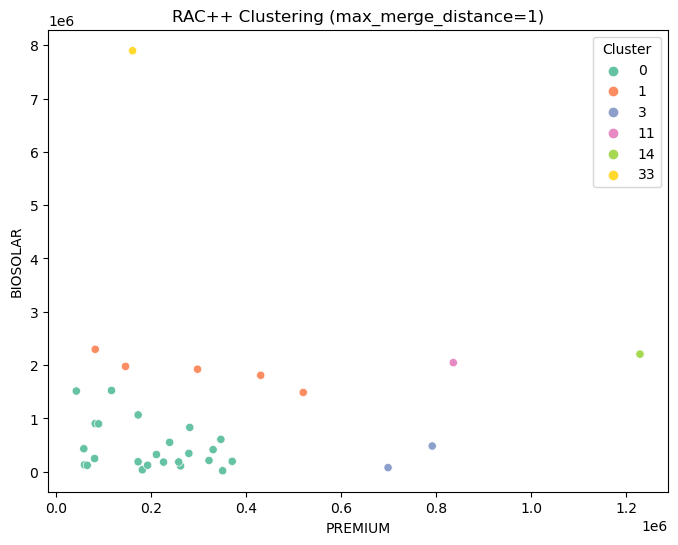

C:\Users\ASUS\AppData\Local\Temp\ipykernel_21520\212359916.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['Cluster'] = rac_labels


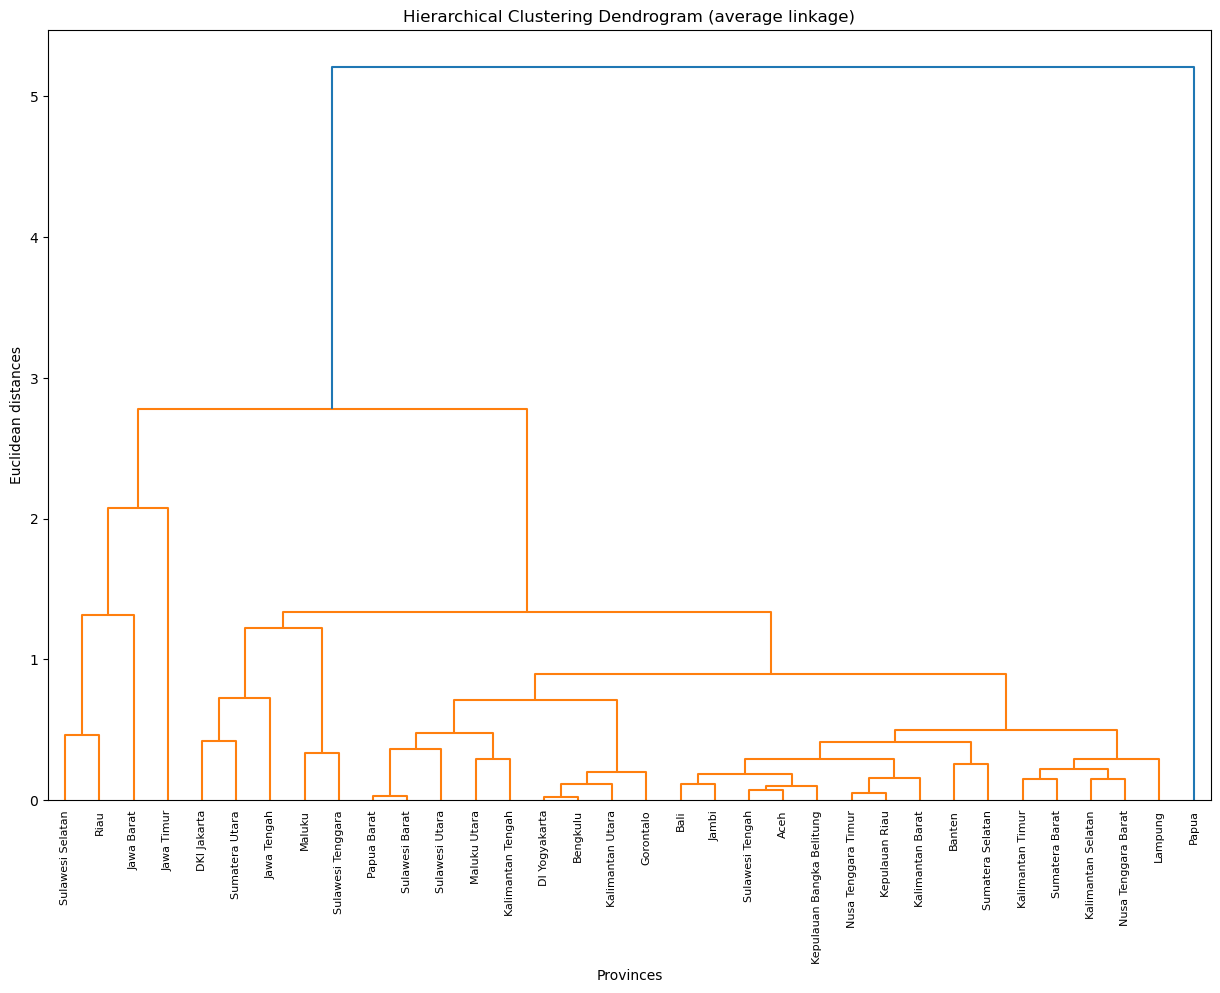

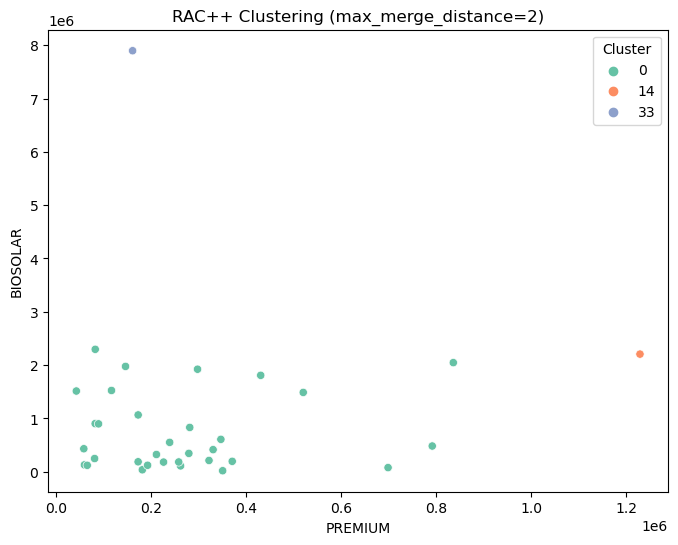

C:\Users\ASUS\AppData\Local\Temp\ipykernel_21520\212359916.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['Cluster'] = rac_labels


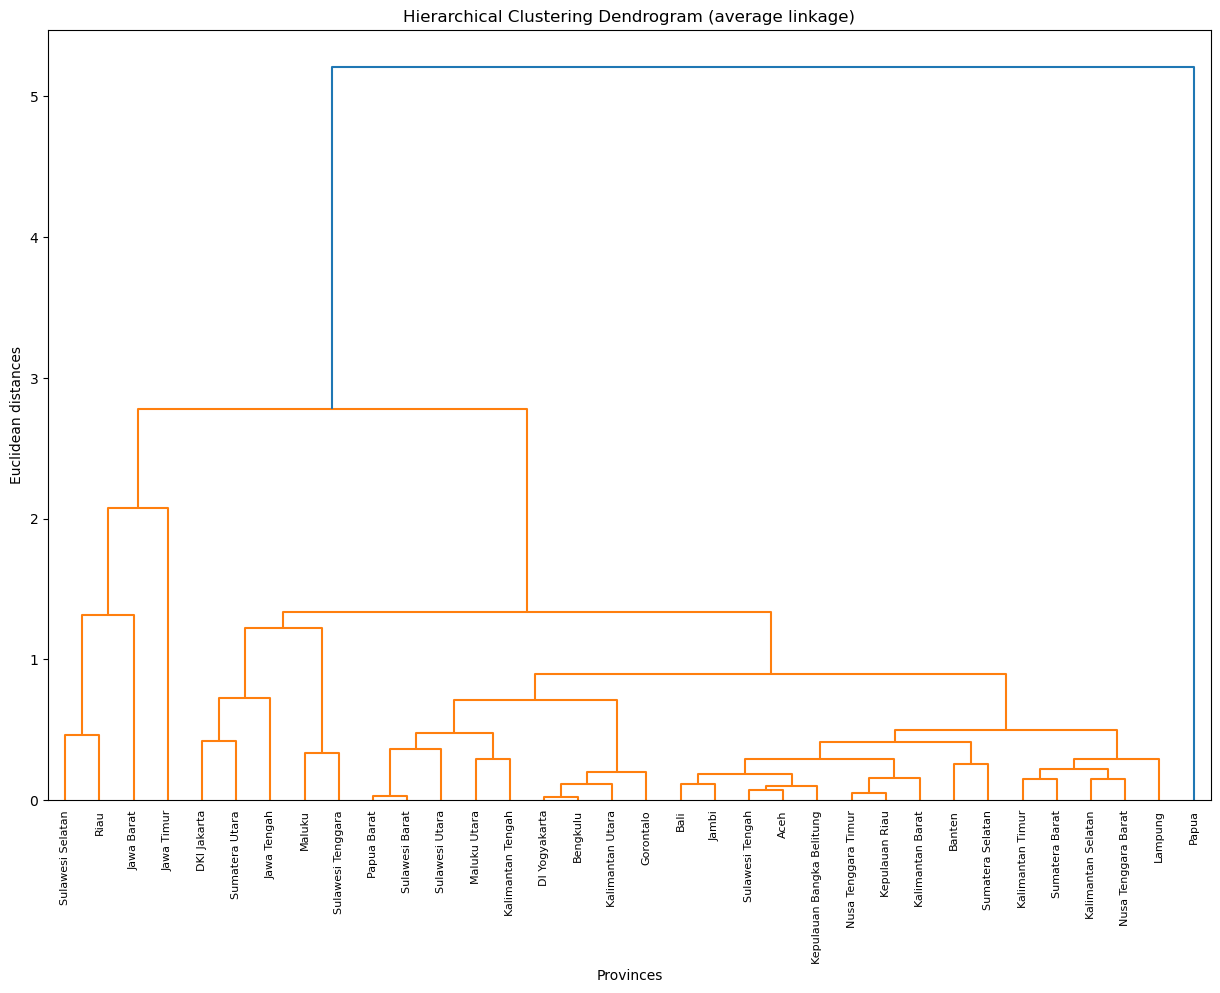

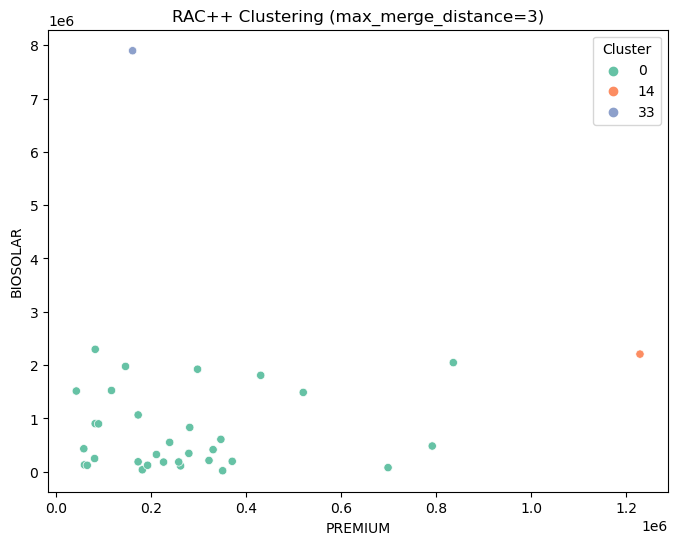

C:\Users\ASUS\AppData\Local\Temp\ipykernel_21520\212359916.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['Cluster'] = rac_labels


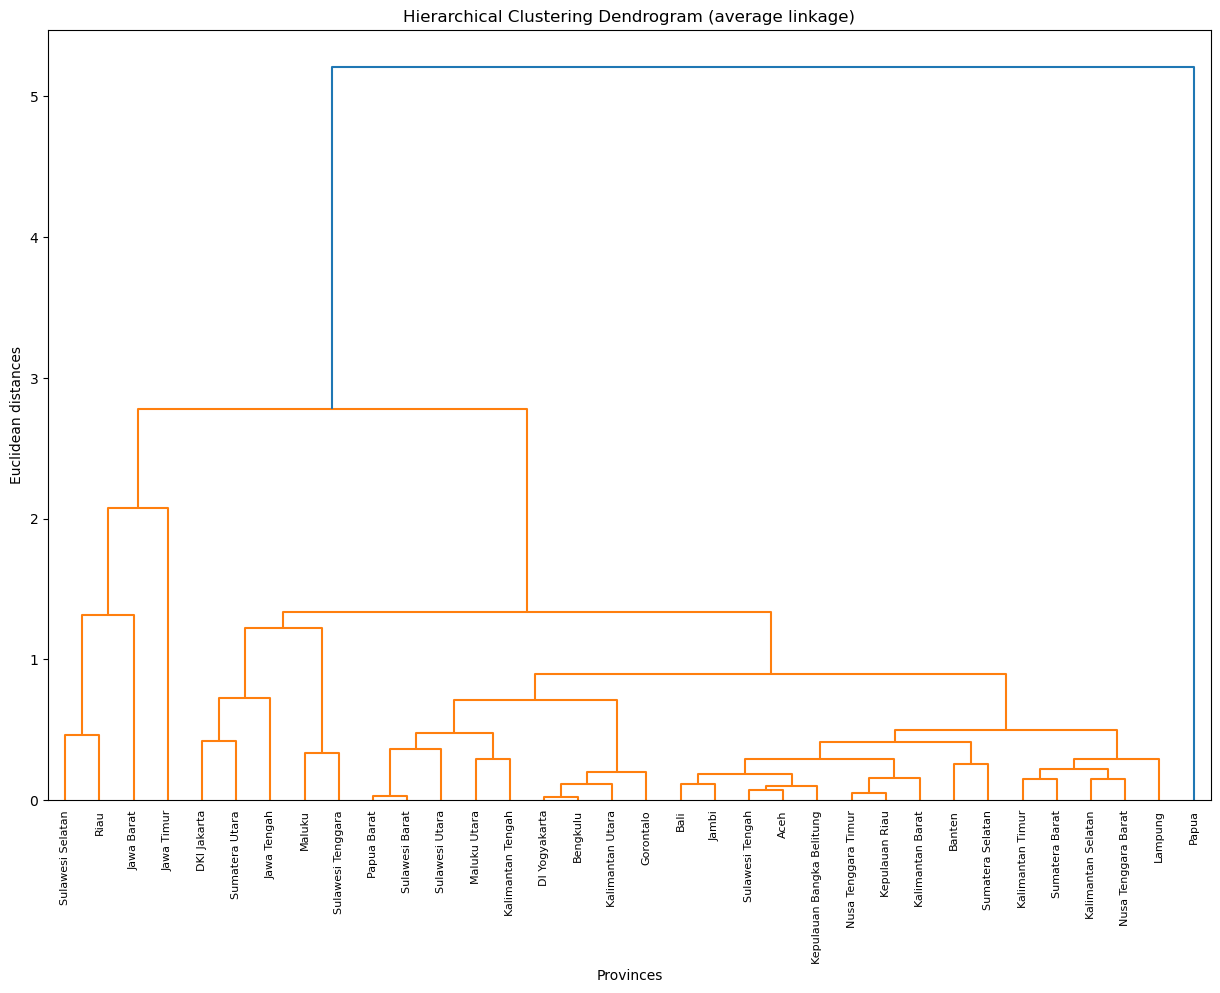

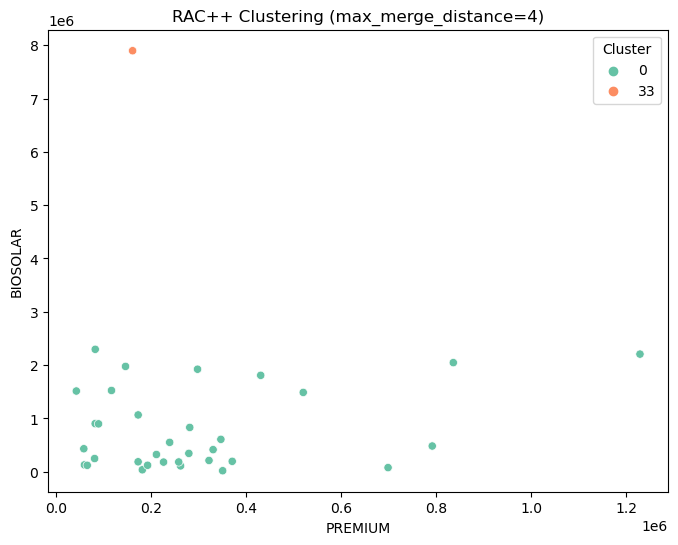

max_merge_distance=1: Davies-Bouldin Index=0.4852441162214339
max_merge_distance=2: Davies-Bouldin Index=0.18289473223576466
max_merge_distance=3: Davies-Bouldin Index=0.18289473223576466
max_merge_distance=4: Davies-Bouldin Index=0.17552709374866765


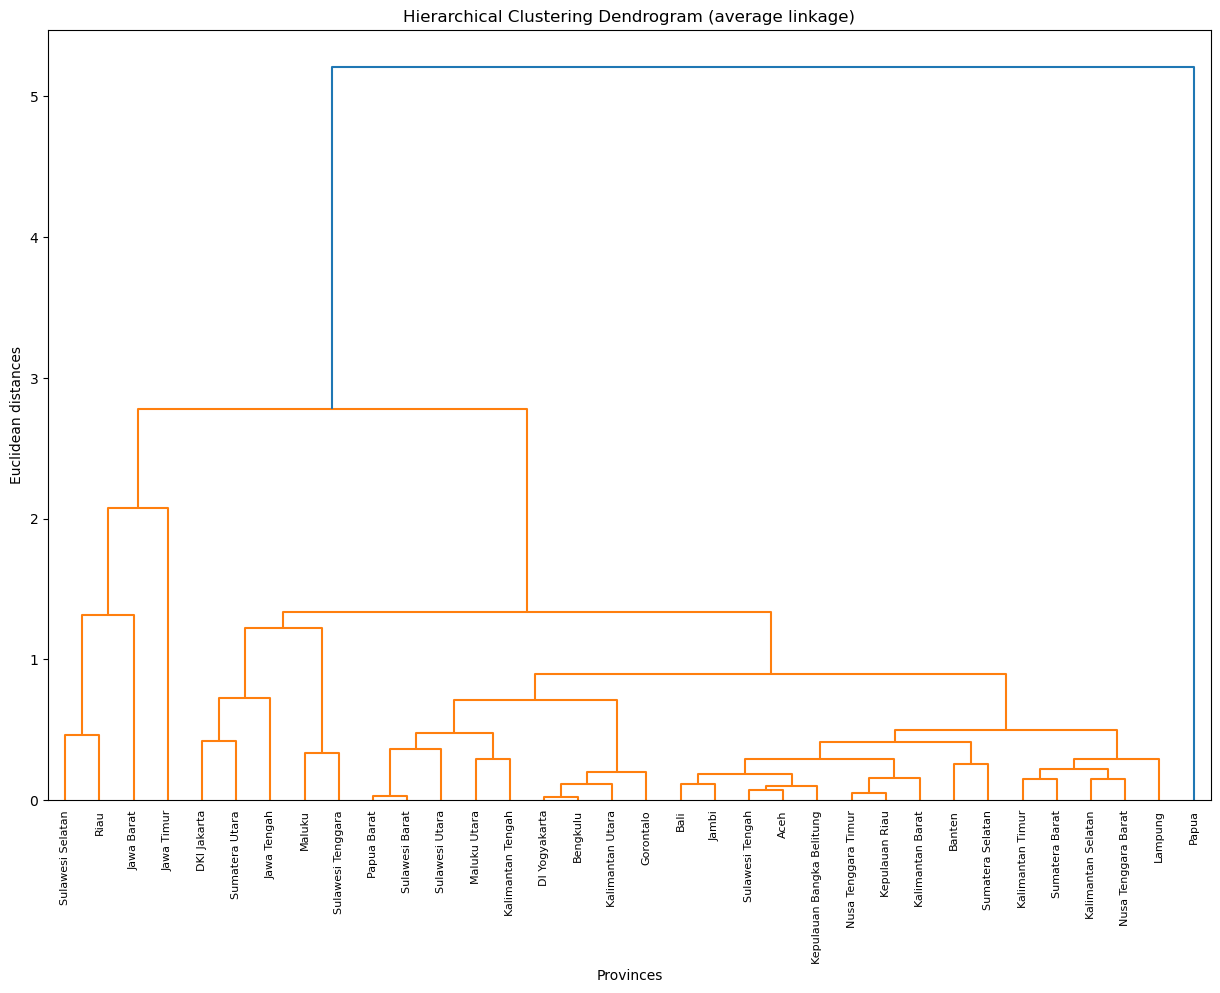

In [58]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import kneighbors_graph
import racplusplus
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import davies_bouldin_score

# Muat data Anda
df = pd.read_excel('Dataset Pertamini.xlsx')
df = df.set_index('Provinsi')
df_selected = df[['PREMIUM', 'BIOSOLAR']]

# Standardisasi data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df_selected)

# Definisikan metode linkage yang akan diuji
linkage_methods = ['average']

# Hitung KNN dan buat matriks simetris
knn = kneighbors_graph(data_scaled, 10, mode='connectivity', include_self=False)
symmetric_knn = knn.maximum(knn.T)

# Coba beberapa nilai max_merge_distance dan evaluasi
max_merge_distances = [1, 2, 3,4]
results = {}

for max_merge_distance in max_merge_distances:
    # RAC++ clustering
    rac_labels = racplusplus.rac(data_scaled, max_merge_distance, symmetric_knn.toarray(), 1000, 4, "euclidean")
    df_selected['Cluster'] = rac_labels
    
    # Evaluasi clustering dengan Davies-Bouldin Index
    davies_bouldin = davies_bouldin_score(data_scaled, rac_labels)
    results[max_merge_distance] = davies_bouldin
    
    # Visualisasi hasil klastering
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df_selected, x='PREMIUM', y='BIOSOLAR', hue='Cluster', palette='Set2')
    plt.title(f'RAC++ Clustering (max_merge_distance={max_merge_distance})')
    plt.show()

    # Visualisasi dendrogram
    linked = linkage(data_scaled, method='average')
    plt.figure(figsize=(15, 10))
    dendrogram(linked, labels=df_selected.index.tolist(), orientation='top', distance_sort='descending', show_leaf_counts=True)
    plt.title(f'Hierarchical Clustering Dendrogram ({method} linkage)')
    plt.xticks(rotation=90)
    plt.xlabel('Provinces')
    plt.ylabel('Euclidean distances')

# Print hasil evaluasi
for max_merge_distance, davies_bouldin in results.items():
    print(f"max_merge_distance={max_merge_distance}: Davies-Bouldin Index={davies_bouldin}")


C:\Users\ASUS\AppData\Local\Temp\ipykernel_21520\3033669283.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['Cluster'] = rac_labels


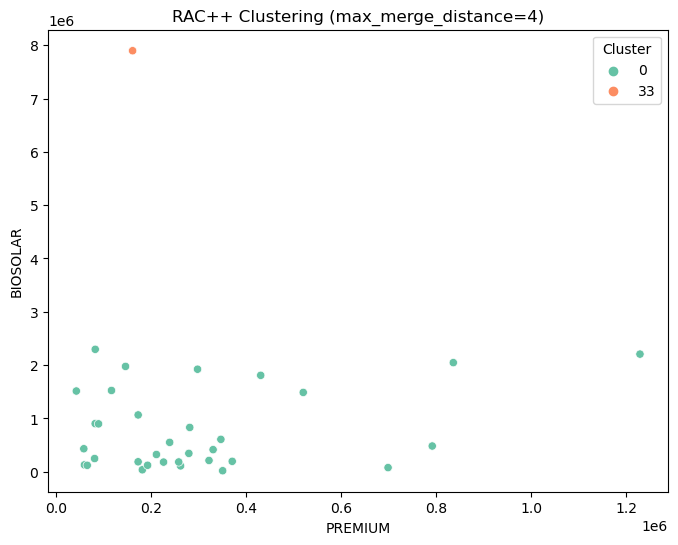

max_merge_distance=4: Davies-Bouldin Index=0.17552709374866765


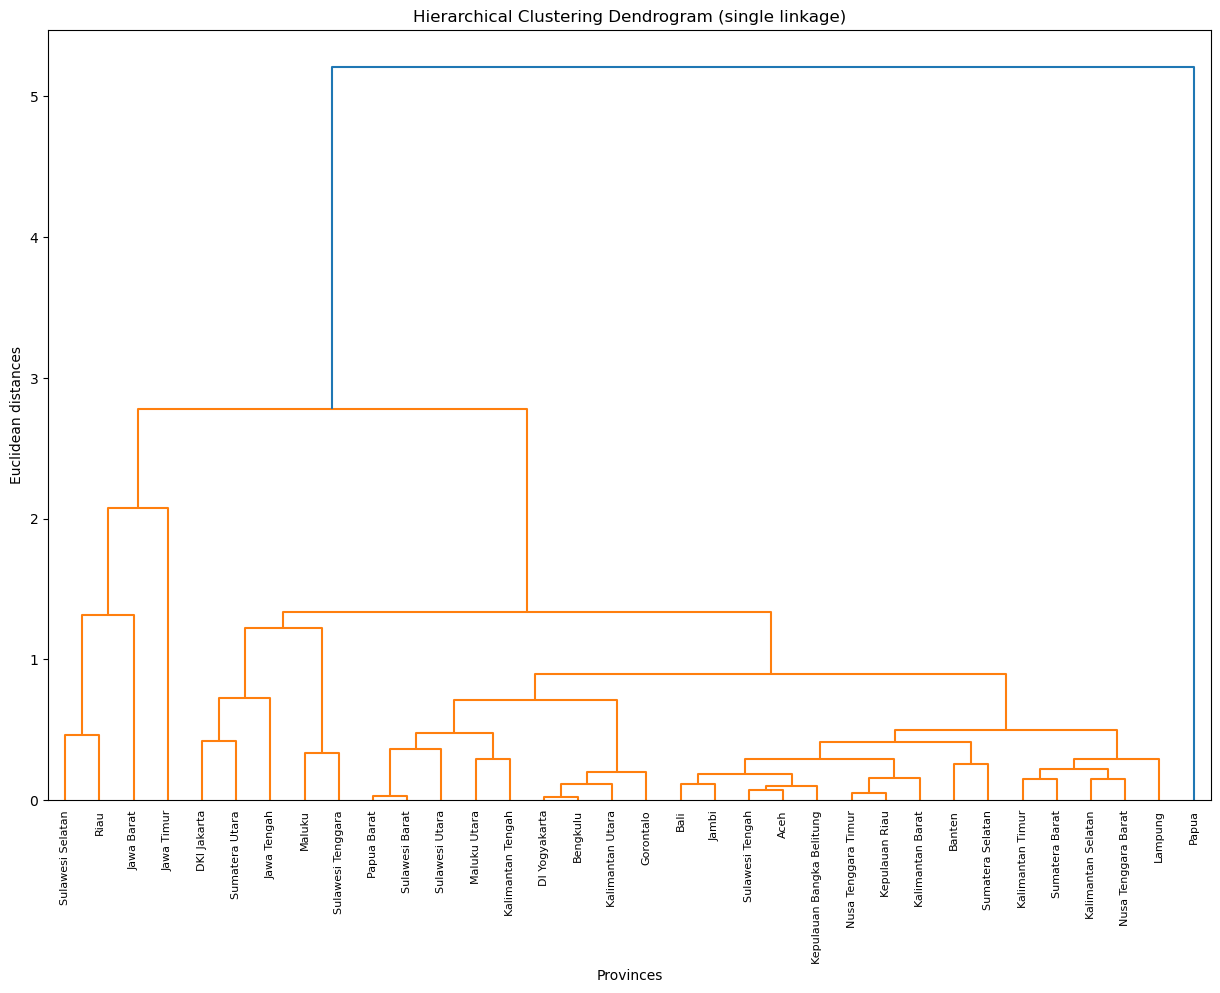

In [56]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import kneighbors_graph
import racplusplus
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import davies_bouldin_score

# Muat data Anda
df = pd.read_excel('Dataset Pertamini.xlsx')
df = df.set_index('Provinsi')
df_selected = df[['PREMIUM', 'BIOSOLAR']]

# Standardisasi data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df_selected)

# Definisikan metode linkage yang akan diuji
linkage_methods = ['average']

# Hitung KNN dan buat matriks simetris
knn = kneighbors_graph(data_scaled, 10, mode='connectivity', include_self=False)
symmetric_knn = knn.maximum(knn.T)

# Coba beberapa nilai max_merge_distance dan evaluasi
max_merge_distances = [4]
results = {}

for max_merge_distance in max_merge_distances:
    # RAC++ clustering
    rac_labels = racplusplus.rac(data_scaled, max_merge_distance, symmetric_knn.toarray(), 1000, 4, "euclidean")
    df_selected['Cluster'] = rac_labels
    
    # Evaluasi clustering dengan Davies-Bouldin Index
    davies_bouldin = davies_bouldin_score(data_scaled, rac_labels)
    results[max_merge_distance] = davies_bouldin
    
    # Visualisasi hasil klastering
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df_selected, x='PREMIUM', y='BIOSOLAR', hue='Cluster', palette='Set2')
    plt.title(f'RAC++ Clustering (max_merge_distance={max_merge_distance})')
    plt.show()

    # Visualisasi dendrogram
    linked = linkage(data_scaled, method='average')
    plt.figure(figsize=(15, 10))
    dendrogram(linked, labels=df_selected.index.tolist(), orientation='top', distance_sort='descending', show_leaf_counts=True)
    plt.title(f'Hierarchical Clustering Dendrogram ({method} linkage)')
    plt.xticks(rotation=90)
    plt.xlabel('Provinces')
    plt.ylabel('Euclidean distances')

# Print hasil evaluasi
for max_merge_distance, davies_bouldin in results.items():
    print(f"max_merge_distance={max_merge_distance}: Davies-Bouldin Index={davies_bouldin}")


C:\Users\ASUS\AppData\Local\Temp\ipykernel_27980\3033669283.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['Cluster'] = rac_labels


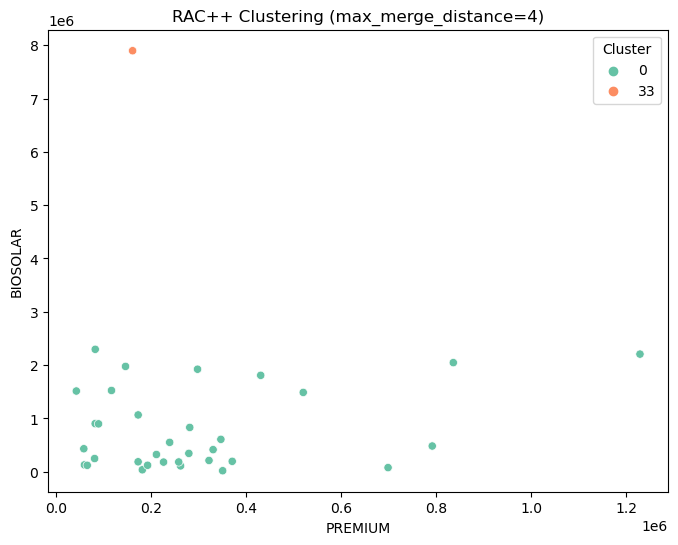

max_merge_distance=4: Davies-Bouldin Index=0.17552709374866765


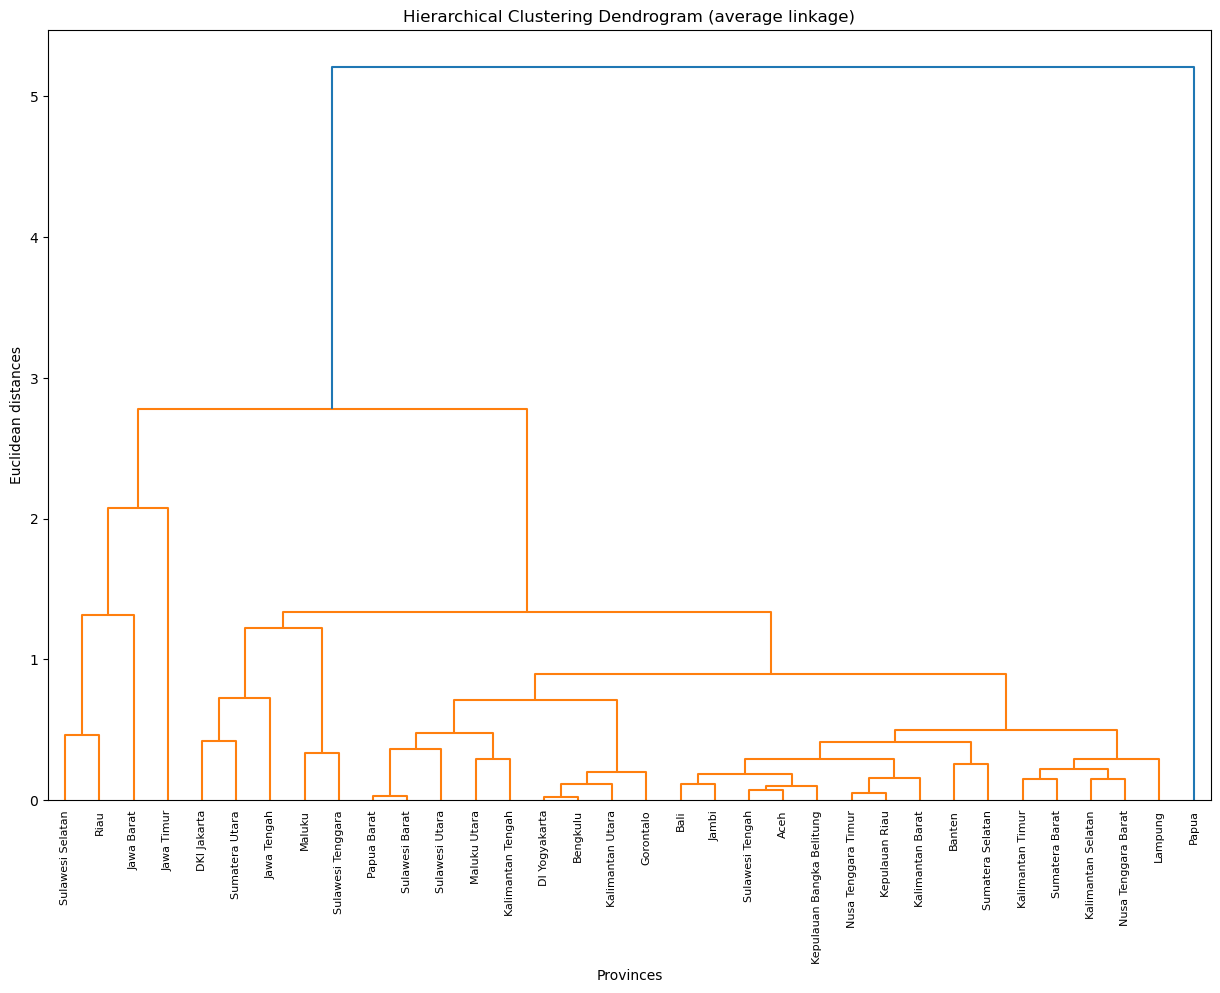

In [21]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import kneighbors_graph
import racplusplus
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import davies_bouldin_score

# Muat data Anda
df = pd.read_excel('Dataset Pertamini.xlsx')
df = df.set_index('Provinsi')
df_selected = df[['PREMIUM', 'BIOSOLAR']]

# Standardisasi data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df_selected)

# Definisikan metode linkage yang akan diuji
linkage_methods = ['average']

# Hitung KNN dan buat matriks simetris
knn = kneighbors_graph(data_scaled, 10, mode='connectivity', include_self=False)
symmetric_knn = knn.maximum(knn.T)

# Coba beberapa nilai max_merge_distance dan evaluasi
max_merge_distances = [4]
results = {}

for max_merge_distance in max_merge_distances:
    # RAC++ clustering
    rac_labels = racplusplus.rac(data_scaled, max_merge_distance, symmetric_knn.toarray(), 1000, 4, "euclidean")
    df_selected['Cluster'] = rac_labels
    
    # Evaluasi clustering dengan Davies-Bouldin Index
    davies_bouldin = davies_bouldin_score(data_scaled, rac_labels)
    results[max_merge_distance] = davies_bouldin
    
    # Visualisasi hasil klastering
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df_selected, x='PREMIUM', y='BIOSOLAR', hue='Cluster', palette='Set2')
    plt.title(f'RAC++ Clustering (max_merge_distance={max_merge_distance})')
    plt.show()

    # Visualisasi dendrogram
    linked = linkage(data_scaled, method='average')
    plt.figure(figsize=(15, 10))
    dendrogram(linked, labels=df_selected.index.tolist(), orientation='top', distance_sort='descending', show_leaf_counts=True)
    plt.title(f'Hierarchical Clustering Dendrogram ({method} linkage)')
    plt.xticks(rotation=90)
    plt.xlabel('Provinces')
    plt.ylabel('Euclidean distances')

# Print hasil evaluasi
for max_merge_distance, davies_bouldin in results.items():
    print(f"max_merge_distance={max_merge_distance}: Davies-Bouldin Index={davies_bouldin}")


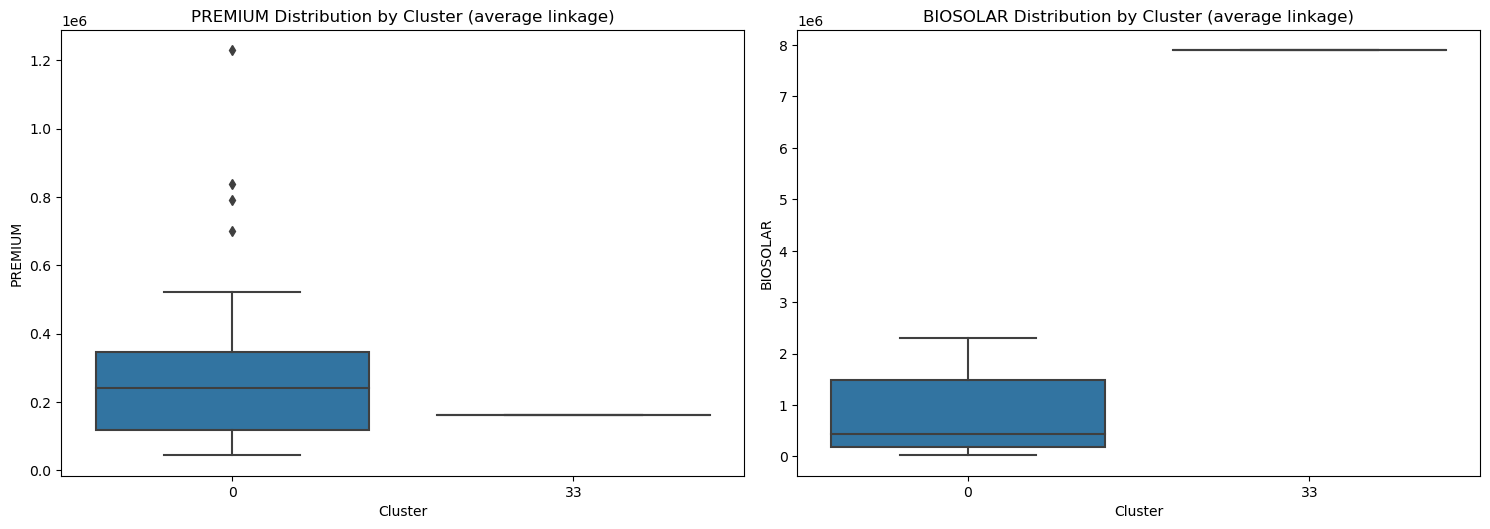

In [22]:
# Analisis karakteristik klaster
for method in linkage_methods:
    # Visualisasi distribusi fitur berdasarkan klaster
    plt.figure(figsize=(15, 10))
    for i, column in enumerate(df_selected.columns[:-1]):  # Exclude the 'Cluster' column
        plt.subplot(2, 2, i + 1)
        sns.boxplot(x='Cluster', y=column, data=df_selected)
        plt.title(f'{column} Distribution by Cluster ({method} linkage)')
    
    plt.tight_layout()
    plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_21520\1097551376.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['Cluster'] = rac_labels


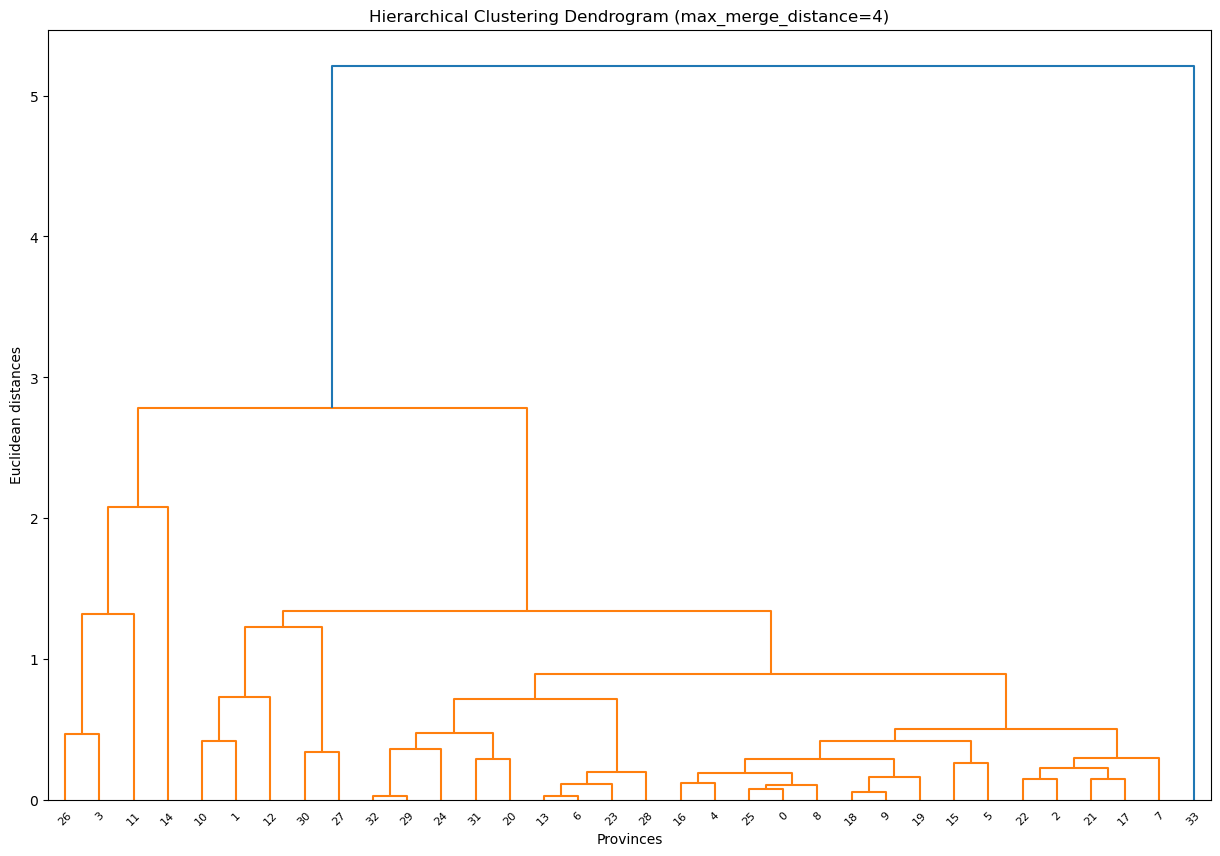

max_merge_distance=4: Davies-Bouldin Index=0.17552709374866765


In [54]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import kneighbors_graph
import racplusplus
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import davies_bouldin_score

# Muat data Anda
df = pd.read_excel('Dataset Pertamini.xlsx')
df = df.set_index('Provinsi')
df_selected = df[['PREMIUM', 'BIOSOLAR']]

# Standardisasi data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df_selected)

# Definisikan metode linkage yang akan diuji
linkage_methods = ['average']

# Hitung KNN dan buat matriks simetris
knn = kneighbors_graph(data_scaled, 10, mode='connectivity', include_self=False)
symmetric_knn = knn.maximum(knn.T)

# Coba beberapa nilai max_merge_distance dan evaluasi
max_merge_distances = [4]
results = {}

for max_merge_distance in max_merge_distances:
    # RAC++ clustering
    rac_labels = racplusplus.rac(data_scaled, max_merge_distance, symmetric_knn.toarray(), 1000, 4, "euclidean")
    df_selected['Cluster'] = rac_labels
    
    # Evaluasi clustering dengan Davies-Bouldin Index
    davies_bouldin = davies_bouldin_score(data_scaled, rac_labels)
    results[max_merge_distance] = davies_bouldin
    
    # Visualisasi dendrogram
    linked = linkage(data_scaled, method='average')
    plt.figure(figsize=(15, 10))
    dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
    plt.title(f'Hierarchical Clustering Dendrogram (max_merge_distance={max_merge_distance})')
    plt.xlabel('Provinces')
    plt.ylabel('Euclidean distances')
    plt.show()

# Print hasil evaluasi
for max_merge_distance, davies_bouldin in results.items():
    print(f"max_merge_distance={max_merge_distance}: Davies-Bouldin Index={davies_bouldin}")


In [55]:
df_selected

,PREMIUM,BIOSOLAR,Cluster
Provinsi,,,
Aceh,181973,36798,0
Sumatera Utara,431005,1808209,0
Sumatera Barat,330848,414606,0
Riau,698926,77686,0
Jambi,211627,323671,0
Sumatera Selatan,239477,550981,0
Bengkulu,60149,129058,0
Lampung,347218,607444,0
Kepulauan Bangka Belitung,173105,186764,0


Cophenetic Correlation for ward linkage: 0.8201
Cophenetic Correlation for complete linkage: 0.8892
Cophenetic Correlation for average linkage: 0.9288
Cophenetic Correlation for single linkage: 0.9045


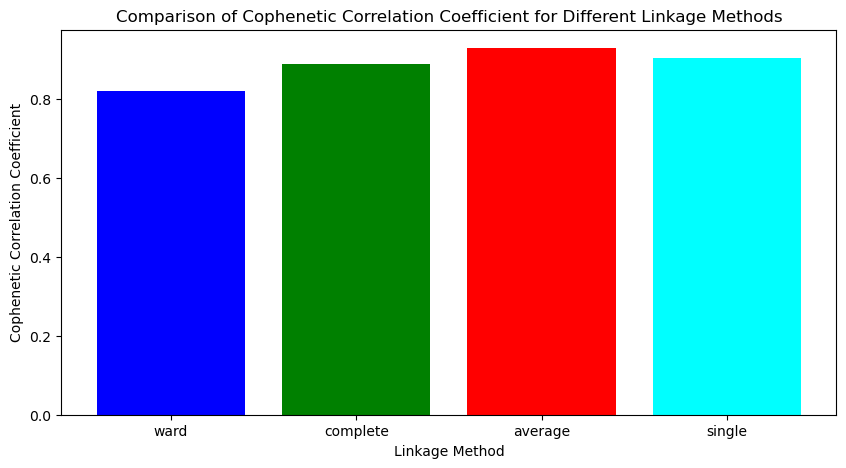

In [9]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, cophenet
from scipy.spatial.distance import pdist
import matplotlib.pyplot as plt

# Muat data Anda
df = pd.read_excel('Dataset Pertamini.xlsx')  # Pastikan Anda mengganti dengan path file yang benar
df = df.set_index('Provinsi')
df_selected = df[['PREMIUM', 'BIOSOLAR']]  # Pilih kolom yang relevan

# Standardisasi data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df_selected)

# Definisikan metode linkage yang akan diuji
linkage_methods = ['ward', 'complete', 'average', 'single']
cophenetic_corrs = {}

# Hitung dan bandingkan cophenetic correlation coefficient untuk setiap metode linkage
for method in linkage_methods:
    # Buat linkage matrix
    Z = linkage(data_scaled, method=method)
    
    # Hitung cophenetic correlation coefficient
    c, coph_dists = cophenet(Z, pdist(data_scaled))
    cophenetic_corrs[method] = c

# Tampilkan hasil
for method, c in cophenetic_corrs.items():
    print(f'Cophenetic Correlation for {method} linkage: {c:.4f}')

# Visualisasi hasil
plt.figure(figsize=(10, 5))
plt.bar(cophenetic_corrs.keys(), cophenetic_corrs.values(), color=['blue', 'green', 'red', 'cyan'])
plt.xlabel('Linkage Method')
plt.ylabel('Cophenetic Correlation Coefficient')
plt.title('Comparison of Cophenetic Correlation Coefficient for Different Linkage Methods')
plt.show()


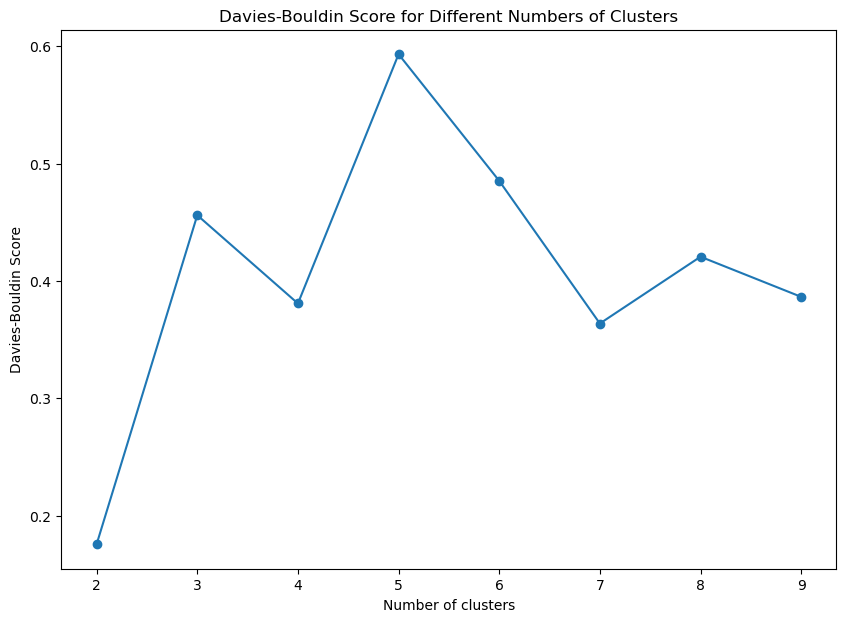

Optimal number of clusters: 2


In [10]:
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt

# Tentukan rentang kluster yang ingin diuji
range_n_clusters = list(range(2, 10))

# Variabel untuk menyimpan skor Davies-Bouldin
davies_bouldin_scores = []

for n_clusters in range_n_clusters:
    # Agglomerative clustering
    agglomerative = AgglomerativeClustering(n_clusters=n_clusters, linkage='average')
    cluster_labels = agglomerative.fit_predict(data_scaled)
    
    # Davies-Bouldin score
    davies_bouldin = davies_bouldin_score(data_scaled, cluster_labels)
    davies_bouldin_scores.append(davies_bouldin)

# Plot Davies-Bouldin scores
plt.figure(figsize=(10, 7))
plt.plot(range_n_clusters, davies_bouldin_scores, marker='o')
plt.title('Davies-Bouldin Score for Different Numbers of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Davies-Bouldin Score')
plt.show()

# Cetak jumlah kluster dengan skor Davies-Bouldin terendah
optimal_clusters = range_n_clusters[np.argmin(davies_bouldin_scores)]
print(f'Optimal number of clusters: {optimal_clusters}')

In [11]:
davies_bouldin_scores

[0.17552709374866765,
 0.45596941867703017,
 0.3807385508577491,
 0.5931959949987508,
 0.4852441162214339,
 0.3636623719939058,
 0.42059070310263746,
 0.38638686530810135]

C:\Users\ASUS\AppData\Local\Temp\ipykernel_27980\1803144840.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['Cluster'] = cluster_labels


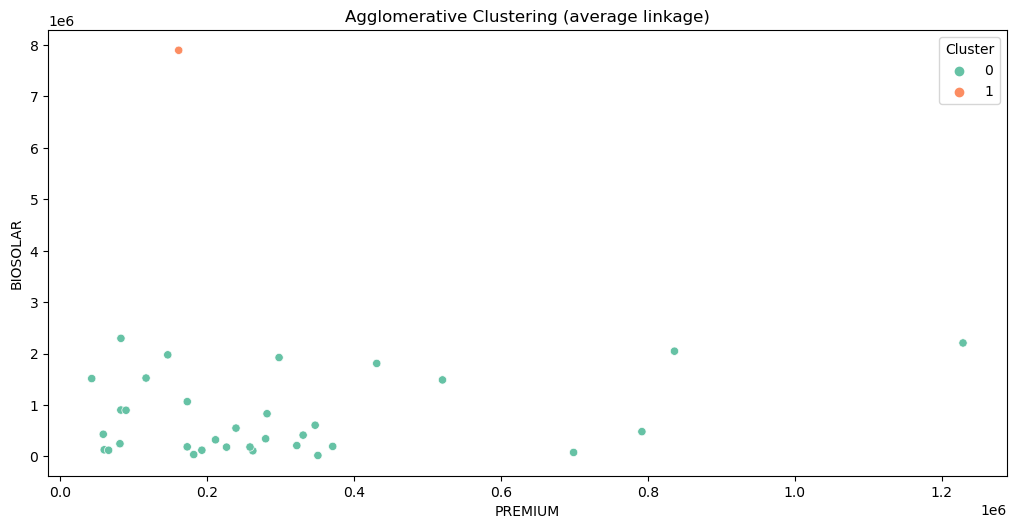

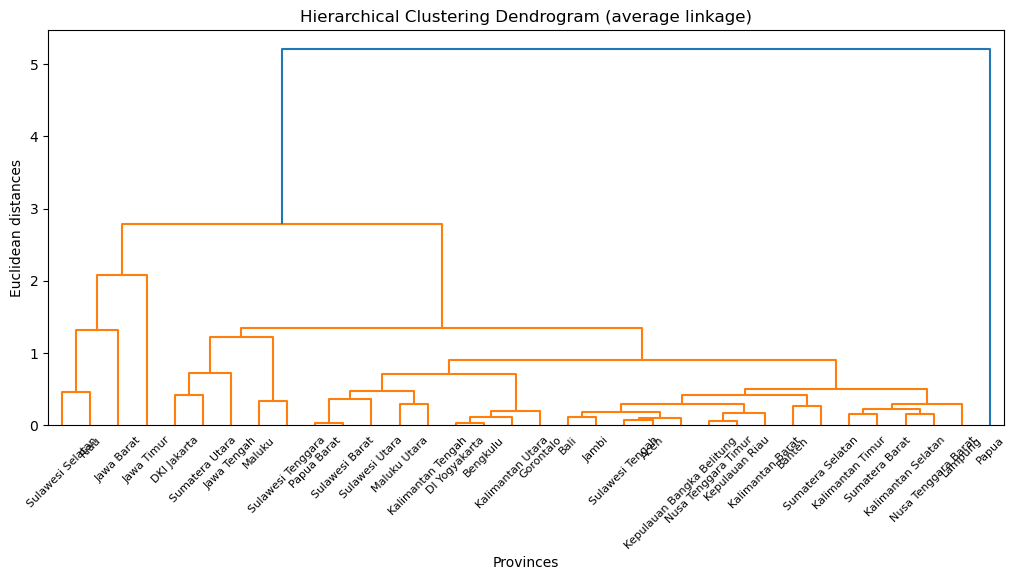

In [12]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage

# Definisikan metode linkage yang akan diuji
linkage_methods = ['average']

plt.figure(figsize=(20, 10))

for i, method in enumerate(linkage_methods):
    # Agglomerative clustering
    agglomerative = AgglomerativeClustering(n_clusters=2, linkage=method)
    cluster_labels = agglomerative.fit_predict(data_scaled)
    
    # Tambahkan label klaster ke DataFrame asli
    df_selected['Cluster'] = cluster_labels
    
    # Visualisasi hasil klastering
    plt.subplot(2, 2, i + 1)
    sns.scatterplot(data=df_selected, x='PREMIUM', y='BIOSOLAR', hue='Cluster', palette='Set2')
    plt.title(f'Agglomerative Clustering ({method} linkage)')
    
plt.tight_layout()
plt.show()

# Visualisasi dendrogram untuk setiap metode linkage
plt.figure(figsize=(20, 10))

for i, method in enumerate(linkage_methods):
    linked = linkage(data_scaled, method=method)
    
    plt.subplot(2, 2, i + 1)
    dendrogram(linked, labels=df_selected.index.tolist(), orientation='top', distance_sort='descending', show_leaf_counts=True)
    plt.title(f'Hierarchical Clustering Dendrogram ({method} linkage)')
    plt.xlabel('Provinces')
    plt.ylabel('Euclidean distances')

plt.tight_layout()
plt.show()


C:\Users\ASUS\AppData\Local\Temp\ipykernel_27980\1685054363.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['Cluster'] = cluster_labels


Karakteristik klaster untuk linkage average:
               PREMIUM      BIOSOLAR
Cluster                             
0        298136.393939  7.713047e+05
1        161499.000000  7.896164e+06




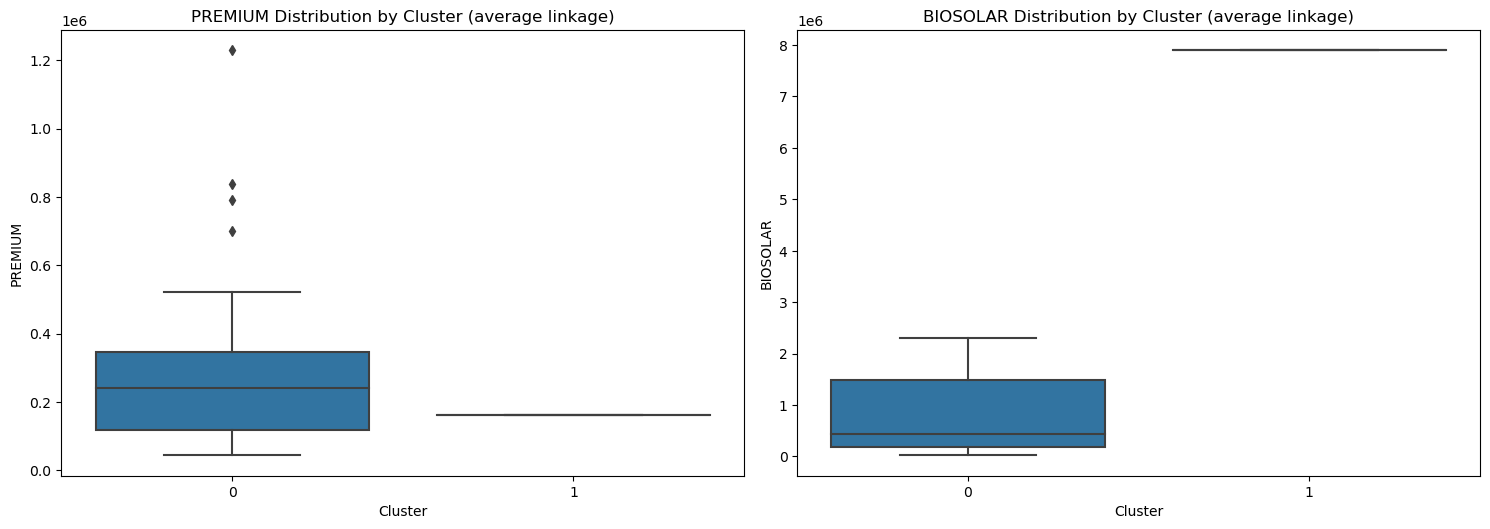

In [13]:
# Analisis karakteristik klaster
for method in linkage_methods:
    agglomerative = AgglomerativeClustering(n_clusters=2, linkage=method)
    cluster_labels = agglomerative.fit_predict(data_scaled)
    df_selected['Cluster'] = cluster_labels
    
    print(f'Karakteristik klaster untuk linkage {method}:')
    print(df_selected.groupby('Cluster').mean())  # Tampilkan rata-rata setiap fitur untuk setiap klaster
    print('\n')
    
    # Visualisasi distribusi fitur berdasarkan klaster
    plt.figure(figsize=(15, 10))
    for i, column in enumerate(df_selected.columns[:-1]):  # Exclude the 'Cluster' column
        plt.subplot(2, 2, i + 1)
        sns.boxplot(x='Cluster', y=column, data=df_selected)
        plt.title(f'{column} Distribution by Cluster ({method} linkage)')
    
    plt.tight_layout()
    plt.show()

In [16]:
# ringkasan statistik
summary_stats = df_selected.groupby('Cluster').describe()
summary_stats

PREMIUM                                                              \
          count           mean            std       min       25%       50%   
Cluster                                                                       
0          33.0  298136.393939  261385.121529   43136.0  117097.0  239477.0   
1           1.0  161499.000000            NaN  161499.0  161499.0  161499.0   

                             BIOSOLAR                                          \
              75%        max    count          mean            std        min   
Cluster                                                                         
0        347218.0  1228895.0     33.0  7.713047e+05  742405.067858    19141.0   
1        161499.0   161499.0      1.0  7.896164e+06            NaN  7896164.0   

                                                     
               25%        50%        75%        max  
Cluster                                              
0         183325.0   431556.0  1487642.0  2295881.0  
1        7896164.0  7896164.0  7896164.0  7896164.0

In [157]:
df_selected

,PREMIUM,BIOSOLAR,Cluster
Provinsi,,,
Aceh,181973,36798,0
Sumatera Utara,431005,1808209,0
Sumatera Barat,330848,414606,0
Riau,698926,77686,0
Jambi,211627,323671,0
Sumatera Selatan,239477,550981,0
Bengkulu,60149,129058,0
Lampung,347218,607444,0
Kepulauan Bangka Belitung,173105,186764,0


In [72]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Muat data Anda
df = pd.read_excel('Dataset Pertamini.xlsx')  # Pastikan Anda mengganti dengan path file yang benar
df = df.set_index('Provinsi')
df_selected = df[['PREMIUM', 'BIOSOLAR']]  # Pilih kolom yang relevan

# Standardisasi data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df_selected)

# Definisikan metode linkage yang akan diuji
linkage_methods = ['ward', 'complete', 'average', 'single']

# Simpan hasil evaluasi
results = []

for method in linkage_methods:
    # Agglomerative clustering
    agglomerative = AgglomerativeClustering(n_clusters=3, linkage=method)
    cluster_labels = agglomerative.fit_predict(data_scaled)
    
    # Hitung koefisien evaluasi
    if len(set(cluster_labels)) > 1:  # Mengecek jika lebih dari satu klaster terbentuk
        silhouette = silhouette_score(data_scaled, cluster_labels)
        davies_bouldin = davies_bouldin_score(data_scaled, cluster_labels)
    else:
        silhouette = None
        davies_bouldin = None
    
    # Simpan hasilnya
    results.append((method, silhouette, davies_bouldin))

# Tampilkan hasil evaluasi
print(f"{'Method':<10} {'Silhouette Score':<20} {'Davies-Bouldin Index':<20}")
for method, silhouette, davies_bouldin in results:
    print(f"{method:<10} {silhouette if silhouette is not None else 'N/A':<20} {davies_bouldin if davies_bouldin is not None else 'N/A':<20}")


Method     Silhouette Score     Davies-Bouldin Index
ward       0.6257853129155861   0.45596941867703017 
complete   0.6257853129155861   0.45596941867703017 
average    0.6257853129155861   0.45596941867703017 
single     0.634195372293064    0.18289473223576466 


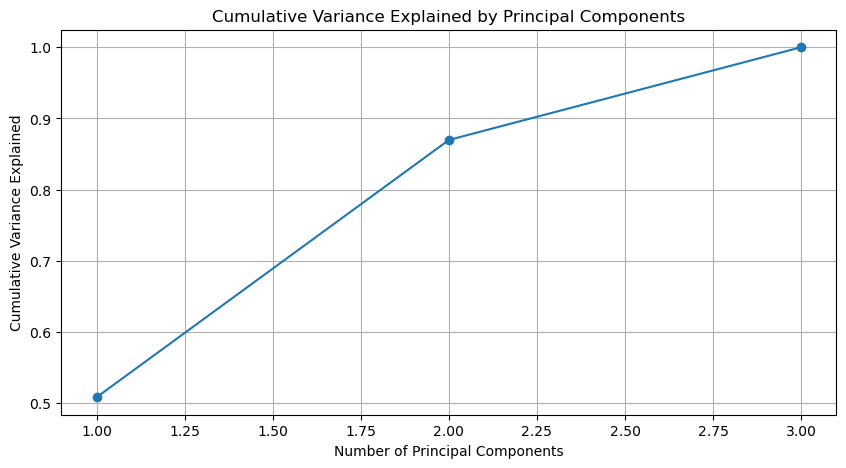

In [144]:
# Muat data Anda
df = pd.read_excel('Dataset Pertamini.xlsx')  # Pastikan Anda mengganti dengan path file yang benar
df = df.set_index('Provinsi')
df_selected = df[['TRANS', 'ROAD', 'PROVERTY']]  # Pilih kolom yang relevan

# Standardisasi data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df_selected)

# Menerapkan PCA
pca = PCA()
data_pca = pca.fit_transform(data_scaled)

# Melihat varians yang dijelaskan oleh setiap komponen utama
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Plot cumulative variance untuk menentukan jumlah komponen utama
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.title('Cumulative Variance Explained by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Explained')
plt.grid(True)
plt.show()

In [145]:
n_components = 2
pca = PCA(n_components=n_components)
data_reduced = pca.fit_transform(data_scaled)

print("Data setelah PCA:")
print(data_reduced)

Data setelah PCA:
[[ 1.70382761e-01  1.10757803e+00]
 [ 2.07496044e+00  4.61204539e-01]
 [ 2.49711317e-01 -5.33182664e-01]
 [ 6.29111484e-01 -3.16803209e-01]
 [-3.33792561e-01 -5.17156502e-01]
 [ 1.54116907e-01  4.26194953e-01]
 [-9.49552681e-01  5.50755683e-01]
 [ 2.36371671e-01  3.80763955e-01]
 [-9.11717210e-01 -1.28952324e+00]
 [-9.66146442e-01 -1.04523687e+00]
 [ 1.54294797e+00 -1.79551420e+00]
 [ 2.43828506e+00 -3.04912734e-01]
 [ 2.74773956e+00  2.63158198e-01]
 [-9.66716143e-01 -1.74753206e-01]
 [ 4.02210755e+00  4.89078117e-01]
 [-7.69243509e-01 -1.05098147e+00]
 [-3.18625310e-01 -1.29260890e+00]
 [-8.82029910e-01  4.10702564e-01]
 [-1.16616042e-01  2.12658470e+00]
 [ 7.35544774e-02 -5.00695701e-01]
 [ 1.19511967e-03 -7.25112963e-01]
 [-1.96488467e-01 -1.06130657e+00]
 [-1.95367712e-01 -7.52341006e-01]
 [-1.14725254e+00 -9.00064641e-01]
 [-7.03877298e-01 -6.49426074e-01]
 [-3.48710524e-01  4.62299417e-01]
 [ 1.04003709e+00  2.08550371e-01]
 [-6.32849808e-01  1.38020395e-01]
 [

Cophenetic Correlation for ward linkage: 0.8147
Cophenetic Correlation for complete linkage: 0.8381
Cophenetic Correlation for average linkage: 0.8405
Cophenetic Correlation for single linkage: 0.7635


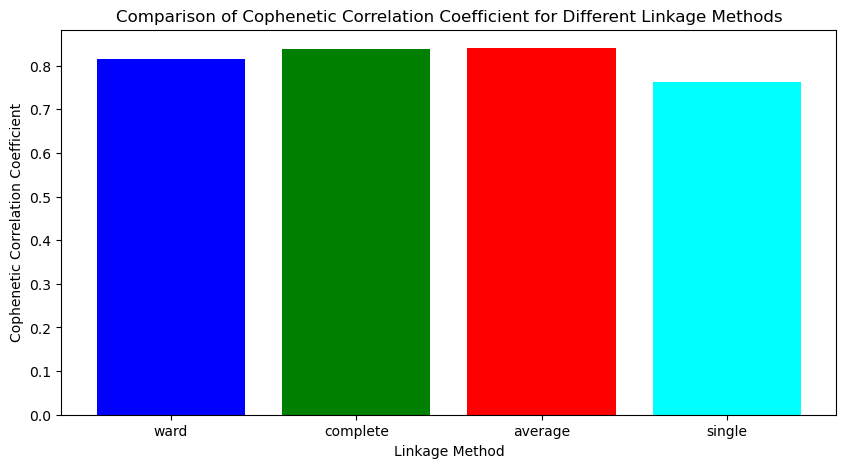

In [146]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, cophenet
from scipy.spatial.distance import pdist
import matplotlib.pyplot as plt

# Definisikan metode linkage yang akan diuji
linkage_methods = ['ward', 'complete', 'average', 'single']
cophenetic_corrs = {}

# Hitung dan bandingkan cophenetic correlation coefficient untuk setiap metode linkage
for method in linkage_methods:
    # Buat linkage matrix
    Z = linkage(data_reduced, method=method)
    
    # Hitung cophenetic correlation coefficient
    c, coph_dists = cophenet(Z, pdist(data_reduced))
    cophenetic_corrs[method] = c

# Tampilkan hasil
for method, c in cophenetic_corrs.items():
    print(f'Cophenetic Correlation for {method} linkage: {c:.4f}')

# Visualisasi hasil
plt.figure(figsize=(10, 5))
plt.bar(cophenetic_corrs.keys(), cophenetic_corrs.values(), color=['blue', 'green', 'red', 'cyan'])
plt.xlabel('Linkage Method')
plt.ylabel('Cophenetic Correlation Coefficient')
plt.title('Comparison of Cophenetic Correlation Coefficient for Different Linkage Methods')
plt.show()


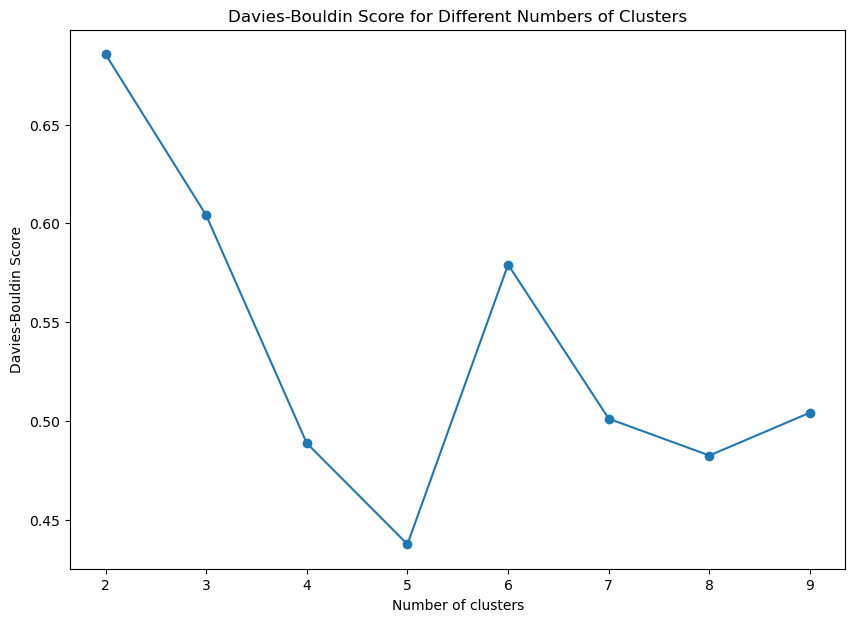

Optimal number of clusters: 5


In [148]:
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt

# Tentukan rentang kluster yang ingin diuji
range_n_clusters = list(range(2, 10))

# Variabel untuk menyimpan skor Davies-Bouldin
davies_bouldin_scores = []

for n_clusters in range_n_clusters:
    # Agglomerative clustering
    agglomerative = AgglomerativeClustering(n_clusters=n_clusters, linkage='average')
    cluster_labels = agglomerative.fit_predict(data_reduced)
    
    # Davies-Bouldin score
    davies_bouldin = davies_bouldin_score(data_reduced, cluster_labels)
    davies_bouldin_scores.append(davies_bouldin)

# Plot Davies-Bouldin scores
plt.figure(figsize=(10, 7))
plt.plot(range_n_clusters, davies_bouldin_scores, marker='o')
plt.title('Davies-Bouldin Score for Different Numbers of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Davies-Bouldin Score')
plt.show()

# Cetak jumlah kluster dengan skor Davies-Bouldin terendah
optimal_clusters = range_n_clusters[np.argmin(davies_bouldin_scores)]
print(f'Optimal number of clusters: {optimal_clusters}')


C:\Users\ASUS\AppData\Local\Temp\ipykernel_11256\31622922.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['Cluster'] = cluster_labels


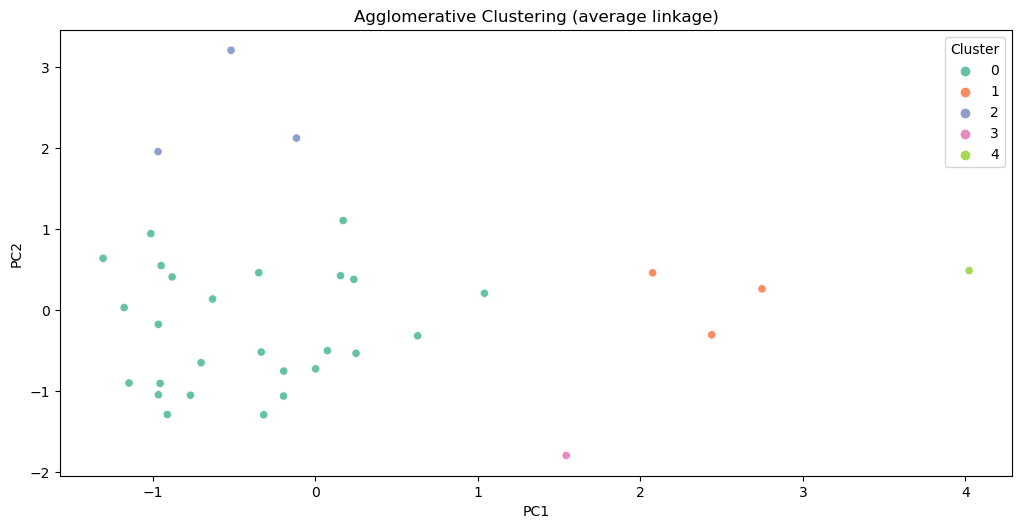

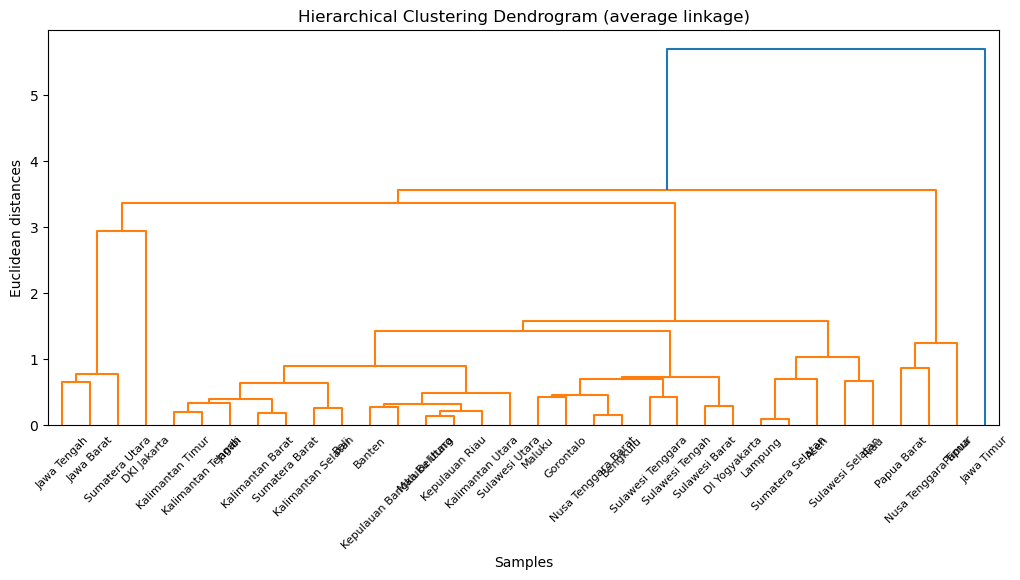

C:\Users\ASUS\AppData\Local\Temp\ipykernel_11256\31622922.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['Cluster'] = cluster_labels


Karakteristik klaster untuk linkage average:
                TRANS          ROAD   PROVERTY
Cluster                                       
0        2.169488e+06  13046.230769   9.204615
1        1.482468e+07  33325.666667   9.096667
2        6.212830e+05  19546.666667  22.820000
3        2.360542e+07  42422.000000  10.490000
4        2.191181e+07   6485.000000   4.610000




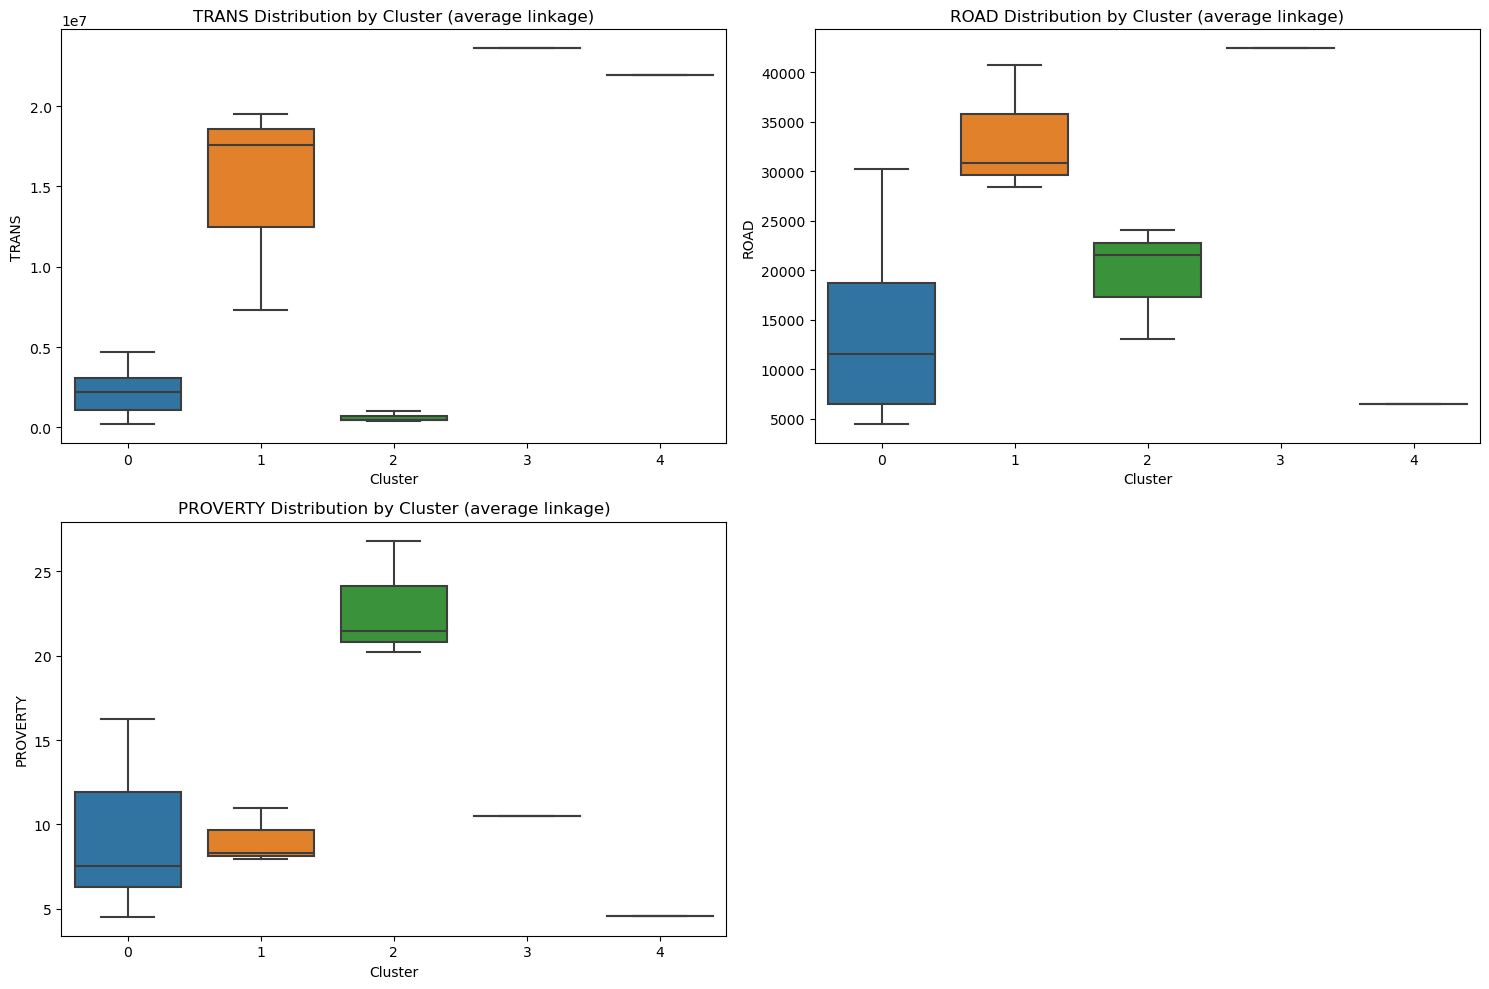

In [150]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage

# Muat data Anda
df = pd.read_excel('Dataset Pertamini.xlsx')
df = df.set_index('Provinsi')
df_selected = df[['TRANS', 'ROAD', 'PROVERTY']]  # Pilih kolom yang relevan

# Standardisasi data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df_selected)

# Menerapkan PCA
pca = PCA(n_components=2)
data_reduced = pca.fit_transform(data_scaled)
df_pca = pd.DataFrame(data_reduced, columns=['PC1', 'PC2'])

# Definisikan metode linkage yang akan diuji
linkage_methods = ['average']

plt.figure(figsize=(20, 10))

for i, method in enumerate(linkage_methods):
    # Agglomerative clustering
    agglomerative = AgglomerativeClustering(n_clusters=5, linkage=method)
    cluster_labels = agglomerative.fit_predict(df_pca)
    
    # Tambahkan label klaster ke DataFrame PCA dan DataFrame asli
    df_pca['Cluster'] = cluster_labels
    df_selected['Cluster'] = cluster_labels
    
    # Visualisasi hasil klastering
    plt.subplot(2, 2, i + 1)
    sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='Cluster', palette='Set2')
    plt.title(f'Agglomerative Clustering ({method} linkage)')
    
plt.tight_layout()
plt.show()

# Visualisasi dendrogram untuk setiap metode linkage
plt.figure(figsize=(20, 10))

for i, method in enumerate(linkage_methods):
    linked = linkage(df_pca, method=method)
    
    plt.subplot(2, 2, i + 1)
    dendrogram(linked, labels=df_selected.index.tolist(), orientation='top', distance_sort='descending', show_leaf_counts=True)
    plt.title(f'Hierarchical Clustering Dendrogram ({method} linkage)')
    plt.xlabel('Samples')
    plt.ylabel('Euclidean distances')

plt.tight_layout()
plt.show()

# Analisis karakteristik klaster
for method in linkage_methods:
    agglomerative = AgglomerativeClustering(n_clusters=5, linkage=method)
    cluster_labels = agglomerative.fit_predict(df_pca)
    df_selected['Cluster'] = cluster_labels
    
    print(f'Karakteristik klaster untuk linkage {method}:')
    print(df_selected.groupby('Cluster').mean())  # Tampilkan rata-rata setiap fitur untuk setiap klaster
    print('\n')
    
    # Visualisasi distribusi fitur berdasarkan klaster
    plt.figure(figsize=(15, 10))
    for i, column in enumerate(df_selected.columns[:-1]):  # Exclude the 'Cluster' column
        plt.subplot(2, 2, i + 1)
        sns.boxplot(x='Cluster', y=column, data=df_selected)
        plt.title(f'{column} Distribution by Cluster ({method} linkage)')
    
    plt.tight_layout()
    plt.show()


In [151]:
df_selected

,TRANS,ROAD,PROVERTY,Cluster
Provinsi,,,,
Aceh,2426809,23660,14.75,0
Sumatera Utara,7339034,40765,8.33,1
Sumatera Barat,2656691,20999,6.04,0
Riau,4230607,24206,6.84,0
Jambi,2572804,13202,7.70,0
Sumatera Selatan,4019095,19587,11.95,0
Bengkulu,1127170,9228,14.34,0
Lampung,3921375,20765,11.44,0
Kepulauan Bangka Belitung,1160091,5891,4.61,0


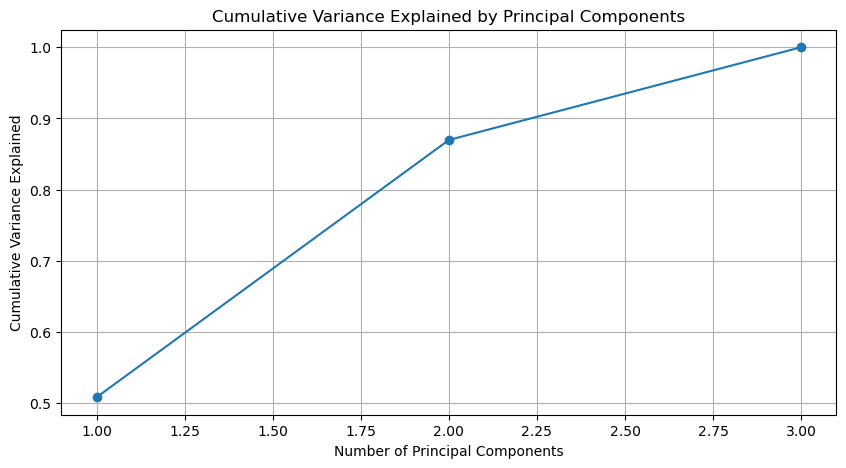

In [115]:
# Muat data Anda
df = pd.read_excel('Dataset Pertamini.xlsx')  # Pastikan Anda mengganti dengan path file yang benar
df = df.set_index('Provinsi')
df_selected = df[['TRANS', 'ROAD', 'PROVERTY']]  # Pilih kolom yang relevan

# Standardisasi data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df_selected)

# Menerapkan PCA
pca = PCA()
data_pca = pca.fit_transform(data_scaled)

# Melihat varians yang dijelaskan oleh setiap komponen utama
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Plot cumulative variance untuk menentukan jumlah komponen utama
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.title('Cumulative Variance Explained by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Explained')
plt.grid(True)
plt.show()

In [116]:
n_components = 2
pca = PCA(n_components=n_components)
data_reduced = pca.fit_transform(data_scaled)

print("Data setelah PCA:")
print(data_reduced)

Data setelah PCA:
[[ 1.70382761e-01  1.10757803e+00]
 [ 2.07496044e+00  4.61204539e-01]
 [ 2.49711317e-01 -5.33182664e-01]
 [ 6.29111484e-01 -3.16803209e-01]
 [-3.33792561e-01 -5.17156502e-01]
 [ 1.54116907e-01  4.26194953e-01]
 [-9.49552681e-01  5.50755683e-01]
 [ 2.36371671e-01  3.80763955e-01]
 [-9.11717210e-01 -1.28952324e+00]
 [-9.66146442e-01 -1.04523687e+00]
 [ 1.54294797e+00 -1.79551420e+00]
 [ 2.43828506e+00 -3.04912734e-01]
 [ 2.74773956e+00  2.63158198e-01]
 [-9.66716143e-01 -1.74753206e-01]
 [ 4.02210755e+00  4.89078117e-01]
 [-7.69243509e-01 -1.05098147e+00]
 [-3.18625310e-01 -1.29260890e+00]
 [-8.82029910e-01  4.10702564e-01]
 [-1.16616042e-01  2.12658470e+00]
 [ 7.35544774e-02 -5.00695701e-01]
 [ 1.19511967e-03 -7.25112963e-01]
 [-1.96488467e-01 -1.06130657e+00]
 [-1.95367712e-01 -7.52341006e-01]
 [-1.14725254e+00 -9.00064641e-01]
 [-7.03877298e-01 -6.49426074e-01]
 [-3.48710524e-01  4.62299417e-01]
 [ 1.04003709e+00  2.08550371e-01]
 [-6.32849808e-01  1.38020395e-01]
 [

In [142]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Definisikan metode linkage yang akan diuji
linkage_methods = ['ward', 'complete', 'average', 'single']

# Simpan hasil evaluasi
results = []

for method in linkage_methods:
    # Agglomerative clustering
    agglomerative = AgglomerativeClustering(n_clusters=5, linkage=method)
    cluster_labels = agglomerative.fit_predict(data_reduced)
    
    # Hitung koefisien evaluasi
    if len(set(cluster_labels)) > 1:  # Mengecek jika lebih dari satu klaster terbentuk
        silhouette = silhouette_score(data_reduced, cluster_labels)
        davies_bouldin = davies_bouldin_score(data_reduced, cluster_labels)
    else:
        silhouette = None
        davies_bouldin = None
    
    # Simpan hasilnya
    results.append((method, silhouette, davies_bouldin))

# Tampilkan hasil evaluasi
print(f"{'Method':<10} {'Silhouette Score':<20} {'Davies-Bouldin Index':<20}")
for method, silhouette, davies_bouldin in results:
    print(f"{method:<10} {silhouette if silhouette is not None else 'N/A':<20} {davies_bouldin if davies_bouldin is not None else 'N/A':<20}")


Method     Silhouette Score     Davies-Bouldin Index
ward       0.43261701185760026  0.6522113756168194  
complete   0.34955197809192073  0.6499696317832283  
average    0.41230362312390434  0.43749847746611453 
single     0.34719020982448634  0.38227593447003033 


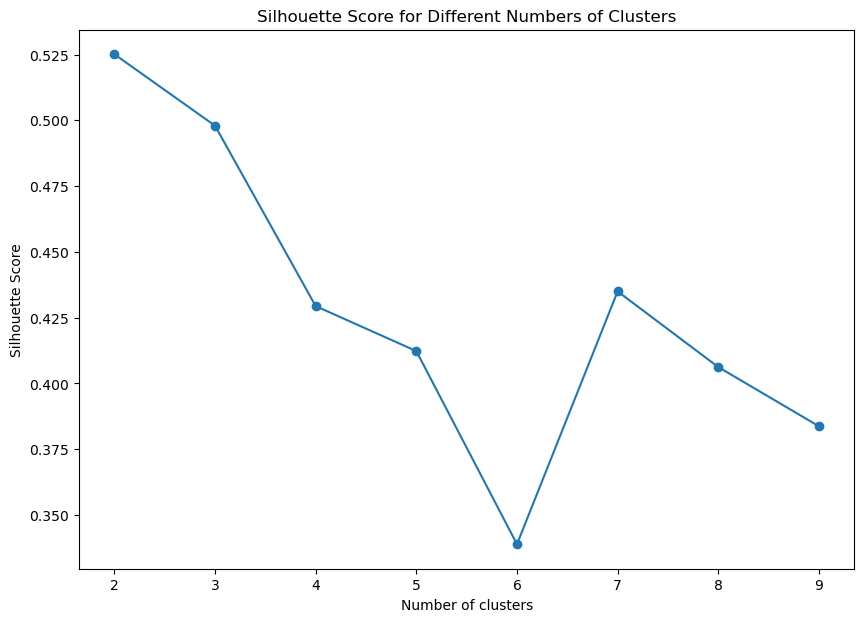

Optimal number of clusters: 2


In [137]:
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

# Tentukan rentang kluster yang ingin diuji
range_n_clusters = list(range(2, 10))

# Variabel untuk menyimpan skor silhouette
silhouette_avg_scores = []

for n_clusters in range_n_clusters:
    # Agglomerative clustering
    agglomerative = AgglomerativeClustering(n_clusters=n_clusters, linkage='average')
    cluster_labels = agglomerative.fit_predict(data_reduced)
    
    # Silhouette score
    silhouette_avg = silhouette_score(data_reduced, cluster_labels)
    silhouette_avg_scores.append(silhouette_avg)

# Plot silhouette scores
plt.figure(figsize=(10, 7))
plt.plot(range_n_clusters, silhouette_avg_scores, marker='o')
plt.title('Silhouette Score for Different Numbers of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

# Cetak jumlah kluster dengan skor silhouette tertinggi
optimal_clusters = range_n_clusters[np.argmax(silhouette_avg_scores)]
print(f'Optimal number of clusters: {optimal_clusters}')

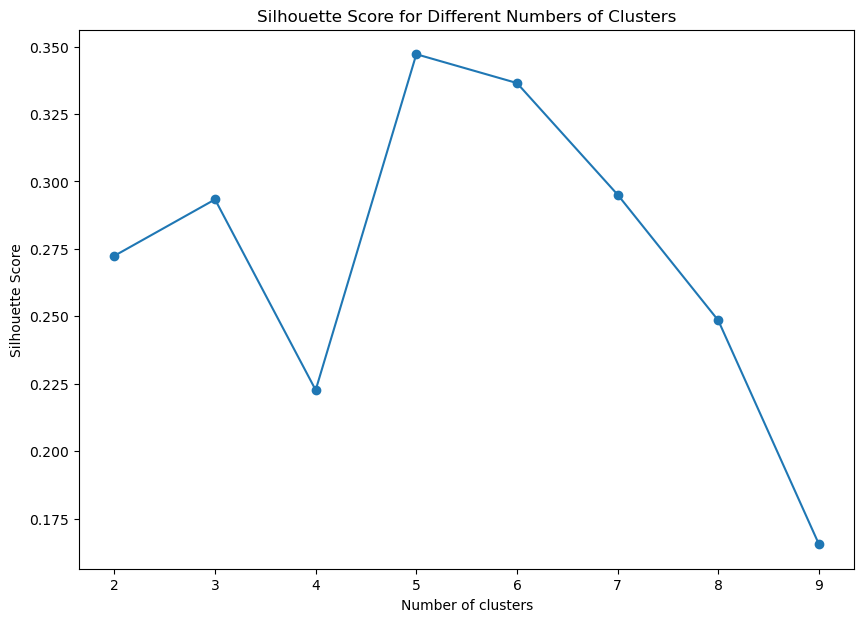

Optimal number of clusters: 5


In [120]:
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

# Tentukan rentang kluster yang ingin diuji
range_n_clusters = list(range(2, 10))

# Variabel untuk menyimpan skor silhouette
silhouette_avg_scores = []

for n_clusters in range_n_clusters:
    # Agglomerative clustering
    agglomerative = AgglomerativeClustering(n_clusters=n_clusters, linkage='single')
    cluster_labels = agglomerative.fit_predict(data_reduced)
    
    # Silhouette score
    silhouette_avg = silhouette_score(data_reduced, cluster_labels)
    silhouette_avg_scores.append(silhouette_avg)

# Plot silhouette scores
plt.figure(figsize=(10, 7))
plt.plot(range_n_clusters, silhouette_avg_scores, marker='o')
plt.title('Silhouette Score for Different Numbers of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

# Cetak jumlah kluster dengan skor silhouette tertinggi
optimal_clusters = range_n_clusters[np.argmax(silhouette_avg_scores)]
print(f'Optimal number of clusters: {optimal_clusters}')

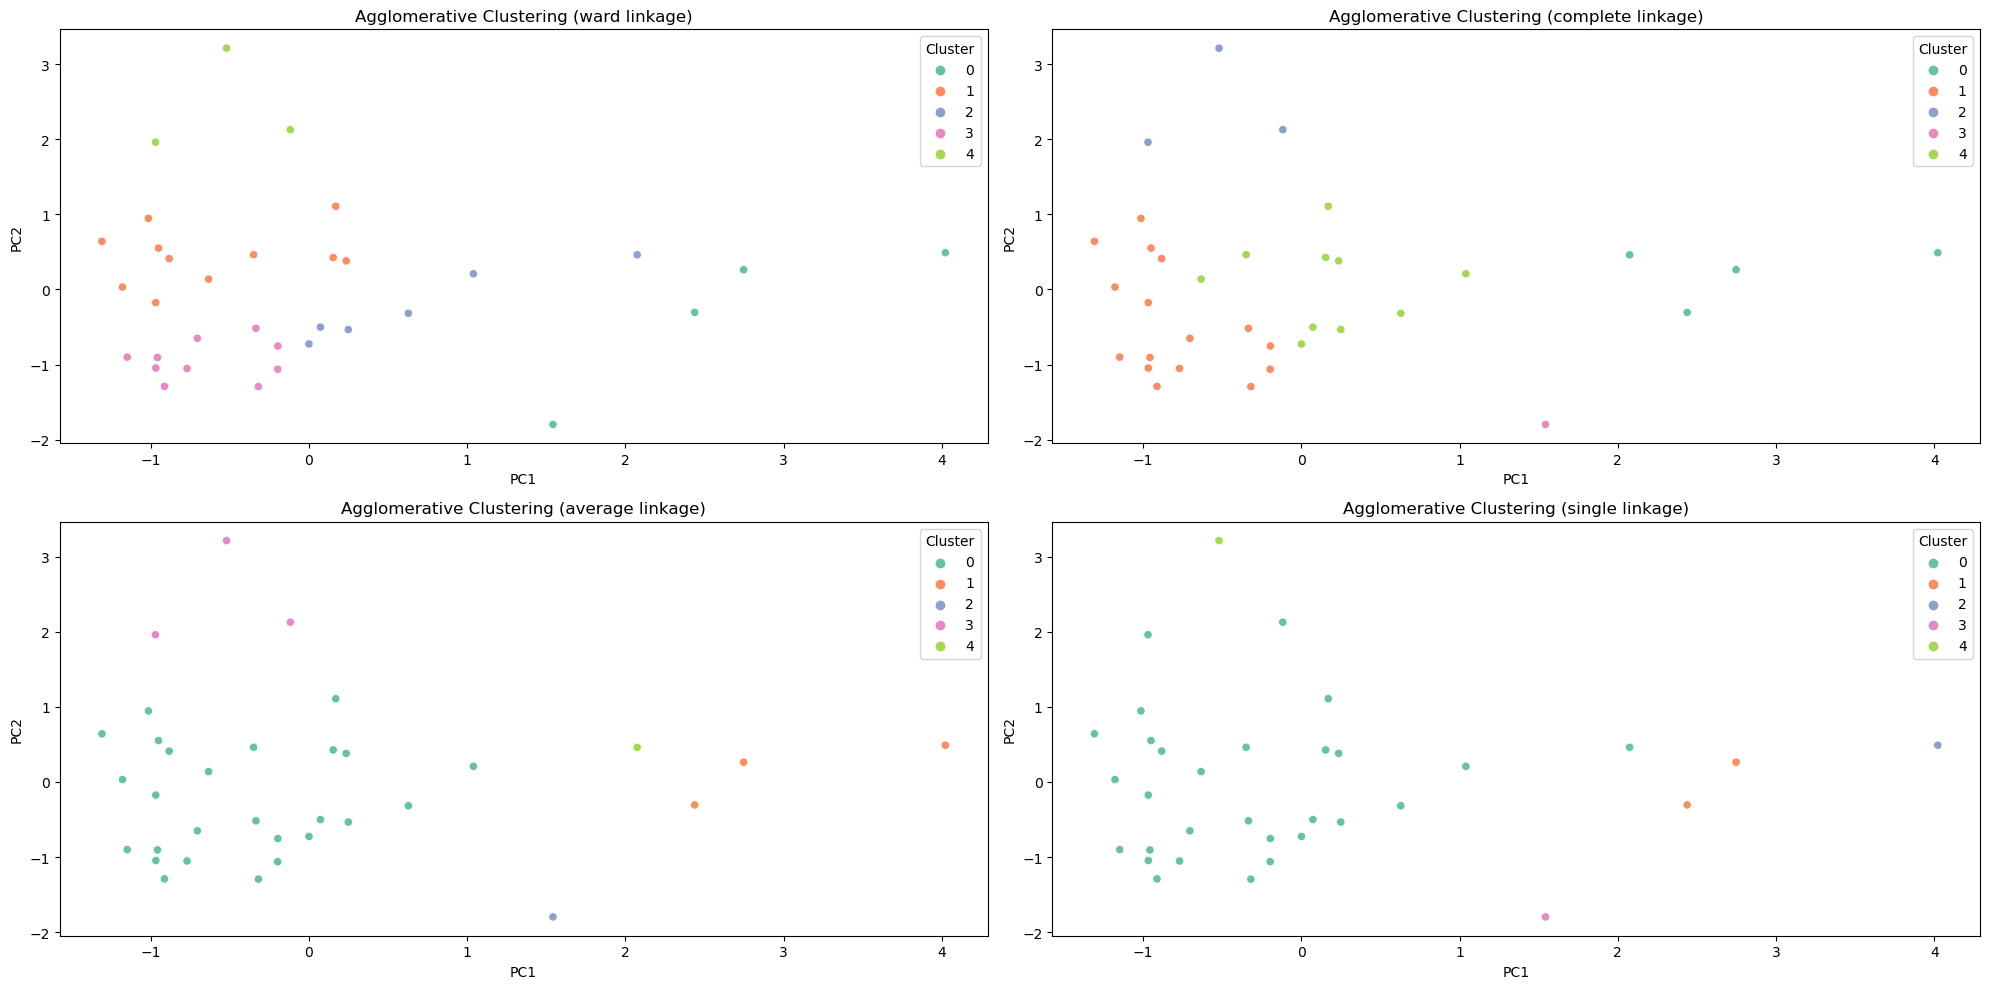

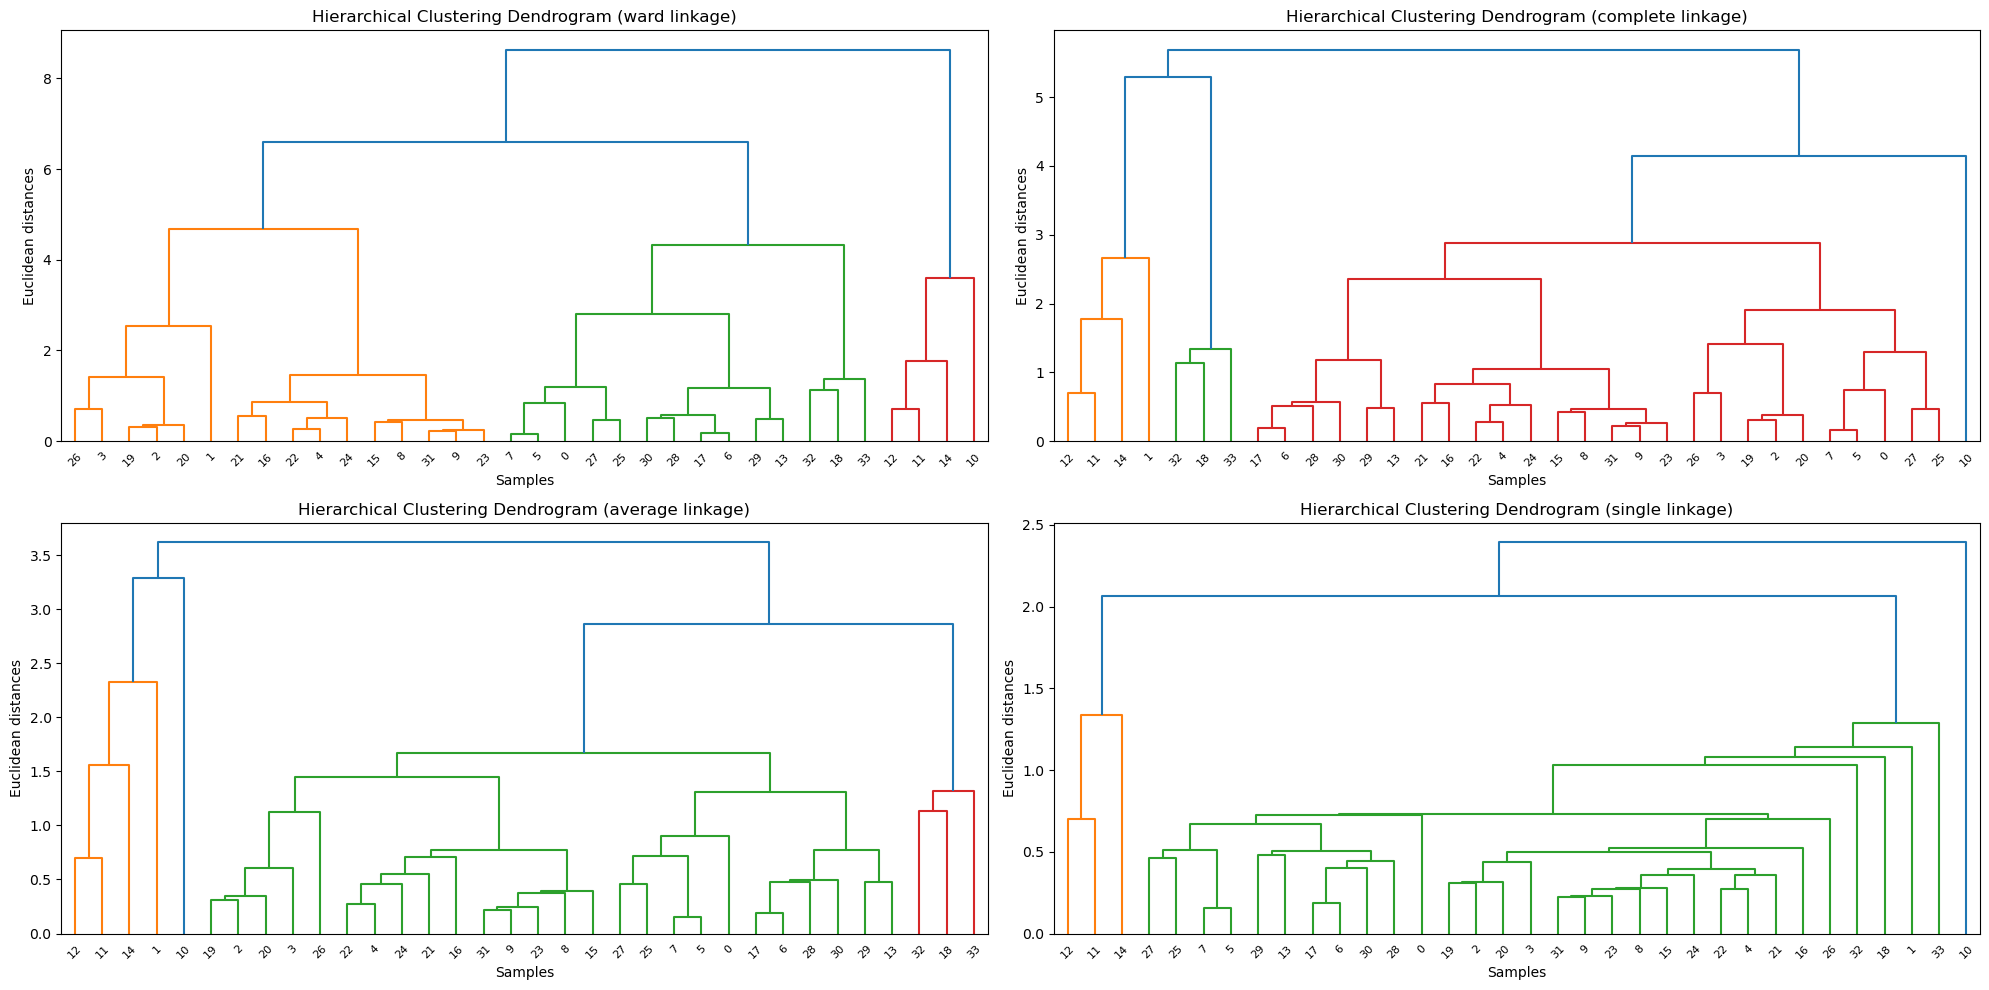

In [122]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage


# Menerapkan PCA
df_selected = pd.DataFrame(data_reduced, columns=['PC1', 'PC2'])

# Definisikan metode linkage yang akan diuji
linkage_methods = ['ward', 'complete', 'average', 'single']

plt.figure(figsize=(20, 10))

for i, method in enumerate(linkage_methods):
    # Agglomerative clustering
    agglomerative = AgglomerativeClustering(n_clusters=5, linkage=method)
    cluster_labels = agglomerative.fit_predict(data_scaled)
    
    # Tambahkan label klaster ke DataFrame
    df_selected['Cluster'] = cluster_labels
    
    # Visualisasi hasil klastering
    plt.subplot(2, 2, i + 1)
    sns.scatterplot(data=df_selected, x='PC1', y='PC2', hue='Cluster', palette='Set2')
    plt.title(f'Agglomerative Clustering ({method} linkage)')
    
plt.tight_layout()
plt.show()

# Visualisasi dendrogram untuk setiap metode linkage
plt.figure(figsize=(20, 10))

for i, method in enumerate(linkage_methods):
    linked = linkage(data_scaled, method=method)
    
    plt.subplot(2, 2, i + 1)
    dendrogram(linked, labels=df_selected.index.tolist(), orientation='top', distance_sort='descending', show_leaf_counts=True)
    plt.title(f'Hierarchical Clustering Dendrogram ({method} linkage)')
    plt.xlabel('Samples')
    plt.ylabel('Euclidean distances')

plt.tight_layout()
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_11256\2400303080.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['Cluster'] = cluster_labels
C:\Users\ASUS\AppData\Local\Temp\ipykernel_11256\2400303080.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['Cluster'] = cluster_labels
C:\Users\ASUS\AppData\Local\Temp\ipykernel_11256\2400303080.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

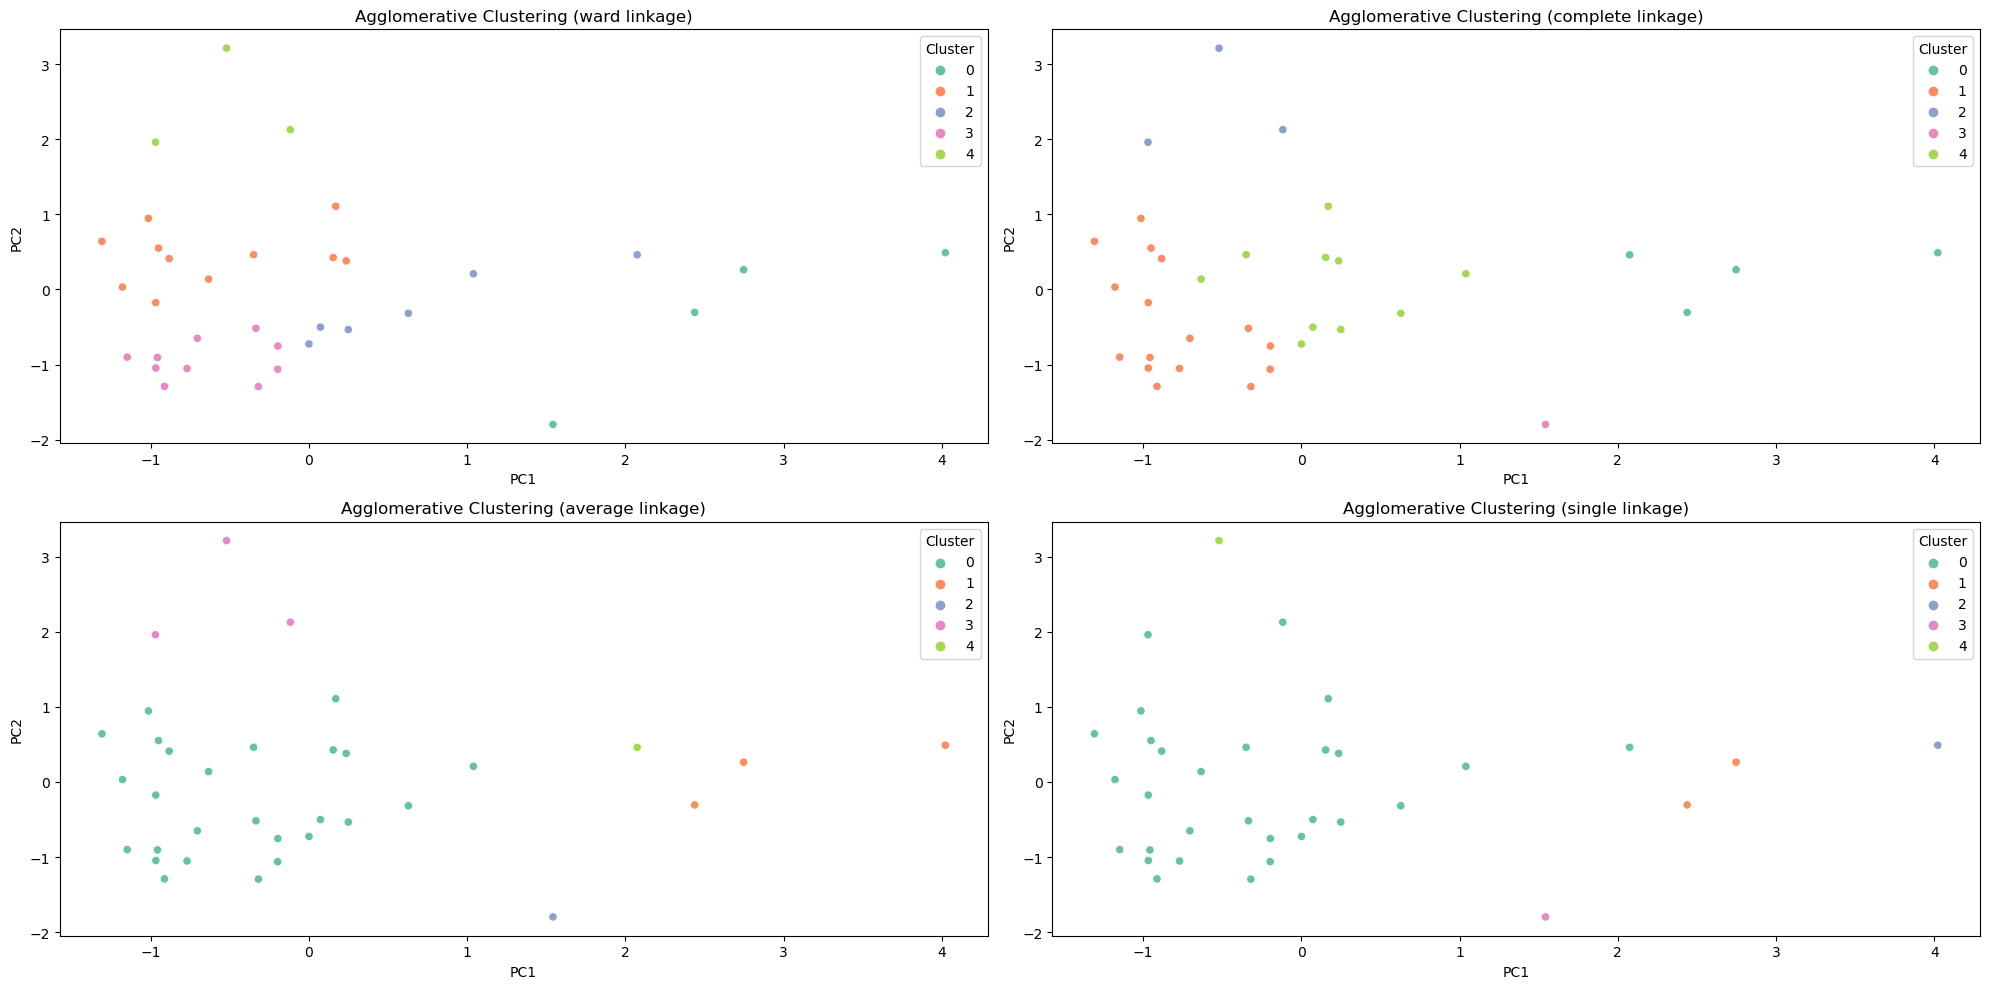

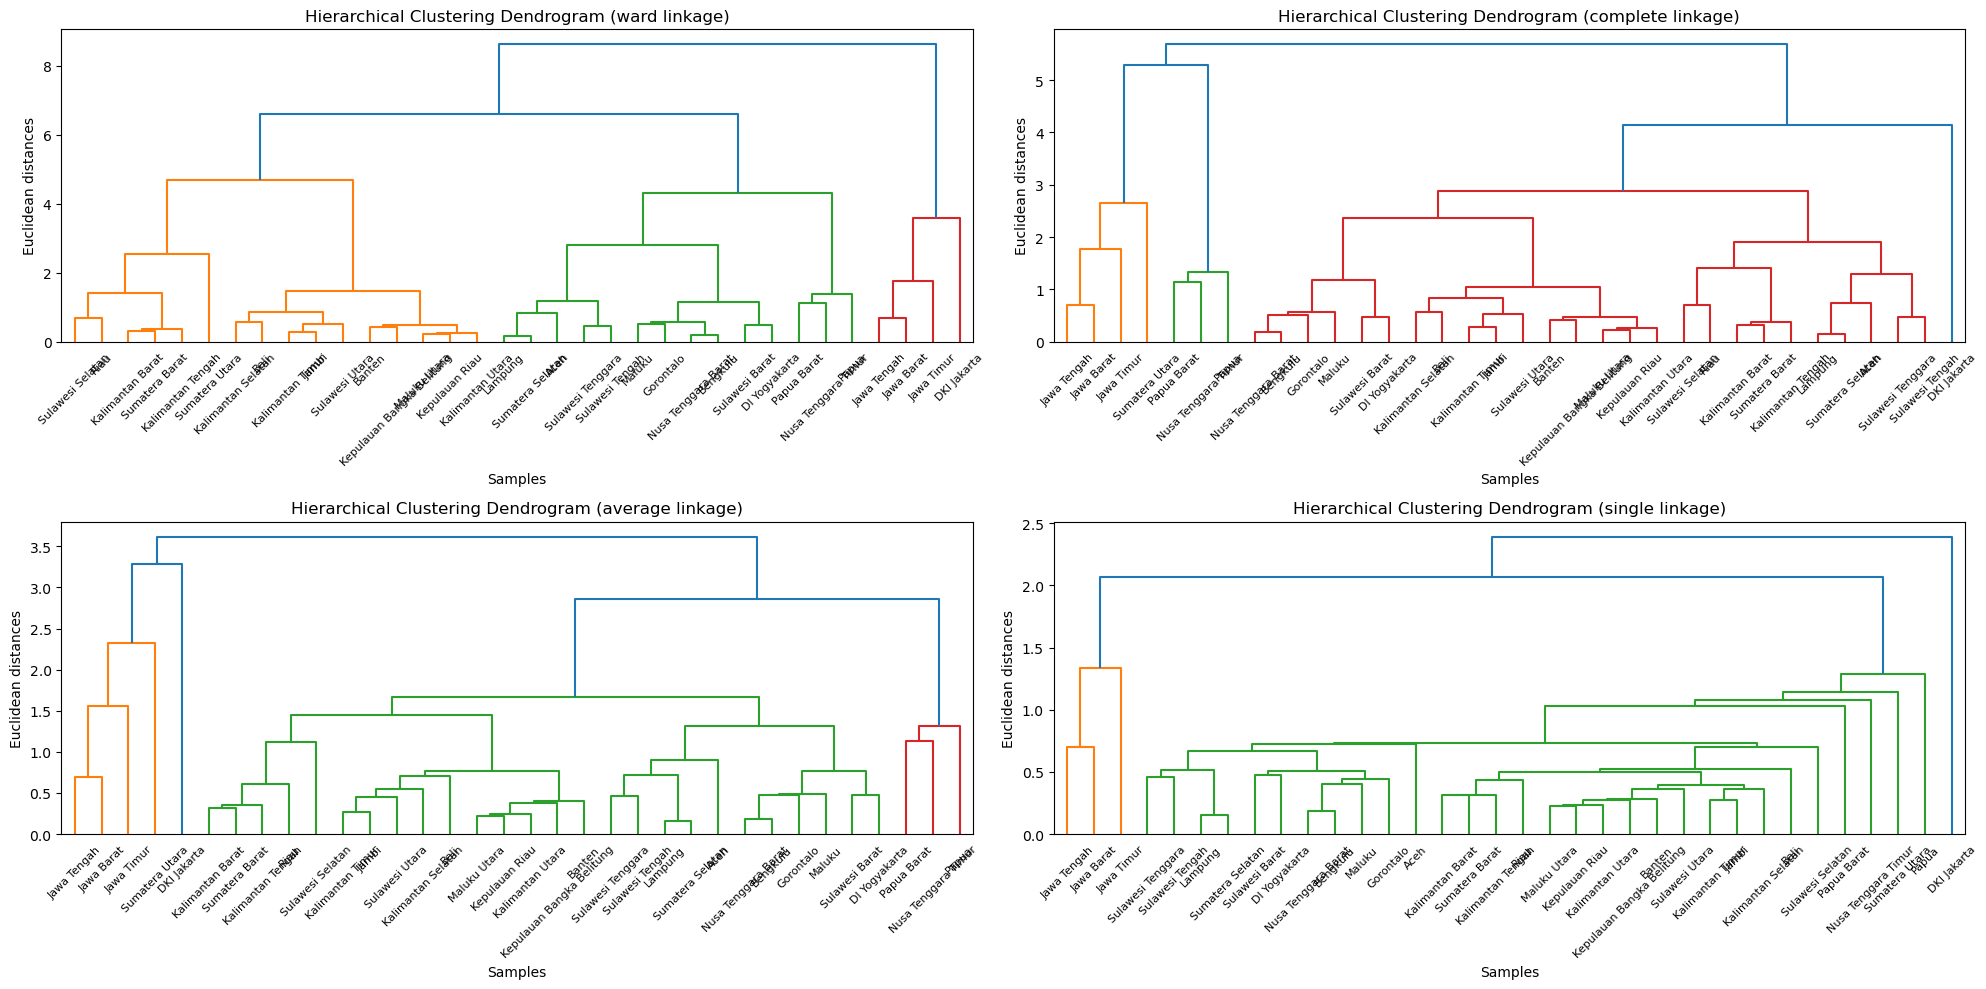

C:\Users\ASUS\AppData\Local\Temp\ipykernel_11256\2400303080.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['Cluster'] = cluster_labels


Karakteristik klaster untuk linkage ward:
                TRANS          ROAD   PROVERTY
Cluster                                       
0        2.066306e+07  27029.750000   8.515000
1        1.838027e+06  12547.363636  13.183636
2        3.894003e+06  25561.000000   6.983333
3        2.016340e+06   8858.000000   6.073000
4        6.212830e+05  19546.666667  22.820000




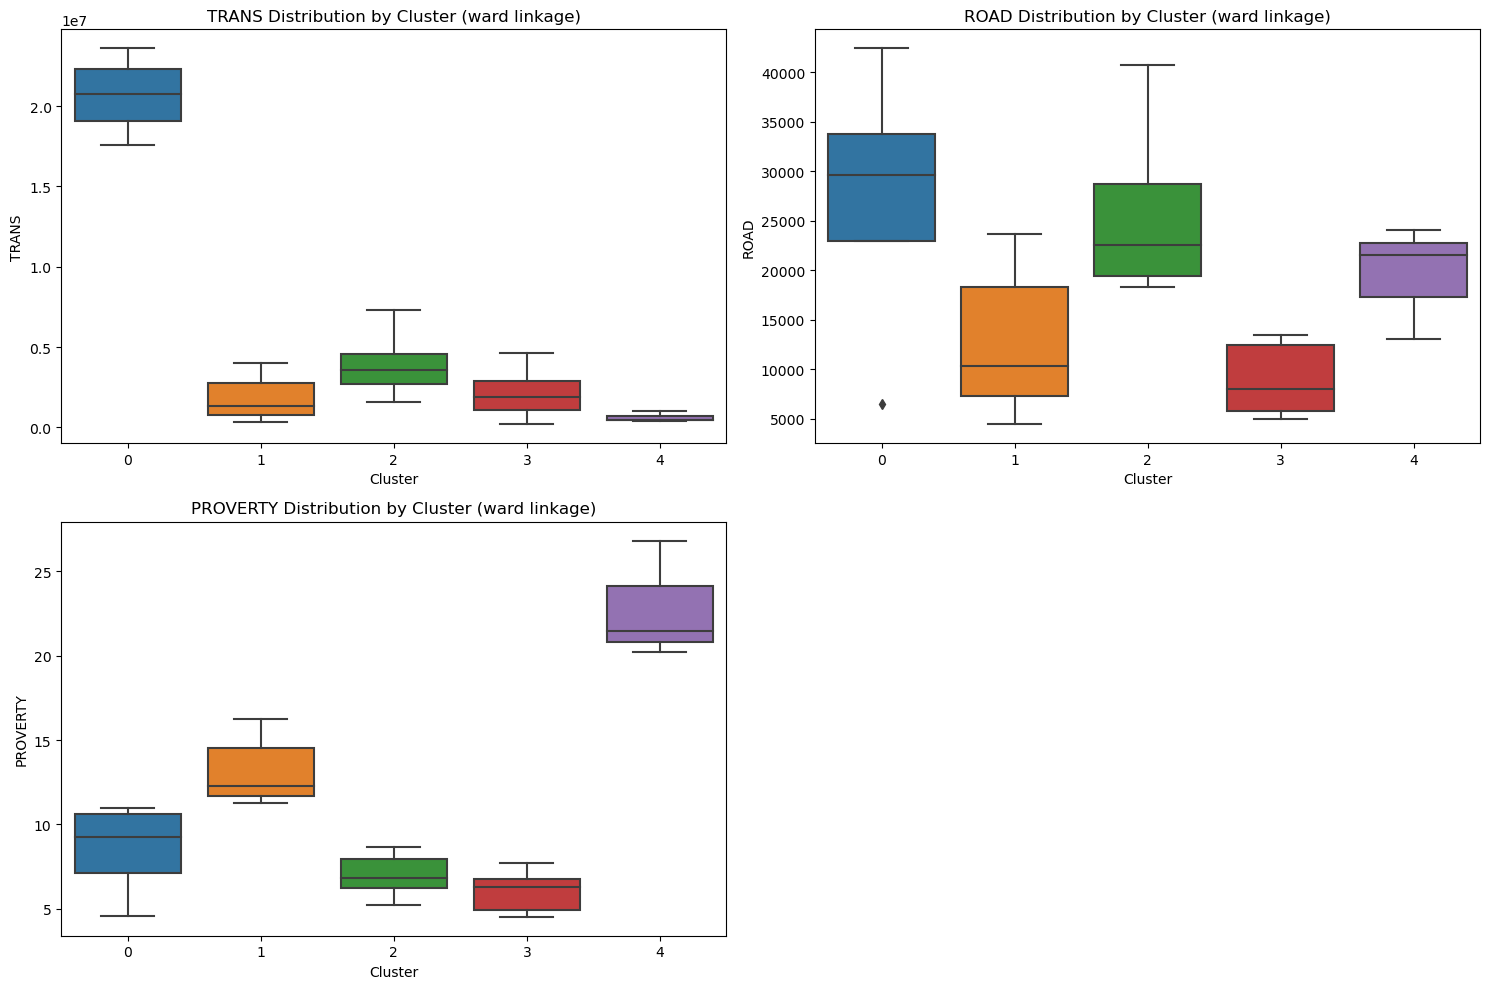

C:\Users\ASUS\AppData\Local\Temp\ipykernel_11256\2400303080.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['Cluster'] = cluster_labels


Karakteristik klaster untuk linkage complete:
                TRANS          ROAD  PROVERTY
Cluster                                      
0        1.701987e+07  35599.750000    9.4450
1        1.727614e+06   8302.187500    9.0025
2        6.212830e+05  19546.666667   22.8200
3        2.191181e+07   6485.000000    4.6100
4        2.876486e+06  20636.700000    9.5280




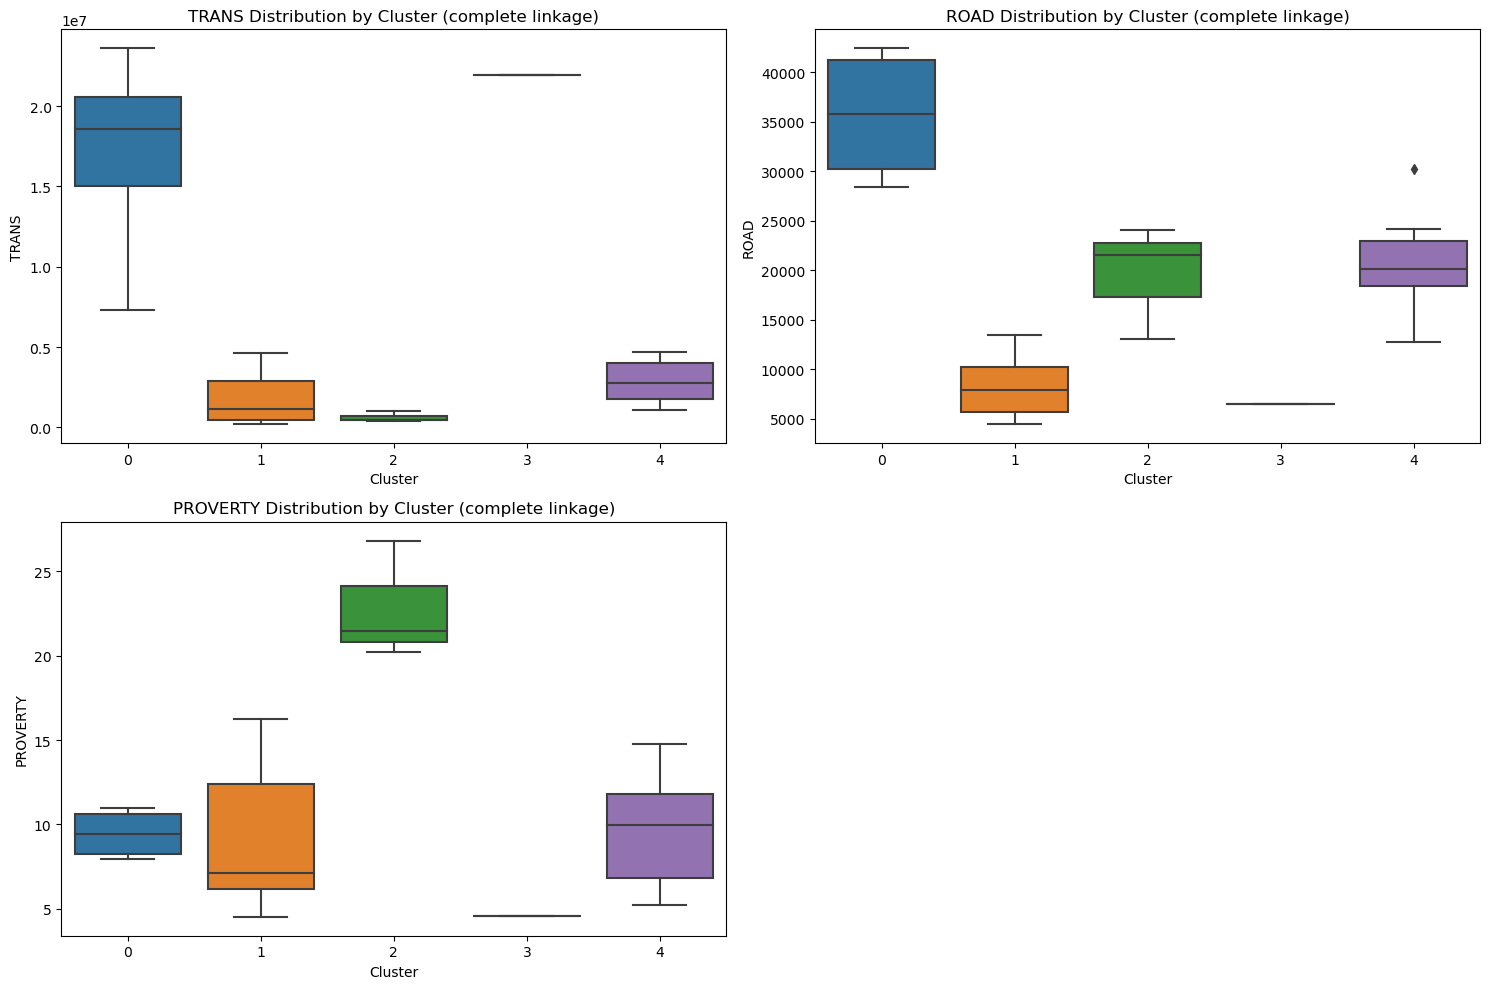

C:\Users\ASUS\AppData\Local\Temp\ipykernel_11256\2400303080.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['Cluster'] = cluster_labels


Karakteristik klaster untuk linkage average:
                TRANS          ROAD   PROVERTY
Cluster                                       
0        2.169488e+06  13046.230769   9.204615
1        2.024681e+07  33878.000000   9.816667
2        2.191181e+07   6485.000000   4.610000
3        6.212830e+05  19546.666667  22.820000
4        7.339034e+06  40765.000000   8.330000




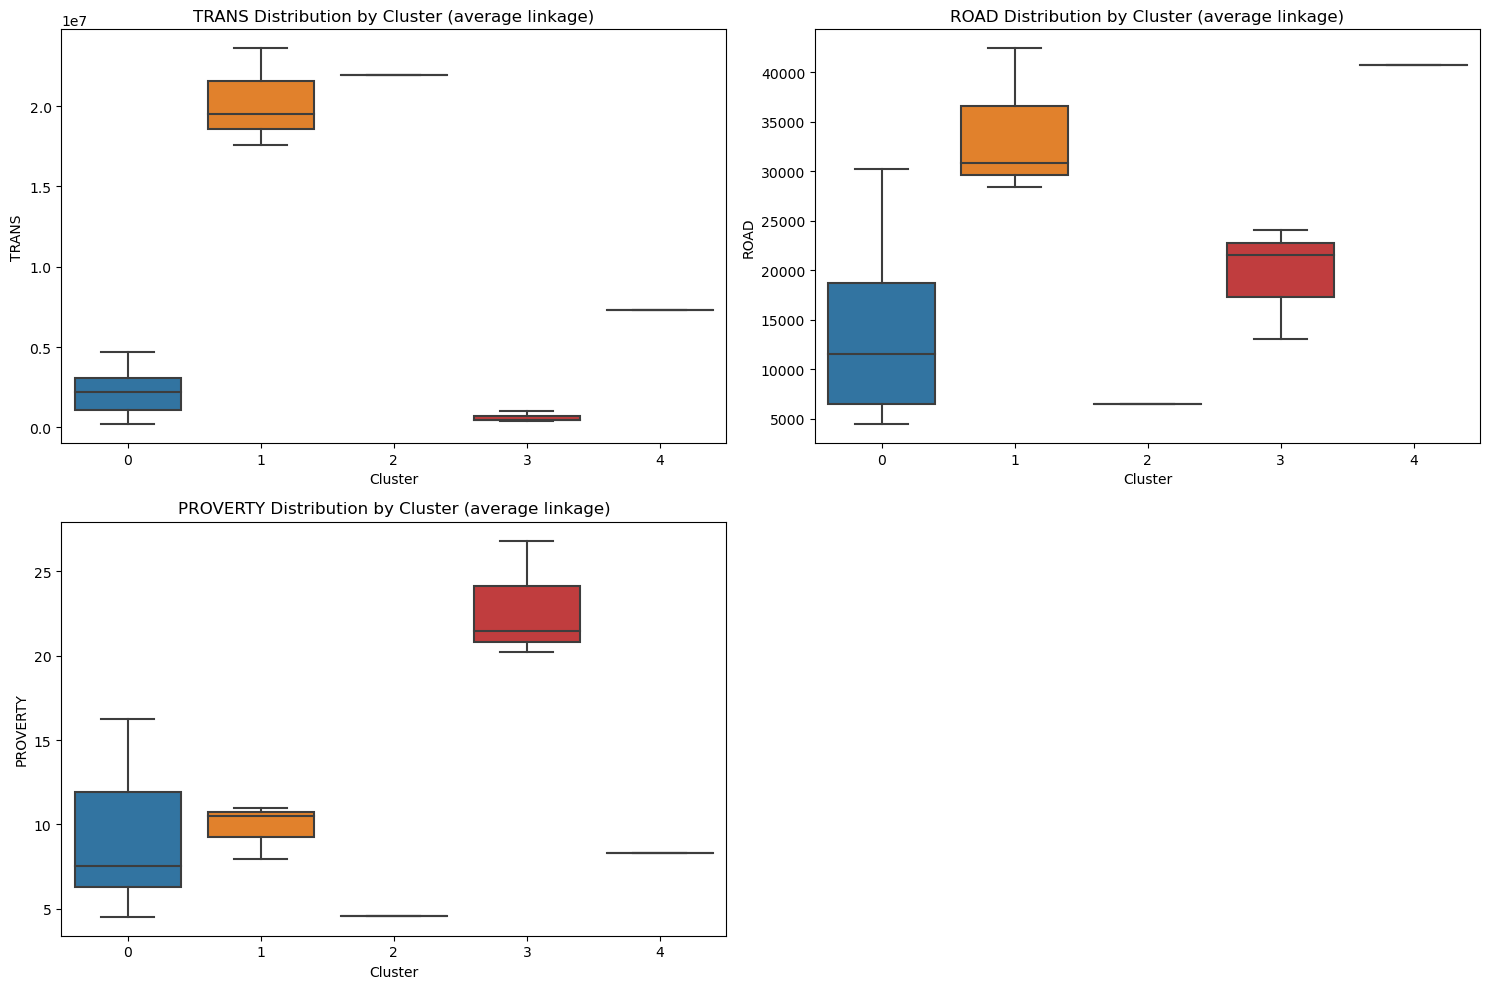

C:\Users\ASUS\AppData\Local\Temp\ipykernel_11256\2400303080.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['Cluster'] = cluster_labels


Karakteristik klaster untuk linkage single:
                TRANS          ROAD   PROVERTY
Cluster                                       
0        2.245391e+06  14380.862069   9.976207
1        1.856751e+07  29606.000000   9.480000
2        2.360542e+07  42422.000000  10.490000
3        2.191181e+07   6485.000000   4.610000
4        4.932370e+05  21562.000000  26.800000




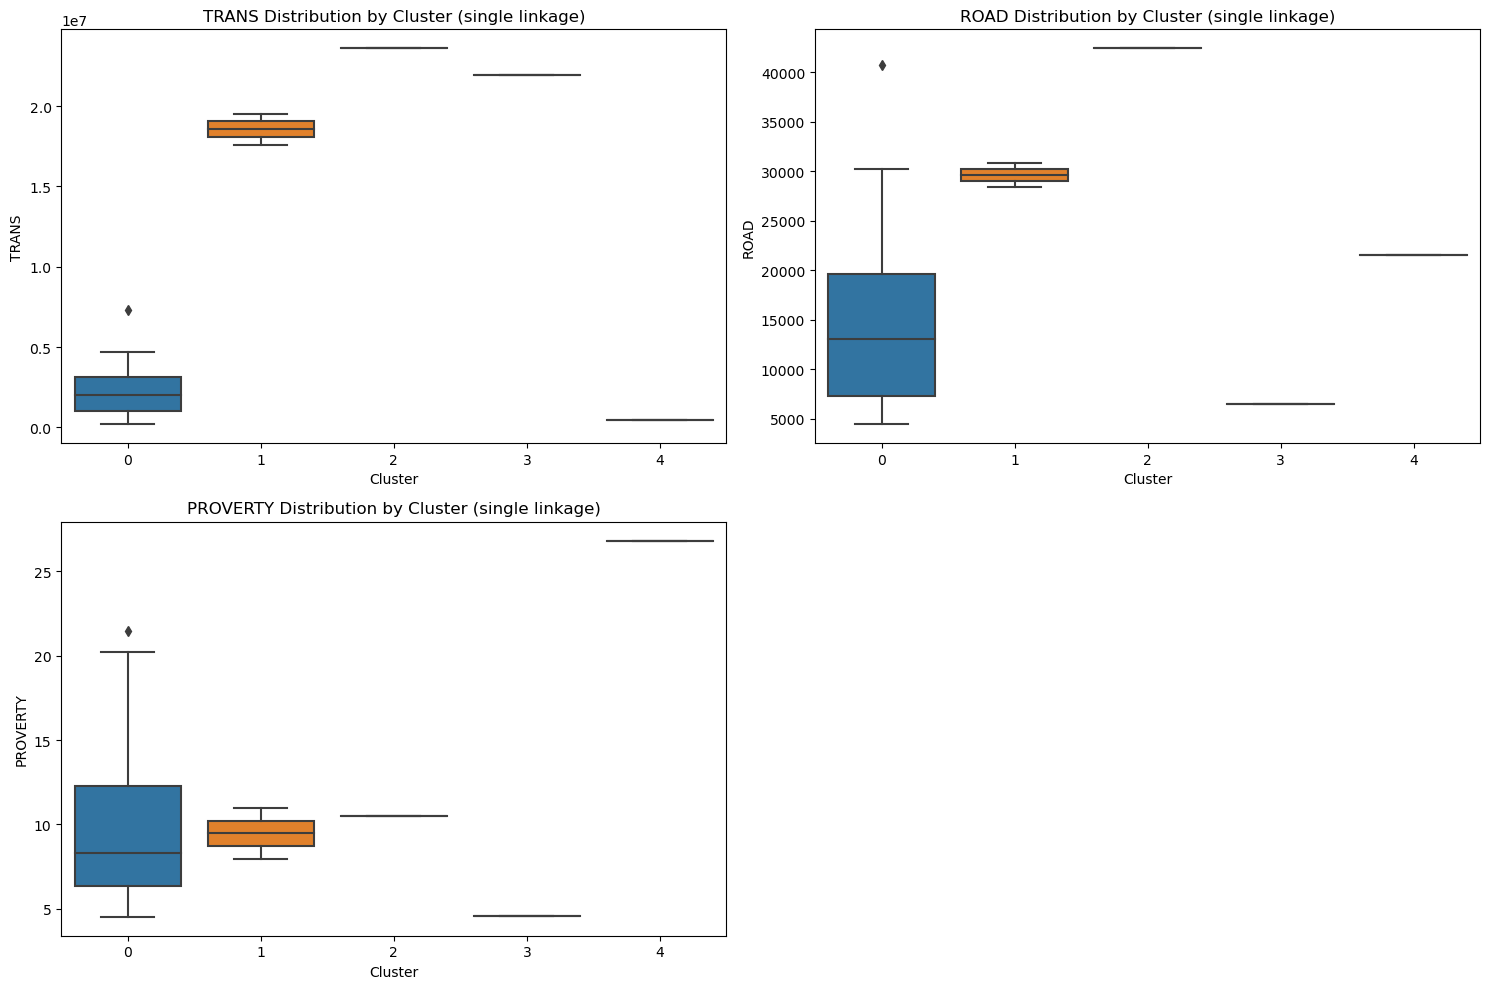

In [132]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage

# Muat data Anda
df = pd.read_excel('Dataset Pertamini.xlsx')
df = df.set_index('Provinsi')
df_selected = df[['TRANS', 'ROAD', 'PROVERTY']]  # Pilih kolom yang relevan

# Standardisasi data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df_selected)

# Menerapkan PCA
pca = PCA(n_components=2)
data_reduced = pca.fit_transform(data_scaled)
df_pca = pd.DataFrame(data_reduced, columns=['PC1', 'PC2'])

# Definisikan metode linkage yang akan diuji
linkage_methods = ['ward', 'complete', 'average', 'single']

plt.figure(figsize=(20, 10))

for i, method in enumerate(linkage_methods):
    # Agglomerative clustering
    agglomerative = AgglomerativeClustering(n_clusters=5, linkage=method)
    cluster_labels = agglomerative.fit_predict(data_scaled)
    
    # Tambahkan label klaster ke DataFrame PCA dan DataFrame asli
    df_pca['Cluster'] = cluster_labels
    df_selected['Cluster'] = cluster_labels
    
    # Visualisasi hasil klastering
    plt.subplot(2, 2, i + 1)
    sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='Cluster', palette='Set2')
    plt.title(f'Agglomerative Clustering ({method} linkage)')
    
plt.tight_layout()
plt.show()

# Visualisasi dendrogram untuk setiap metode linkage
plt.figure(figsize=(20, 10))

for i, method in enumerate(linkage_methods):
    linked = linkage(data_scaled, method=method)
    
    plt.subplot(2, 2, i + 1)
    dendrogram(linked, labels=df_selected.index.tolist(), orientation='top', distance_sort='descending', show_leaf_counts=True)
    plt.title(f'Hierarchical Clustering Dendrogram ({method} linkage)')
    plt.xlabel('Samples')
    plt.ylabel('Euclidean distances')

plt.tight_layout()
plt.show()

# Analisis karakteristik klaster
for method in linkage_methods:
    agglomerative = AgglomerativeClustering(n_clusters=5, linkage=method)
    cluster_labels = agglomerative.fit_predict(data_scaled)
    df_selected['Cluster'] = cluster_labels
    
    print(f'Karakteristik klaster untuk linkage {method}:')
    print(df_selected.groupby('Cluster').mean())  # Tampilkan rata-rata setiap fitur untuk setiap klaster
    print('\n')
    
    # Visualisasi distribusi fitur berdasarkan klaster
    plt.figure(figsize=(15, 10))
    for i, column in enumerate(df_selected.columns[:-1]):  # Exclude the 'Cluster' column
        plt.subplot(2, 2, i + 1)
        sns.boxplot(x='Cluster', y=column, data=df_selected)
        plt.title(f'{column} Distribution by Cluster ({method} linkage)')
    
    plt.tight_layout()
    plt.show()


In [133]:
df_selected

,TRANS,ROAD,PROVERTY,Cluster
Provinsi,,,,
Aceh,2426809,23660,14.75,0
Sumatera Utara,7339034,40765,8.33,0
Sumatera Barat,2656691,20999,6.04,0
Riau,4230607,24206,6.84,0
Jambi,2572804,13202,7.70,0
Sumatera Selatan,4019095,19587,11.95,0
Bengkulu,1127170,9228,14.34,0
Lampung,3921375,20765,11.44,0
Kepulauan Bangka Belitung,1160091,5891,4.61,0


C:\Users\ASUS\AppData\Local\Temp\ipykernel_11256\1521310278.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['Cluster'] = cluster_labels


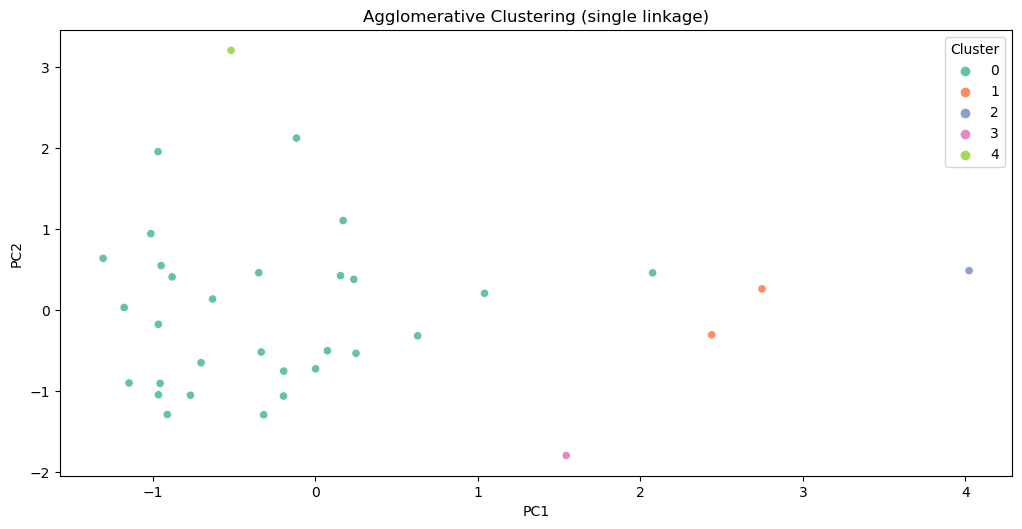

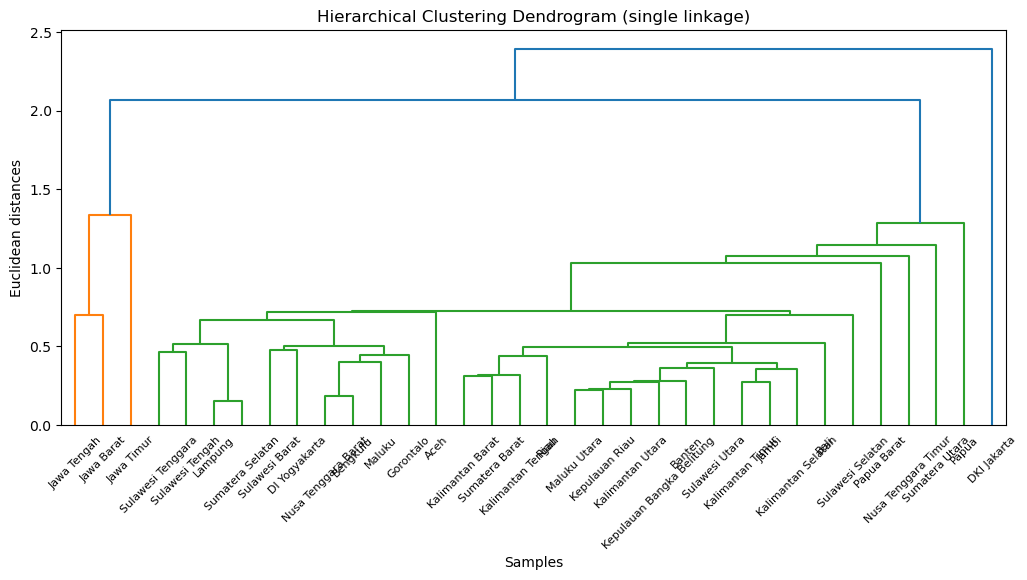

C:\Users\ASUS\AppData\Local\Temp\ipykernel_11256\1521310278.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['Cluster'] = cluster_labels


Karakteristik klaster untuk linkage single:
                TRANS          ROAD   PROVERTY
Cluster                                       
0        2.245391e+06  14380.862069   9.976207
1        1.856751e+07  29606.000000   9.480000
2        2.360542e+07  42422.000000  10.490000
3        2.191181e+07   6485.000000   4.610000
4        4.932370e+05  21562.000000  26.800000




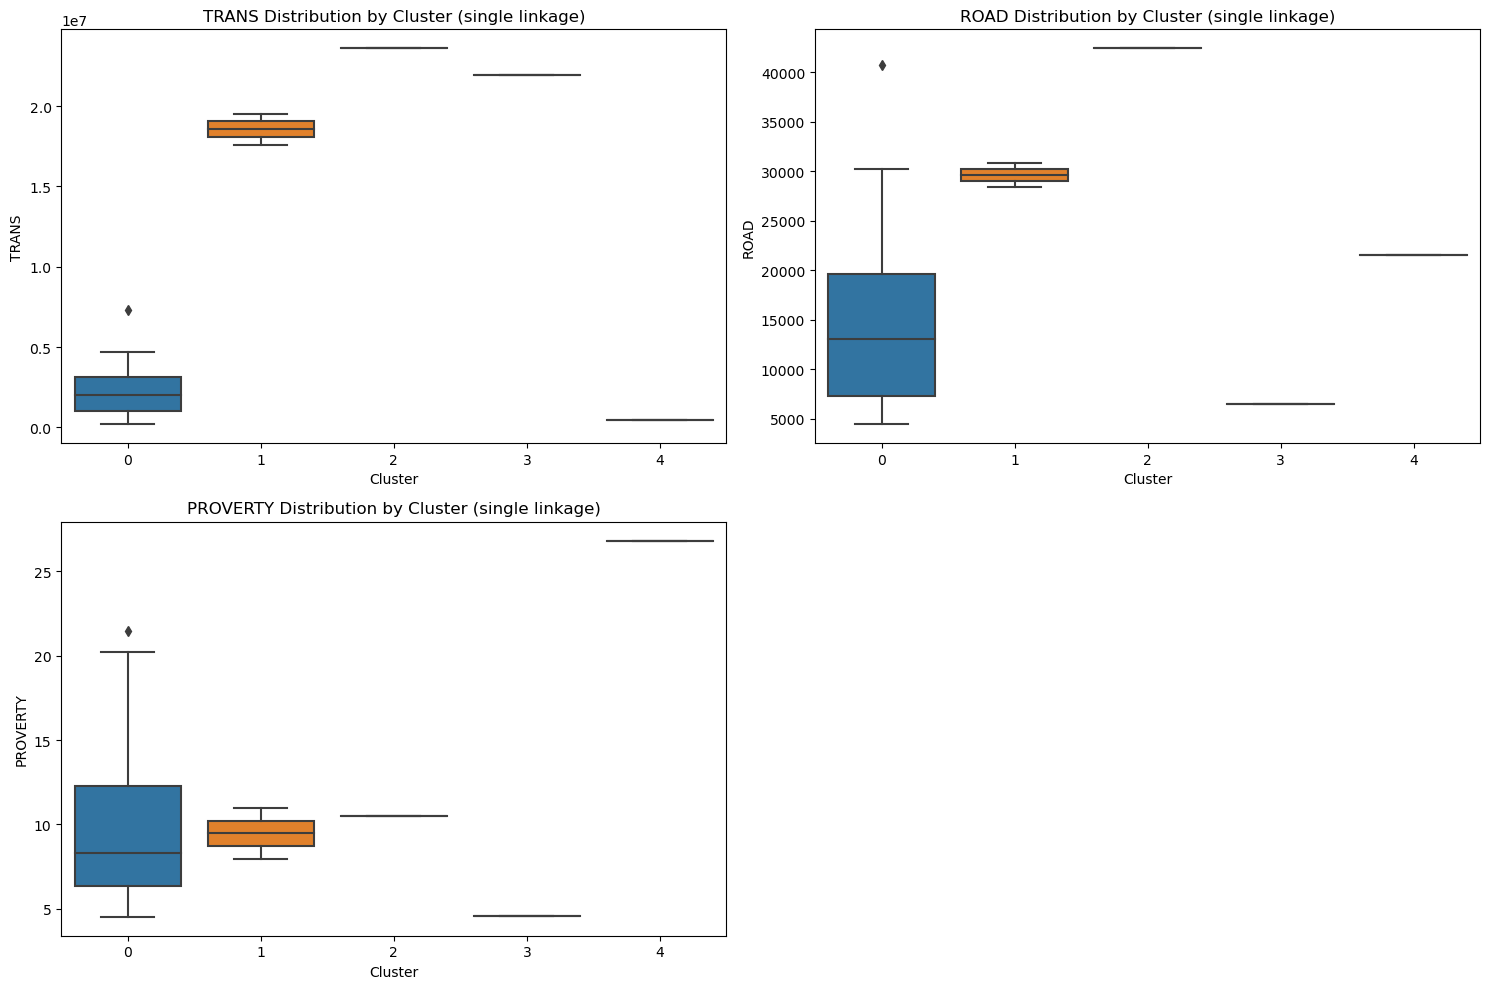

In [134]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage

# Muat data Anda
df = pd.read_excel('Dataset Pertamini.xlsx')
df = df.set_index('Provinsi')
df_selected = df[['TRANS', 'ROAD', 'PROVERTY']]  # Pilih kolom yang relevan

# Standardisasi data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df_selected)

# Menerapkan PCA
pca = PCA(n_components=2)
data_reduced = pca.fit_transform(data_scaled)
df_pca = pd.DataFrame(data_reduced, columns=['PC1', 'PC2'])

# Definisikan metode linkage yang akan diuji
linkage_methods = ['single']

plt.figure(figsize=(20, 10))

for i, method in enumerate(linkage_methods):
    # Agglomerative clustering
    agglomerative = AgglomerativeClustering(n_clusters=5, linkage=method)
    cluster_labels = agglomerative.fit_predict(data_scaled)
    
    # Tambahkan label klaster ke DataFrame PCA dan DataFrame asli
    df_pca['Cluster'] = cluster_labels
    df_selected['Cluster'] = cluster_labels
    
    # Visualisasi hasil klastering
    plt.subplot(2, 2, i + 1)
    sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='Cluster', palette='Set2')
    plt.title(f'Agglomerative Clustering ({method} linkage)')
    
plt.tight_layout()
plt.show()

# Visualisasi dendrogram untuk setiap metode linkage
plt.figure(figsize=(20, 10))

for i, method in enumerate(linkage_methods):
    linked = linkage(data_scaled, method=method)
    
    plt.subplot(2, 2, i + 1)
    dendrogram(linked, labels=df_selected.index.tolist(), orientation='top', distance_sort='descending', show_leaf_counts=True)
    plt.title(f'Hierarchical Clustering Dendrogram ({method} linkage)')
    plt.xlabel('Samples')
    plt.ylabel('Euclidean distances')

plt.tight_layout()
plt.show()

# Analisis karakteristik klaster
for method in linkage_methods:
    agglomerative = AgglomerativeClustering(n_clusters=5, linkage=method)
    cluster_labels = agglomerative.fit_predict(data_scaled)
    df_selected['Cluster'] = cluster_labels
    
    print(f'Karakteristik klaster untuk linkage {method}:')
    print(df_selected.groupby('Cluster').mean())  # Tampilkan rata-rata setiap fitur untuk setiap klaster
    print('\n')
    
    # Visualisasi distribusi fitur berdasarkan klaster
    plt.figure(figsize=(15, 10))
    for i, column in enumerate(df_selected.columns[:-1]):  # Exclude the 'Cluster' column
        plt.subplot(2, 2, i + 1)
        sns.boxplot(x='Cluster', y=column, data=df_selected)
        plt.title(f'{column} Distribution by Cluster ({method} linkage)')
    
    plt.tight_layout()
    plt.show()


In [135]:
df_selected

,TRANS,ROAD,PROVERTY,Cluster
Provinsi,,,,
Aceh,2426809,23660,14.75,0
Sumatera Utara,7339034,40765,8.33,0
Sumatera Barat,2656691,20999,6.04,0
Riau,4230607,24206,6.84,0
Jambi,2572804,13202,7.70,0
Sumatera Selatan,4019095,19587,11.95,0
Bengkulu,1127170,9228,14.34,0
Lampung,3921375,20765,11.44,0
Kepulauan Bangka Belitung,1160091,5891,4.61,0


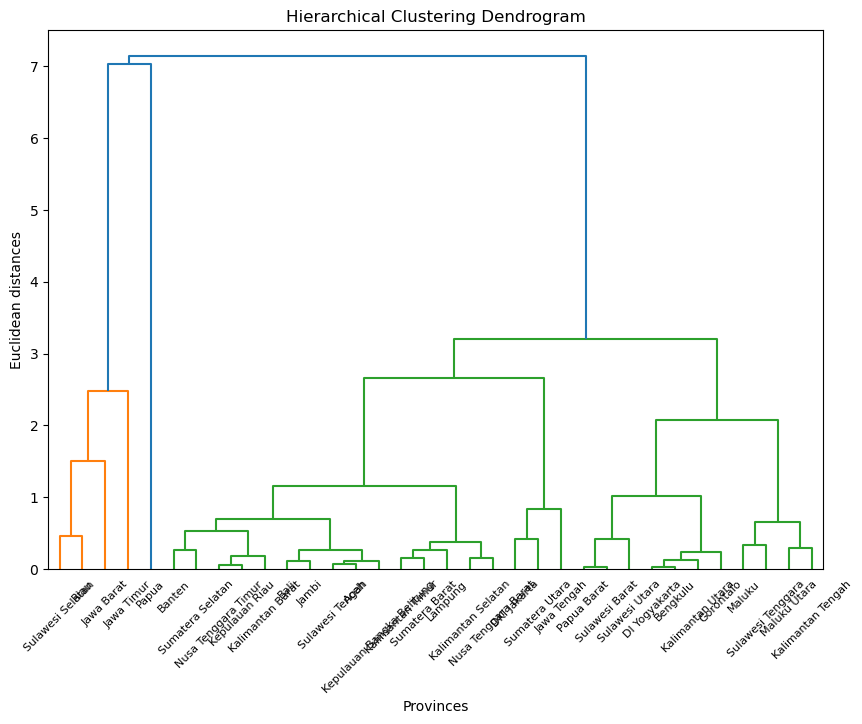

In [65]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Muat data Anda
df = pd.read_excel('Dataset Pertamini.xlsx')  # Pastikan Anda mengganti dengan path file yang benar
df = df.set_index('Provinsi')
df_selected = df[['PREMIUM', 'BIOSOLAR']]  # Pilih kolom yang relevan

# Standardisasi data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df_selected)

# Hierarchical clustering
linked = linkage(data_scaled, method='ward')

# Dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked, labels=df_selected.index.tolist(), orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Provinces')
plt.ylabel('Euclidean distances')
plt.show()


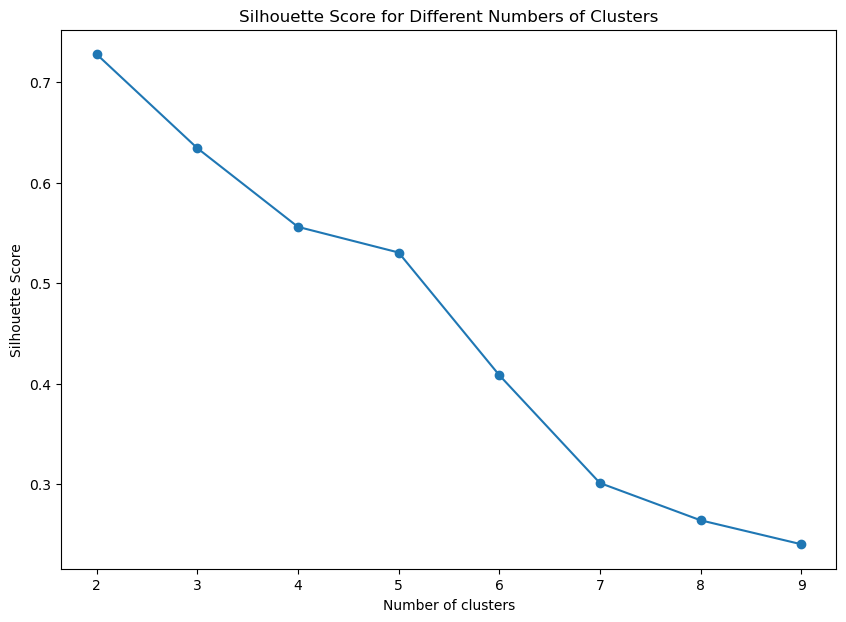

Optimal number of clusters: 2


In [74]:
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

# Tentukan rentang kluster yang ingin diuji
range_n_clusters = list(range(2, 10))

# Variabel untuk menyimpan skor silhouette
silhouette_avg_scores = []

for n_clusters in range_n_clusters:
    # Agglomerative clustering
    agglomerative = AgglomerativeClustering(n_clusters=n_clusters, linkage='single')
    cluster_labels = agglomerative.fit_predict(data_scaled)
    
    # Silhouette score
    silhouette_avg = silhouette_score(data_scaled, cluster_labels)
    silhouette_avg_scores.append(silhouette_avg)

# Plot silhouette scores
plt.figure(figsize=(10, 7))
plt.plot(range_n_clusters, silhouette_avg_scores, marker='o')
plt.title('Silhouette Score for Different Numbers of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

# Cetak jumlah kluster dengan skor silhouette tertinggi
optimal_clusters = range_n_clusters[np.argmax(silhouette_avg_scores)]
print(f'Optimal number of clusters: {optimal_clusters}')


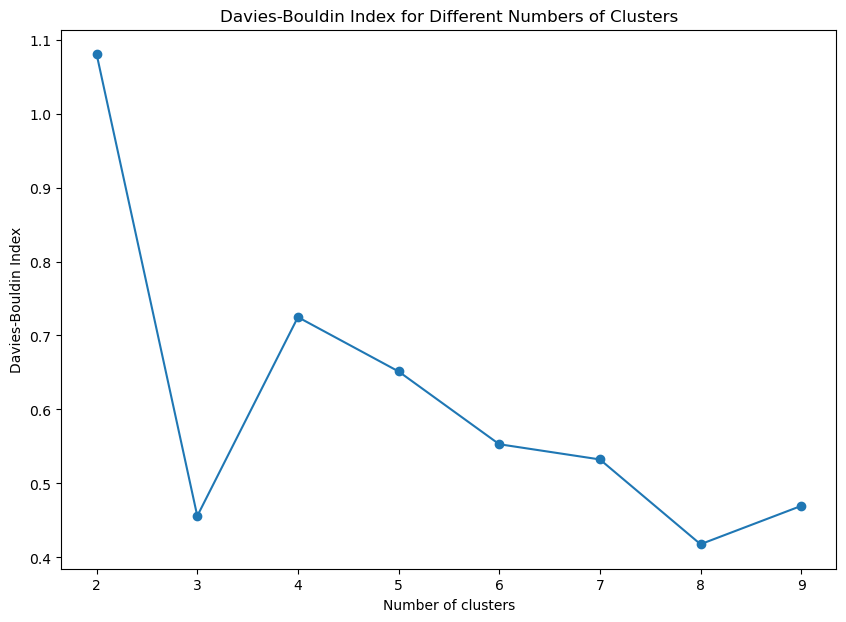

Optimal number of clusters: 8


In [67]:
from sklearn.metrics import davies_bouldin_score

# Variabel untuk menyimpan skor Davies-Bouldin
db_scores = []

for n_clusters in range_n_clusters:
    # Agglomerative clustering
    agglomerative = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
    cluster_labels = agglomerative.fit_predict(data_scaled)
    
    # Davies-Bouldin score
    db_index = davies_bouldin_score(data_scaled, cluster_labels)
    db_scores.append(db_index)

# Plot Davies-Bouldin scores
plt.figure(figsize=(10, 7))
plt.plot(range_n_clusters, db_scores, marker='o')
plt.title('Davies-Bouldin Index for Different Numbers of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Davies-Bouldin Index')
plt.show()

# Cetak jumlah kluster dengan skor Davies-Bouldin terendah
optimal_clusters_db = range_n_clusters[np.argmin(db_scores)]
print(f'Optimal number of clusters: {optimal_clusters_db}')


In [64]:
df_selected['Cluster']

Provinsi
Aceh                         0
Sumatera Utara               0
Sumatera Barat               0
Riau                         1
Jambi                        0
Sumatera Selatan             0
Bengkulu                     0
Lampung                      0
Kepulauan Bangka Belitung    0
Kepulauan Riau               0
DKI Jakarta                  0
Jawa Barat                   1
Jawa Tengah                  0
DI Yogyakarta                0
Jawa Timur                   1
Banten                       0
Bali                         0
Nusa Tenggara Barat          0
Nusa Tenggara Timur          0
Kalimantan Barat             0
Kalimantan Tengah            0
Kalimantan Selatan           0
Kalimantan Timur             0
Kalimantan Utara             0
Sulawesi Utara               0
Sulawesi Tengah              0
Sulawesi Selatan             1
Sulawesi Tenggara            0
Gorontalo                    0
Sulawesi Barat               0
Maluku                       0
Maluku Utara                 0

Data setelah PCA:
[[-0.78729355 -0.16444164]
 [ 0.79717385  0.03690083]
 [-0.18342782 -0.38742837]
 [ 0.66889635 -1.57941119]
 [-0.5603419  -0.10218845]
 [-0.36842354 -0.06494913]
 [-1.07909413  0.22036887]
 [-0.04076555 -0.33568516]
 [-0.73632751 -0.06422269]
 [-0.52706063 -0.35094509]
 [ 0.88411532 -0.37321336]
 [ 2.0425189  -0.96827575]
 [ 0.48593781  0.46370872]
 [-1.0668285   0.19953818]
 [ 3.21359335 -1.97816458]
 [-0.10995917 -0.041197  ]
 [-0.59065597 -0.21572928]
 [-0.32693872 -0.64259699]
 [-0.50080223 -0.30321492]
 [-0.36057009 -0.28126641]
 [-0.21765124  0.76552228]
 [-0.18217227 -0.60979372]
 [-0.3096497  -0.46587471]
 [-0.95986125  0.22066273]
 [-0.29311703  0.37849905]
 [-0.71394438 -0.15252532]
 [ 1.13113586 -1.63353307]
 [ 0.09167796  0.91094169]
 [-0.93020359  0.37643518]
 [-0.62641036  0.54743215]
 [ 0.07632566  1.24938506]
 [-0.42828591  0.96566737]
 [-0.60906544  0.52555469]
 [ 3.11747544  3.85404005]]


d:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1972: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(


Algorithm: MiniBatch
KMeans
Silhouette Score: 0.7276
Davies-Bouldin Index: 0.1755

Algorithm: Affinity
Propagation
Silhouette Score: 0.4456
Davies-Bouldin Index: 0.3937

Algorithm: MeanShift
Silhouette Score: 0.4824
Davies-Bouldin Index: 0.4298



d:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Algorithm: Spectral
Clustering
Silhouette Score: 0.5845
Davies-Bouldin Index: 0.6697

Algorithm: Ward
Silhouette Score: 0.6222
Davies-Bouldin Index: 1.0802

Algorithm: Agglomerative
Clustering
Silhouette Score: 0.7276
Davies-Bouldin Index: 0.1755

Algorithm: DBSCAN
Silhouette Score: 0.1770
Davies-Bouldin Index: 1.8953

Algorithm: OPTICS
Silhouette Score: 0.2496
Davies-Bouldin Index: 1.1524

Algorithm: BIRCH
Silhouette Score: 0.7276
Davies-Bouldin Index: 0.1755



d:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Algorithm: Gaussian
Mixture
Silhouette Score: 0.2217
Davies-Bouldin Index: 1.5462



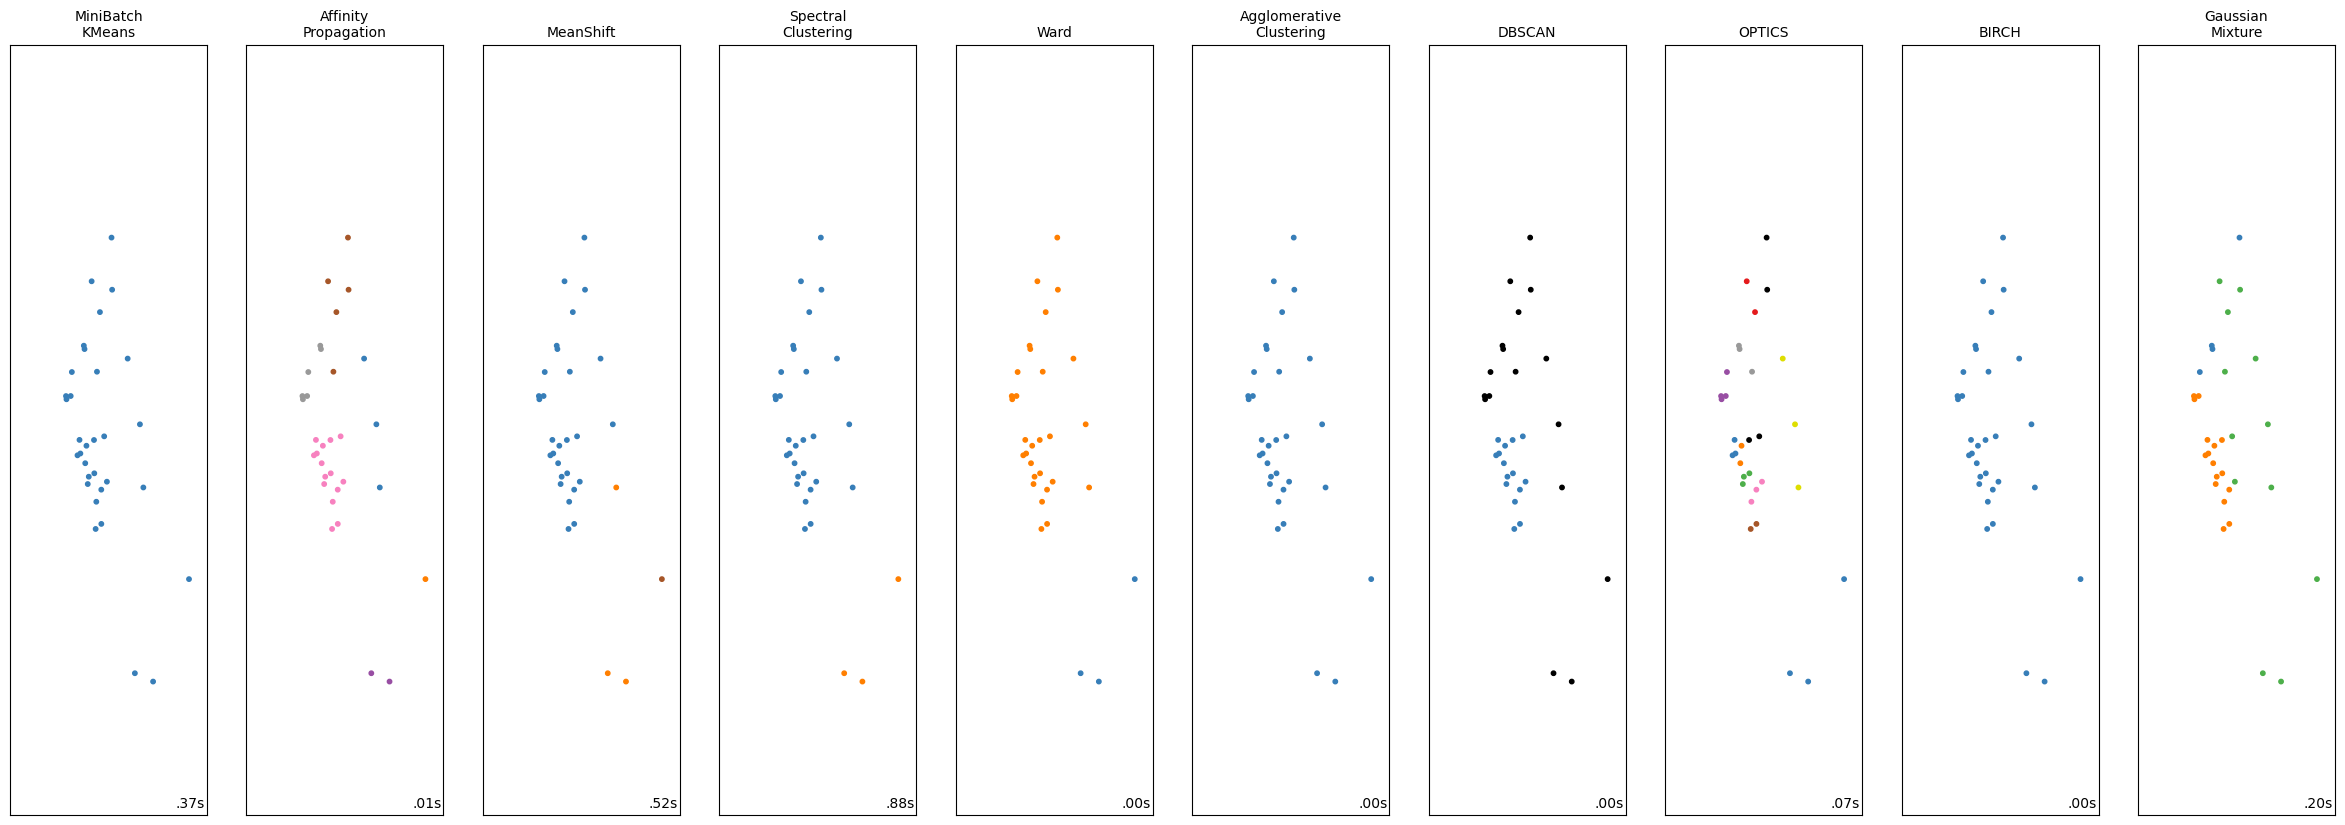

In [58]:
import numpy as np
import pandas as pd
from itertools import cycle, islice
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.neighbors import kneighbors_graph
from sklearn import cluster, mixture
import matplotlib.pyplot as plt
import warnings
import time

# Muat data Anda
df = pd.read_excel('Dataset Pertamini.xlsx')  # Pastikan Anda mengganti dengan path file yang benar
df = df.set_index('Provinsi')
df_selected = df[['PREMIUM', 'BIOSOLAR']]

# Standardisasi data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df_selected)

# Menerapkan PCA (opsional, jika data dimensionalitas tinggi)
n_components = 2  # Pilih jumlah komponen utama berdasarkan cumulative variance
pca = PCA(n_components=n_components)
data_reduced = pca.fit_transform(data_scaled)

print("Data setelah PCA:")
print(data_reduced)

# Algoritma clustering
clustering_algorithms = [
    ("MiniBatch\nKMeans", cluster.MiniBatchKMeans(n_clusters=2, random_state=21)),
    ("Affinity\nPropagation", cluster.AffinityPropagation(random_state=21)),
    ("MeanShift", cluster.MeanShift()),
    ("Spectral\nClustering", cluster.SpectralClustering(n_clusters=2, random_state=21)),
    ("Ward", cluster.AgglomerativeClustering(n_clusters=2, linkage="ward")),
    ("Agglomerative\nClustering", cluster.AgglomerativeClustering(linkage="average", n_clusters=2)),
    ("DBSCAN", cluster.DBSCAN(eps=0.3)),
    ("OPTICS", cluster.OPTICS(min_samples=2)),
    ("BIRCH", cluster.Birch(n_clusters=2)),
    ("Gaussian\nMixture", mixture.GaussianMixture(n_components=3, random_state=21))
]

plot_num = 1
plt.figure(figsize=(len(clustering_algorithms) * 3, 10))

# Menghitung dan mencetak silhouette score dan Davies-Bouldin Index untuk setiap algoritma
for name, algorithm in clustering_algorithms:
    t0 = time.time()
    
    with warnings.catch_warnings():
        warnings.filterwarnings(
            "ignore",
            message="the number of connected components of the connectivity matrix is [0-9]{1,2} > 1. Completing it to avoid stopping the tree early.",
            category=UserWarning,
        )
        warnings.filterwarnings(
            "ignore",
            message="Graph is not fully connected, spectral embedding may not work as expected.",
            category=UserWarning,
        )
        algorithm.fit(data_reduced)
    
    t1 = time.time()
    if hasattr(algorithm, "labels_"):
        y_pred = algorithm.labels_.astype(int)
    else:
        y_pred = algorithm.predict(data_reduced)

    n_clusters = len(np.unique(y_pred))
    if n_clusters > 1 and n_clusters < len(data_reduced):
        silhouette = silhouette_score(data_reduced, y_pred)
        davies_bouldin = davies_bouldin_score(data_reduced, y_pred)
        print(f'Algorithm: {name}')
        print(f'Silhouette Score: {silhouette:.4f}')
        print(f'Davies-Bouldin Index: {davies_bouldin:.4f}\n')
    else:
        print(f'Algorithm: {name} failed to identify more than one cluster.')

    plt.subplot(1, len(clustering_algorithms), plot_num)
    plt.title(name, size=10)

    colors = np.array(
        list(
            islice(
                cycle(
                    [
                        "#377eb8",
                        "#ff7f00",
                        "#4daf4a",
                        "#f781bf",
                        "#a65628",
                        "#984ea3",
                        "#999999",
                        "#e41a1c",
                        "#dede00",
                    ]
                ),
                int(max(y_pred) + 1),
            )
        )
    )
    # add black color for outliers (if any)
    colors = np.append(colors, ["#000000"])
    plt.scatter(data_reduced[:, 0], data_reduced[:, 1], s=10, color=colors[y_pred])

    plt.xlim(-2.5, 2.5)
    plt.ylim(-2.5, 2.5)
    plt.xticks(())
    plt.yticks(())
    plt.text(
        0.99,
        0.01,
        ("%.2fs" % (t1 - t0)).lstrip("0"),
        transform=plt.gca().transAxes,
        size=10,
        horizontalalignment="right",
    )
    plot_num += 1

plt.show()


In [59]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

# Muat data Anda
df = pd.read_excel('Dataset Pertamini.xlsx')  # Pastikan Anda mengganti dengan path file yang benar
df = df.set_index('Provinsi')
df_selected = df[['PREMIUM', 'BIOSOLAR']]

# Standardisasi data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df_selected)

# Membuat DataFrame baru dari data yang telah distandardisasi
data_scaled_df = pd.DataFrame(data_scaled, columns=df_selected.columns)

# Menambahkan kolom konstanta untuk statsmodels
data_scaled_df = sm.add_constant(data_scaled_df)

# Menghitung VIF untuk setiap fitur
vif_data = pd.DataFrame()
vif_data["Feature"] = data_scaled_df.columns
vif_data["VIF"] = [variance_inflation_factor(data_scaled_df.values, i) for i in range(data_scaled_df.shape[1])]

# Menghapus kolom konstanta dari hasil
vif_data = vif_data[vif_data["Feature"] != "const"]

print(vif_data)


    Feature      VIF
1   PREMIUM  1.00418
2  BIOSOLAR  1.00418


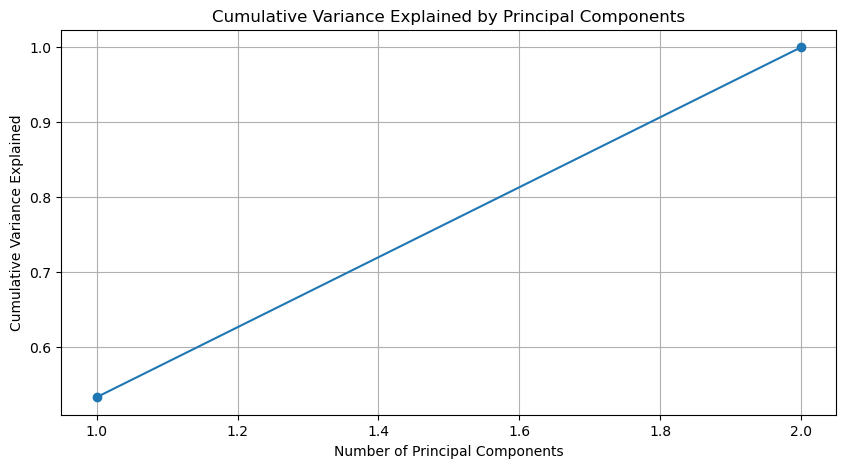

In [49]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Standardisasi data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)

# Menerapkan PCA
pca = PCA()
data_pca = pca.fit_transform(data_scaled)

# Melihat varians yang dijelaskan oleh setiap komponen utama
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Plot cumulative variance untuk menentukan jumlah komponen utama
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.title('Cumulative Variance Explained by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Explained')
plt.grid(True)
plt.show()

In [51]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 

# VIF dataframe 
vif_data = pd.DataFrame() 
vif_data["feature"] = df.columns 

# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(df.values, i) 
						for i in range(len(df.columns))] 

print(vif_data)

    feature       VIF
0   PREMIUM  1.280201
1  BIOSOLAR  1.280201


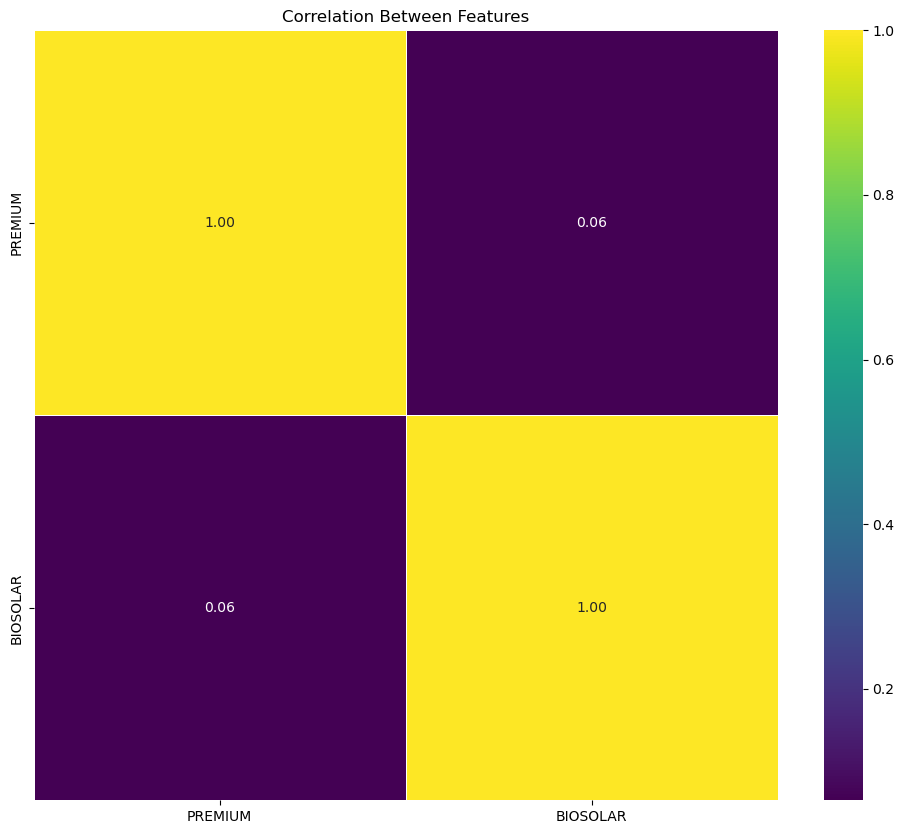

In [4]:
import seaborn as sns 
import matplotlib.pyplot as plt

# Menghitung korelasi antar fitur
correlation_matrix = df.corr(numeric_only = True)

# Plot heatmap korelasi
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f", linewidths=0.5)
plt.title("Correlation Between Features")
plt.show()

In [5]:
df.dtypes

PREMIUM     int64
BIOSOLAR    int64
dtype: object

In [43]:
# Melakukan scaling terhadap data

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df_scaled = pd.DataFrame(scaler.fit_transform(df), columns = scaler.get_feature_names_out(), index = subsidi.index)
df_scaled

,PREMIUM,BIOSOLAR
Provinsi,,
Aceh,-0.440423,-0.672978
Sumatera Utara,0.537594,0.589780
Sumatera Barat,0.144250,-0.403656
Riau,1.589794,-0.643831
Jambi,-0.323963,-0.468480
Sumatera Selatan,-0.214589,-0.306441
Bengkulu,-0.918859,-0.607210
Lampung,0.208540,-0.266191
Kepulauan Bangka Belitung,-0.475250,-0.566074


d:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than availabl

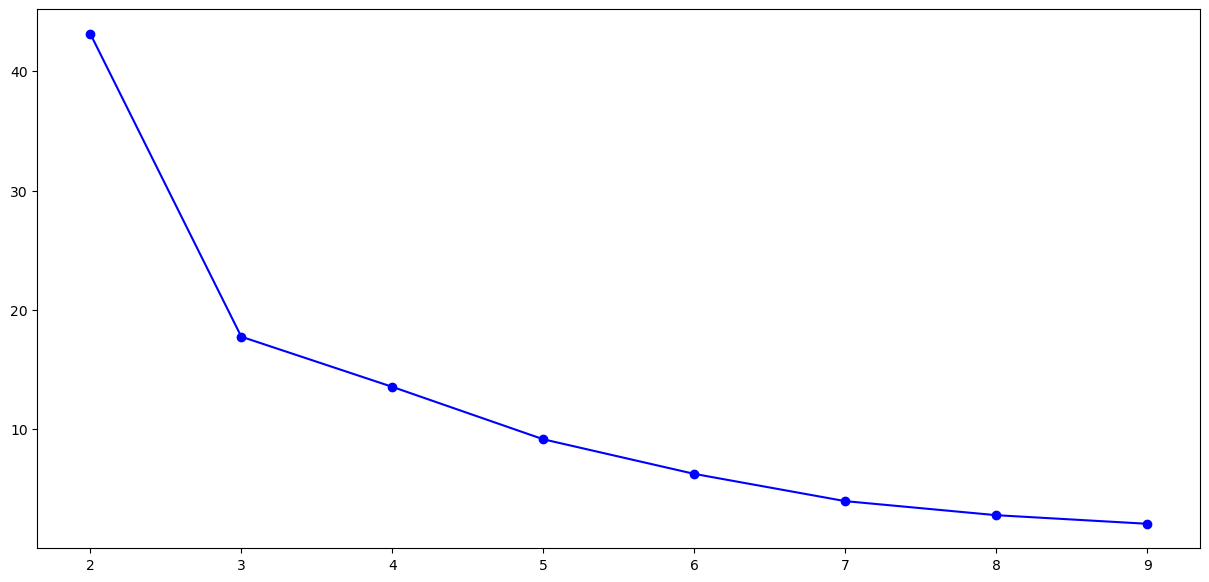

In [45]:
# Membuat grafik untuk menentukan jumlah k yang optimal
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
inertia = []

for i in range(2,10):
    kmeans = KMeans(n_clusters = i, random_state = 50)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(15, 7))

plt.plot(range(2,10), inertia, 'bo-')

In [8]:
inertia

[43.143961946735985,
 17.743608209565227,
 13.539621766205931,
 9.143035129013079,
 6.241178799950769,
 3.9554175583262587,
 2.777711329342036,
 2.0565263127825606]

Berdasarkan grafik dan nilai inertia di atas, meskipun dalam kasus ini tidak terlalu jelas perbedaannya, diperoleh jumlah klaster yang ideal merupakan 3 klaster

d:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than availabl

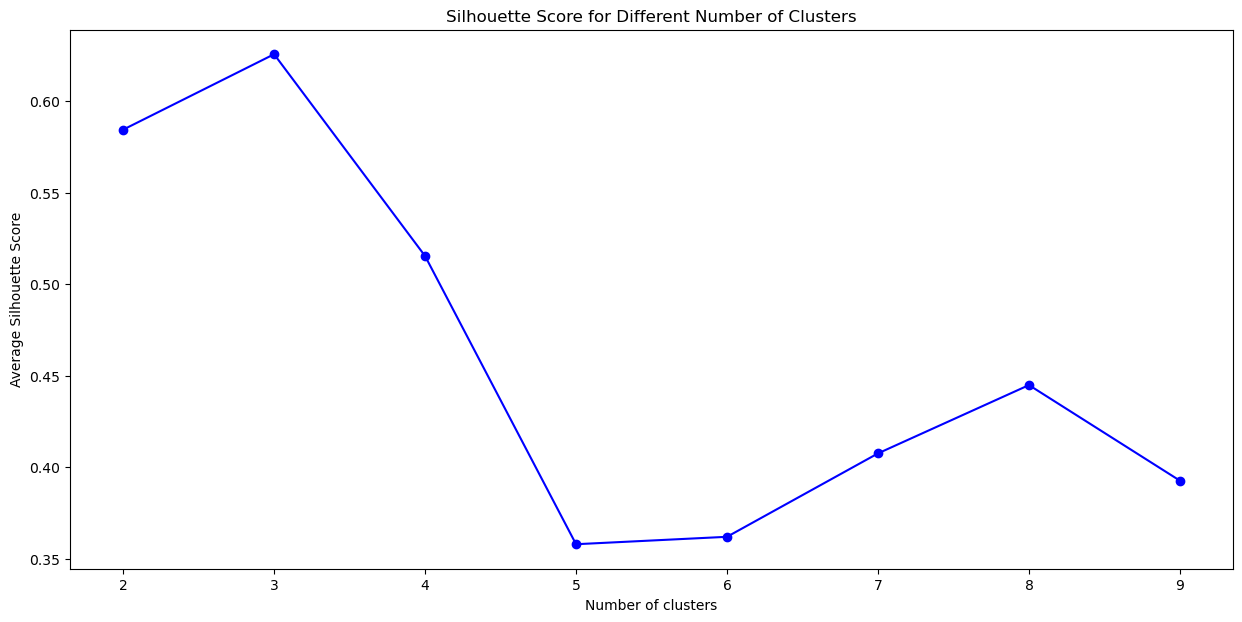

In [9]:
from sklearn.metrics import silhouette_score

# Menggunakan metode silhouette untuk menentukan jumlah k
silhouette_avg = []

for i in range(2, 10):
    kmeans = KMeans(n_clusters=i, random_state=50)
    kmeans.fit(df_scaled)
    silhouette = silhouette_score(df_scaled, kmeans.labels_)
    silhouette_avg.append(silhouette)

plt.figure(figsize=(15, 7))
plt.plot(range(2, 10), silhouette_avg, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Average Silhouette Score')
plt.title('Silhouette Score for Different Number of Clusters')
plt.show()

In [46]:
# Menghitung silhouette scores untuk berbagai nilai k
silhouette_scores = []
K = range(2, 11)  # Misalnya kita mencoba nilai k dari 2 hingga 10

for k in K:
    fcm = FCM(n_clusters=k)
    fcm.fit(df_scaled)
    cluster_membership = fcm.predict(df_scaled)
    
    score = silhouette_score(df_scaled, cluster_membership)
    silhouette_scores.append(score)
    print(f'Number of clusters = {k}, Silhouette Score = {score}')

# Plot silhouette scores untuk menemukan nilai k yang optimal
plt.figure(figsize=(10, 5))
plt.plot(K, silhouette_scores, marker='o')
plt.title('Silhouette Scores for Different Numbers of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

ValidationError: 1 validation error for fit
1
  Input should be an instance of ndarray [type=is_instance_of, input_value=                         ...     -0.520830  4.929606, input_type=DataFrame]
    For further information visit https://errors.pydantic.dev/2.6/v/is_instance_of

## Membuat Cluster dengan Jumlah k yang optimal

In [10]:
kmeans = KMeans(n_clusters = 3, random_state = 50)
kmeans.fit(df_scaled)

d:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, random_state=50)

In [11]:
# Menambahkan label klaster ke dalam data

df_clustered = df_scaled.copy()

df_clustered['Cluster'] = kmeans.labels_
df_clustered

,PREMIUM,BIOSOLAR,Cluster
Provinsi,,,
Aceh,-0.440423,-0.672978,0
Sumatera Utara,0.537594,0.589780,0
Sumatera Barat,0.144250,-0.403656,0
Riau,1.589794,-0.643831,1
Jambi,-0.323963,-0.468480,0
Sumatera Selatan,-0.214589,-0.306441,0
Bengkulu,-0.918859,-0.607210,0
Lampung,0.208540,-0.266191,0
Kepulauan Bangka Belitung,-0.475250,-0.566074,0


In [12]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
import numpy as np

In [13]:
pip install fuzzy-c-means

In [19]:
# Fuzzy C-Means
from fcmeans import FCM

fcm = FCM(n_clusters = 3)
fcm.fit(df_scaled.values)
df_scaled['Cluster'] = fcm.predict(df_scaled.values)

# Sebaran klaster
print(df_scaled.Cluster.value_counts())
df_scaled

Cluster
1    22
2     7
0     5
Name: count, dtype: int64


,PREMIUM,BIOSOLAR,Cluster
Provinsi,,,
Aceh,-0.440423,-0.672978,1
Sumatera Utara,0.537594,0.589780,2
Sumatera Barat,0.144250,-0.403656,1
Riau,1.589794,-0.643831,0
Jambi,-0.323963,-0.468480,1
Sumatera Selatan,-0.214589,-0.306441,1
Bengkulu,-0.918859,-0.607210,1
Lampung,0.208540,-0.266191,1
Kepulauan Bangka Belitung,-0.475250,-0.566074,1


In [20]:
# Menghitung statistik deskriptif untuk setiap cluster
cluster_descriptive_trans = df_scaled.groupby('Cluster')[['PREMIUM']].describe()
display(cluster_descriptive_trans)

PREMIUM                                                              \
          count      mean       std       min       25%       50%       75%   
Cluster                                                                       
0           5.0  2.046771  1.025041  0.889066  1.589794  1.954916  2.128953   
1          22.0 -0.326212  0.406534 -0.923933 -0.720536 -0.294538 -0.050486   
2           7.0 -0.436741  0.532888 -0.985674 -0.762343 -0.579307 -0.252556   

                   
              max  
Cluster            
0        3.671127  
1        0.302374  
2        0.537594

In [21]:
# Menghitung statistik deskriptif untuk setiap cluster
cluster_descriptive_road = df_scaled.groupby('Cluster')[['BIOSOLAR']].describe()
display(cluster_descriptive_road)

BIOSOLAR                                                              \
           count      mean       std       min       25%       50%       75%   
Cluster                                                                        
0            5.0  0.199073  0.673279 -0.643831 -0.355248  0.361262  0.759605   
1           22.0 -0.436365  0.220810 -0.685565 -0.597958 -0.535535 -0.327724   
2            7.0  1.229236  1.643090  0.379986  0.488592  0.671502  0.823189   

                   
              max  
Cluster            
0        0.873580  
1        0.060374  
2        4.929606

In [22]:
# Mengetahui pusat (centroid) dari setiap klaster
centers = fcm.centers
display(centers)

array([[ 2.08049612,  0.36268517,  1.03379956],
       [-0.31182376, -0.42189536,  0.01452135],
       [-0.47621576,  0.79437473,  1.96770439]])

# Kaggle

In [24]:
import pandas as pd # reading all required header files
import numpy as np
import random
import operator
import math
import matplotlib.pyplot as plt 
from scipy.stats import multivariate_normal     # for generating pdf

In [27]:
# Number of Clusters
k = 3
# Maximum number of iterations
MAX_ITER = 100
# Number of data points
n = len(df_scaled)
# Fuzzy parameter
m = 1.7 #Select a value greater than 1 else it will be knn

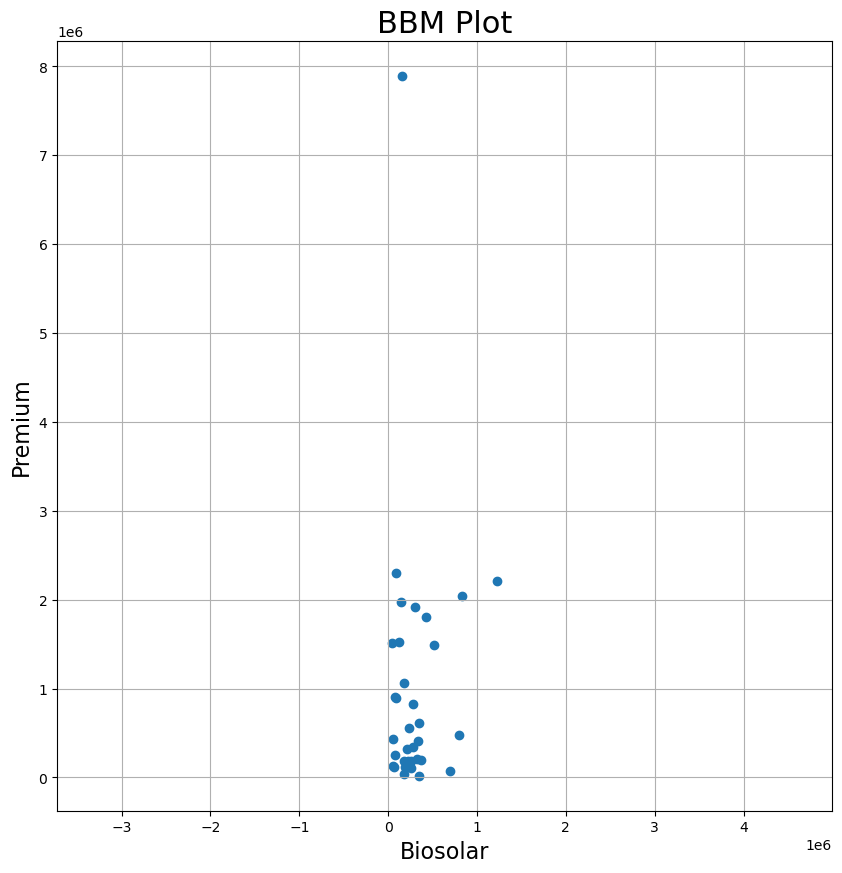

In [29]:
plt.figure(figsize=(10,10))                #scatter plot of sepal length vs sepal width                              
plt.scatter(list(df.iloc[:,0]), list(df.iloc[:,1]), marker='o')       
plt.axis('equal')                                                                 
plt.xlabel('Biosolar', fontsize=16)                                                 
plt.ylabel('Premium', fontsize=16)                                                 
plt.title('BBM Plot', fontsize=22)                                            
plt.grid()                                                                         
plt.show()

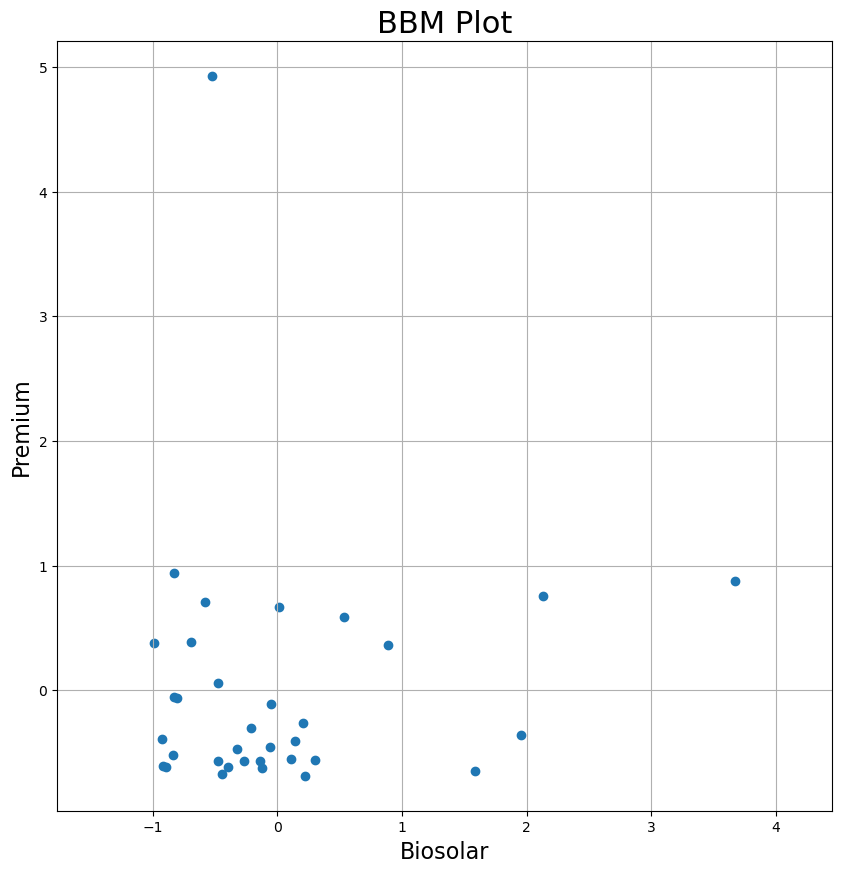

In [28]:
plt.figure(figsize=(10,10))                #scatter plot of sepal length vs sepal width                              
plt.scatter(list(df_scaled.iloc[:,0]), list(df_scaled.iloc[:,1]), marker='o')       
plt.axis('equal')                                                                 
plt.xlabel('Biosolar', fontsize=16)                                                 
plt.ylabel('Premium', fontsize=16)                                                 
plt.title('BBM Plot', fontsize=22)                                            
plt.grid()                                                                         
plt.show()

In [33]:
def initializeMembershipMatrix(): # initializing the membership matrix
    membership_mat = []
    for i in range(n):
        random_num_list = [random.random() for i in range(k)]
        summation = sum(random_num_list)
        temp_list = [x/summation for x in random_num_list]
        
        flag = temp_list.index(max(temp_list))
        for j in range(0,len(temp_list)):
            if(j == flag):
                temp_list[j] = 1
            else:
                temp_list[j] = 0
        
        membership_mat.append(temp_list)
    return membership_mat

In [34]:
membership_mat = initializeMembershipMatrix()

In [35]:
def calculateClusterCenter(membership_mat): # calculating the cluster center
    cluster_mem_val = list(zip(*membership_mat))
    cluster_centers = []
    for j in range(k):
        x = list(cluster_mem_val[j])
        xraised = [p ** m for p in x]
        denominator = sum(xraised)
        temp_num = []
        for i in range(n):
            data_point = list(df.iloc[i])
            prod = [xraised[i] * val for val in data_point]
            temp_num.append(prod)
        numerator = map(sum, list(zip(*temp_num)))
        center = [z/denominator for z in numerator]
        cluster_centers.append(center)
    return cluster_centers

In [36]:
#cluster_centers = calculateClusterCenter(membership_mat)
calculateClusterCenter(membership_mat)

[[237649.0, 1327124.357142857],
 [387627.22222222225, 726794.8888888889],
 [289479.0, 748029.5454545454]]

In [37]:
def updateMembershipValue(membership_mat, cluster_centers): # Updating the membership value
    p = float(2/(m-1))
    for i in range(n):
        x = list(df.iloc[i])
        distances = [np.linalg.norm(np.array(list(map(operator.sub, x, cluster_centers[j])))) for j in range(k)]
        for j in range(k):
            den = sum([math.pow(float(distances[j]/distances[c]), p) for c in range(k)])
            membership_mat[i][j] = float(1/den)       
    return membership_mat

In [38]:
def getClusters(membership_mat): # getting the clusters
    cluster_labels = list()
    for i in range(n):
        max_val, idx = max((val, idx) for (idx, val) in enumerate(membership_mat[i]))
        cluster_labels.append(idx)
    return cluster_labels

In [23]:
# Mengubah pusat (centroid) kembali ke skala asli
centers_original_scale = scaler.inverse_transform(centers)
centers_df = pd.DataFrame(centers_original_scale, columns=df_scaled.columns)
display(centers_df)

ValueError: operands could not be broadcast together with shapes (3,3) (2,) (3,3) 

## REGRESI

In [ ]:
bbm = subsidi
bbm

,TRANS,ROAD,AREA,DENSITY,PROVERTY,UMP,PREMIUM,BIOSOLAR
Provinsi,,,,,,,,
Aceh,2426809,23660,56834.75,95,14.75,3166460,181973,36798
Sumatera Utara,7339034,40765,72460.74,209,8.33,2522610,431005,1808209
Sumatera Barat,2656691,20999,42119.54,134,6.04,2512539,330848,414606
Riau,4230607,24206,89935.90,74,6.84,2938564,698926,77686
Jambi,2572804,13202,49026.58,74,7.70,2698774,211627,323671
Sumatera Selatan,4019095,19587,86771.68,100,11.95,3144446,239477,550981
Bengkulu,1127170,9228,20128.34,102,14.34,2238094,60149,129058
Lampung,3921375,20765,33570.26,273,11.44,2440486,347218,607444
Kepulauan Bangka Belitung,1160091,5891,16690.13,90,4.61,3264881,173105,186764


In [ ]:
bbm['SUBSIDI'] = bbm['PREMIUM'] + bbm['BIOSOLAR']
bbm

,TRANS,ROAD,AREA,DENSITY,PROVERTY,UMP,PREMIUM,BIOSOLAR,SUBSIDI
Provinsi,,,,,,,,,
Aceh,2426809,23660,56834.75,95,14.75,3166460,181973,36798,218771
Sumatera Utara,7339034,40765,72460.74,209,8.33,2522610,431005,1808209,2239214
Sumatera Barat,2656691,20999,42119.54,134,6.04,2512539,330848,414606,745454
Riau,4230607,24206,89935.90,74,6.84,2938564,698926,77686,776612
Jambi,2572804,13202,49026.58,74,7.70,2698774,211627,323671,535298
Sumatera Selatan,4019095,19587,86771.68,100,11.95,3144446,239477,550981,790458
Bengkulu,1127170,9228,20128.34,102,14.34,2238094,60149,129058,189207
Lampung,3921375,20765,33570.26,273,11.44,2440486,347218,607444,954662
Kepulauan Bangka Belitung,1160091,5891,16690.13,90,4.61,3264881,173105,186764,359869


In [ ]:
bbm.drop(labels = ['PREMIUM', 'BIOSOLAR'], axis = 1, inplace = True)
bbm

,TRANS,ROAD,AREA,DENSITY,PROVERTY,UMP,SUBSIDI
Provinsi,,,,,,,
Aceh,2426809,23660,56834.75,95,14.75,3166460,218771
Sumatera Utara,7339034,40765,72460.74,209,8.33,2522610,2239214
Sumatera Barat,2656691,20999,42119.54,134,6.04,2512539,745454
Riau,4230607,24206,89935.90,74,6.84,2938564,776612
Jambi,2572804,13202,49026.58,74,7.70,2698774,535298
Sumatera Selatan,4019095,19587,86771.68,100,11.95,3144446,790458
Bengkulu,1127170,9228,20128.34,102,14.34,2238094,189207
Lampung,3921375,20765,33570.26,273,11.44,2440486,954662
Kepulauan Bangka Belitung,1160091,5891,16690.13,90,4.61,3264881,359869


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df_scaled = pd.DataFrame(scaler.fit_transform(df), columns = scaler.get_feature_names_out(), index = subsidi.index)
df_scaled

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Memisahkan fitur (X) dan target (Y)
X = bbm.drop(labels = ['SUBSIDI'], axis = 1)
Y = bbm['SUBSIDI']

# Memisahkan data menjadi set pelatihan dan pengujian
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Membuat model regresi linear
model = LinearRegression()

# Melatih model dengan data pelatihan
model.fit(X_train, Y_train)

# Memprediksi nilai target untuk data pengujian
Y_pred = model.predict(X_test)

# Menghitung Mean Squared Error (MSE) dan R-squared (R2) dari model
mse = mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, Y_pred)

print(f"Root Mean Squared Error (MSE): {rmse}")
print(f"R-squared (R2): {r2}")

# Menampilkan koefisien regresi
print("Koefisien regresi:", model.coef_)
print("Intercept:", model.intercept_)


Root Mean Squared Error (MSE): 1274496.3240147447
R-squared (R2): -4.337400198131195
Koefisien regresi: [ 1.39689300e-01 -2.33894906e+01  1.97827425e+01  6.33455622e+00
  7.32716719e+04 -1.93246668e-01]
Intercept: -420080.25210284535
